# Machine Learning Project : Heart Failure Prediction

# ◆ Problem Statment :
Heart disease is one of the biggest health problems worldwide, causing many deaths every year. Many people with heart conditions or risks like high blood pressure, diabetes, or high cholesterol go undetected until it’s too late. Early detection of heart disease is important to prevent serious outcomes and save lives.

# ◆ Aim :
The goal of this project is to create a machine learning model that can use patient data to predict whether someone has heart disease. This will help doctors identify patients at risk earlier and provide better treatment.

# ◆ Notebook Contents :
1. Importing Required Libraries
2. Loading the Dataset into `heart_failure_df`
3. Dataset Visualization and Exploration + Feature Selection (Before Data Cleaning)
4. Data Cleaning and Processing :
    - 4.1 Analyzing Features
    - 4.2 Handling Missing Values
    - 4.3 Handling Duplicates
    - 4.4 Dealing with Outliers
    - 4.5 Normalization and Standardization
    - 4.6 Feature Engineering (Encoding)
5. Feature extraction and selection after cleaning :
    - 5.1 Identifying and selecting significant variables for the model 
    - 5.2 Applying Dimensionality Reduction (PCA for Classification)
6. Applying unsupervised learning (Clustering) :


## 1.◆ Importing Required Libraries

In [11]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score
import scipy.cluster.hierarchy as sch
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report

## 2.◆ Loading the Dataset into `heart_failure_df`

In [13]:
def load_dataset(file_path):
    na_values = ['NA', 'Missing', 'NaN', '', ' ', 'null', 'None', 'N/A', 'n/a', 'UNKNOWN', 'unknown', 'undefined']
    df = pd.read_csv(file_path, na_values=na_values)
    return df


In [14]:
heart_failure_df = load_dataset("heart.csv")


In [15]:
heart_failure_df

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

## 3.◆ Dataset Visualization and Exploration

In [16]:
heart_failure_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [17]:
heart_failure_df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [18]:
heart_failure_df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

### 3.1 ◆ Getting descriptive anaylsis for numeric features inside the dataset

In [19]:
heart_failure_df.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

### 3.2 ◆ See the description of the `hear_failure_df` for the categrical feature in our dataset

In [20]:
heart_failure_df.describe(include=['object'])

Sex ChestPainType RestingECG ExerciseAngina ST_Slope
count   918           918        918            918      918
unique    2             4          3              2        3
top       M           ASY     Normal              N     Flat
freq    725           496        552            547      460

### 3.3 ◆ Plotting Histogram for Numeric Feature 

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'RestingBP'}>,
        <Axes: title={'center': 'Cholesterol'}>],
       [<Axes: title={'center': 'FastingBS'}>,
        <Axes: title={'center': 'MaxHR'}>,
        <Axes: title={'center': 'Oldpeak'}>],
       [<Axes: title={'center': 'HeartDisease'}>, <Axes: >, <Axes: >]],
      dtype=object)

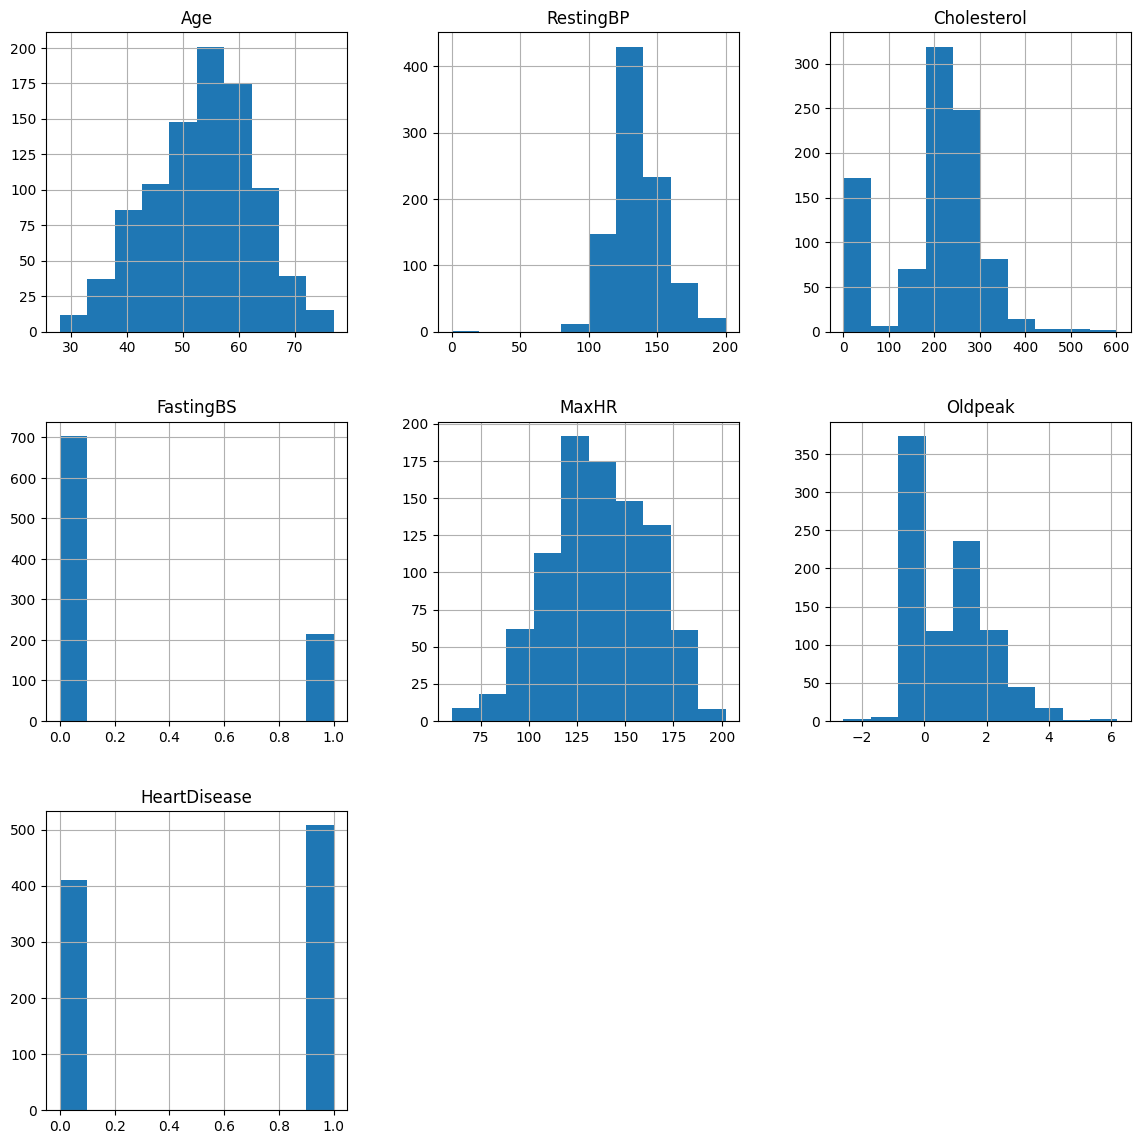

In [21]:
heart_failure_column_visualization = heart_failure_df.iloc[:,:]
heart_failure_column_visualization.hist(figsize=(14,14))

Here's a summary of the numeric features and their histograms:

1. `Age`: Most individuals are between 40 and 60 years old.
2. `RestingBP` (Resting Blood Pressure): A peak distribution around 120–140 mmHg is observed.
3. `Cholesterol`: The values range widely, with a concentration around 200–300 mg/dL.
4. `FastingBS` (Fasting Blood Sugar): It is binary (0 or 1), indicating whether fasting blood sugar >120 mg/dL, with a majority of values being 0.
5. `MaxHR` (Maximum Heart Rate Achieved): Distributed mostly between 100 and 170 bpm, indicating a healthy range for most individuals.
6. `Oldpeak`: Represents ST depression induced by exercise, mostly concentrated around 0–2.
7. `HeartDisease`: Binary target variable (0 for no heart disease, 1 for presence), with slightly more cases of 1 than 0.


### 3.4 ◆ Plotting Kdenisty Graphs for the data :

array([[<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>],
       [<Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>, <Axes: ylabel='Density'>,
        <Axes: ylabel='Density'>]], dtype=object)

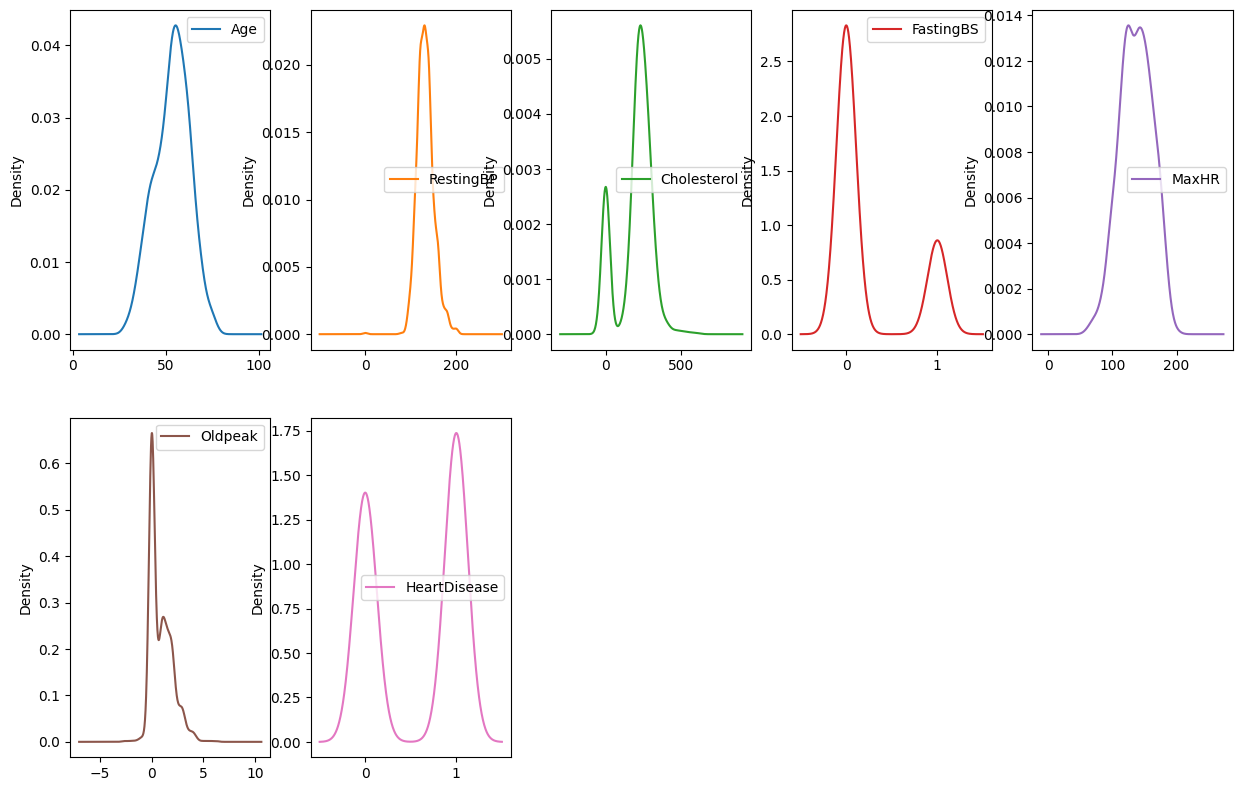

In [22]:
heart_failure_kDenisty = heart_failure_df.loc[:,['Age','RestingBP','Cholesterol','FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']]
heart_failure_kDenisty.plot(kind='density', subplots=True, layout=(3,5), sharex=False,figsize=(15,15))



1. `Age`: Shows a normal distribution centered around middle-aged individuals, with fewer younger and older participants.
2. `RestingBP`: Concentrated in a narrow range, peaking around 120–140 mmHg, representing typical resting blood pressure levels.
3. `Cholesterol`: Skewed distribution with most values between 150 and 300 mg/dL, indicating typical cholesterol levels.
4. `FastingBS`: A binary feature with two peaks at 0 and 1, indicating fasting blood sugar levels below and above 120 mg/dL.
5. `MaxHR`: Normally distributed with values centered around 130–150 bpm, reflecting the typical maximum heart rate during exercise.
6. `Oldpeak`: Highly concentrated near 0, representing minimal ST depression, with some outliers.
7. `HeartDisease`: Bimodal distribution, showing the balance between individuals with (1) and without (0) heart disease.

These plots help understand the central tendencies and spread of the features, aiding in further data exploration and preprocessing.

#### 3.5 ◆ Probability density function (PDF) plots for numeric features in the dataset display their distributions along with statistical markers (mean, median, mode)

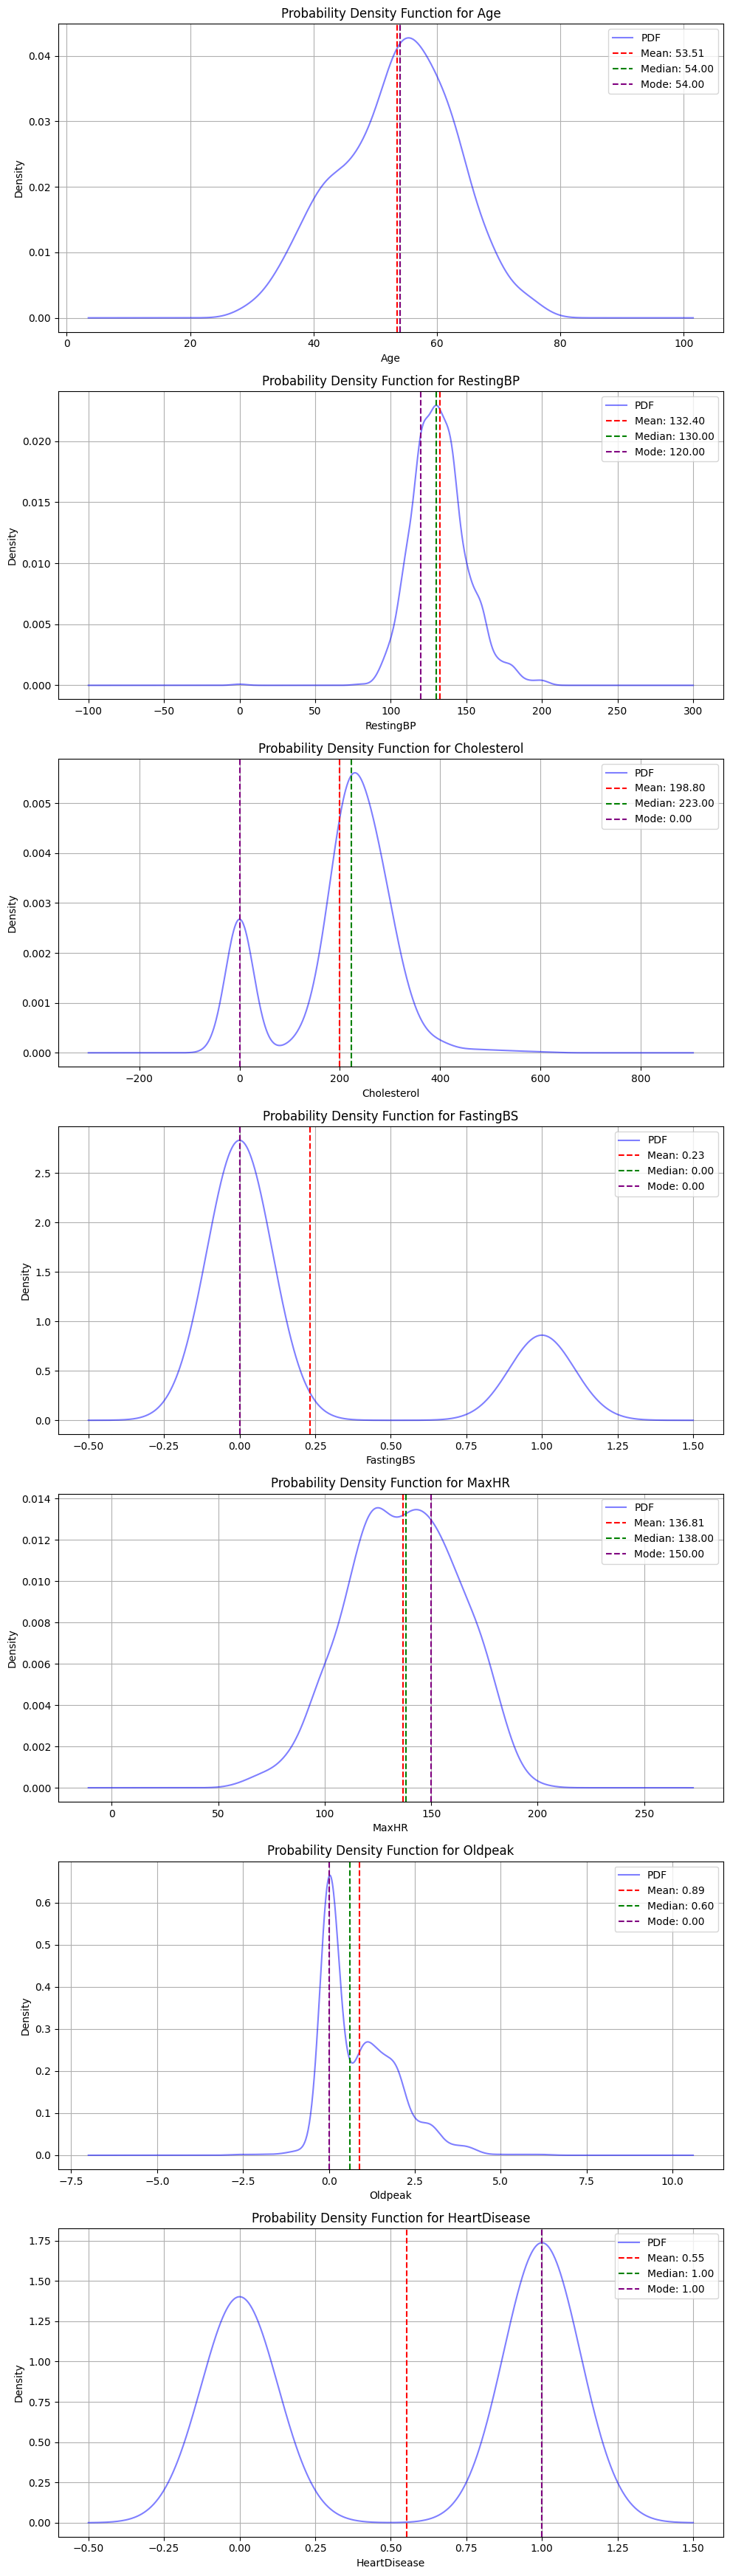

In [23]:
# Setting up the plot
num_features = 7
fig, axes = plt.subplots(nrows=num_features, ncols=1, figsize=(10, 5 * num_features))

# Loop through each feature to create a PDF plot
for i, column in enumerate(heart_failure_kDenisty):
    # Plotting the density
    heart_failure_df[column].plot(kind='density', ax=axes[i], color='blue', alpha=0.5, label='PDF')

    # Calculate mean, median, and mode
    mean = heart_failure_df[column].mean()
    median = heart_failure_df[column].median()
    mode = heart_failure_df[column].mode()[0]

    # Marking mean, median, and mode with horizontal lines
    axes[i].axvline(x=mean, color='red', linestyle='--', label=f'Mean: {mean:.2f}')
    axes[i].axvline(x=median ,color='green', linestyle='--', label=f'Median: {median:.2f}') 
    axes[i].axvline(x=mode, color='purple', linestyle='--', label=f'Mode: {mode:.2f}')  

    # Adding titles and labels
    axes[i].set_title(f'Probability Density Function for {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')
    axes[i].legend()
    axes[i].grid()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

1. `Age`: Displays a normal distribution, centered around 53.5 years (mean), with the median and mode close to each other at 54.
2. `RestingBP` (Resting Blood Pressure): Normally distributed around a mean of 132.4, with the median at 130 and mode at 120, indicating slightly skewed data.
3. `Cholesterol`: Skewed distribution with a mean of 198.8, median at 223, and mode at 0, suggesting outliers or invalid values at 0.
4. `FastingBS` (Fasting Blood Sugar): Binary distribution peaking at 0, with the mean value of 0.23 and most data clustered at 0.
5. `MaxHR` (Maximum Heart Rate Achieved): Bell-shaped curve with a mean of 136.8, median at 138, and mode at 150, showing slight symmetry.
6. `Oldpeak`: Skewed towards 0, with a mean of 0.89 and the majority of values around 0, indicating minimal ST depression in most cases.
7. `HeartDisease`: Bimodal distribution representing the target variable, with a mean of 0.55 and higher density at 1, showing more individuals with heart disease.

These visualizations help in understanding the central tendencies, spread, and outliers for each feature, essential for further analysis and preprocessing.

### 3.6 ◆ Displaying skewness of the Numeric Features 

In [24]:
numerical_features = heart_failure_df.select_dtypes(include=np.number).columns
heart_failure_df[numerical_features].skew()

Age            -0.195933
RestingBP       0.179839
Cholesterol    -0.610086
FastingBS       1.264484
MaxHR          -0.144359
Oldpeak         1.022872
HeartDisease   -0.215086
dtype: float64


1. `Age` (-0.195933): Slightly negatively skewed, meaning the tail on the left side (younger ages) is slightly longer, but the distribution is nearly symmetric.

2. `RestingBP` (0.179839): Slightly positively skewed, indicating a small tail on the right side (higher blood pressure values).

3. `Cholesterol` (-0.610086): Moderately negatively skewed, suggesting more data points on the higher side, with a longer tail on the lower end (some outliers or extreme low values).

4. `FastingBS` (1.264484): Highly positively skewed, indicating a significant tail on the right side (more extreme higher values for fasting blood sugar).

5. `MaxHR` (-0.144359): Slightly negatively skewed, with the distribution fairly symmetric and a minor left-side tail (lower maximum heart rate values).

6. `Oldpeak` (1.022872): Strongly positively skewed, meaning more data is clustered near zero, and there’s a longer tail on the higher side (ST depression values).

7. `HeartDisease` (-0.215086): Slightly negatively skewed, but since it is binary, the skewness value here reflects the imbalance between the two classes (more individuals with heart disease).

   Key Insights:
- Features like **FastingBS** and **Oldpeak** have significant positive skewness, suggesting potential transformations may be needed to normalize the data.
- Other features are only slightly skewed, meaning they are relatively symmetric and may not require transformations.

### 3. 7 ◆ Show the Correlation between Numeric Features and `HeartDisease`

In [25]:
correlation_matrix=heart_failure_df.corr(numeric_only=True)
correlation_matrix

Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.100893   0.070193 -0.112135  0.164803   
Cholesterol  -0.095282   0.100893     1.000000  -0.260974  0.235792  0.050148   
FastingBS     0.198039   0.070193    -0.260974   1.000000 -0.131438  0.052698   
MaxHR        -0.382045  -0.112135     0.235792  -0.131438  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.050148   0.052698 -0.160691  1.000000   
HeartDisease  0.282039   0.107589    -0.232741   0.267291 -0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.232741  
FastingBS         0.267291  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000

In [26]:
def plot_correlation_heatmap(corr_matrix, figsize=(16, 12), annot=False, cmap="coolwarm"):
    plt.figure(figsize=figsize)

    # Create the heatmap
    sns.heatmap(corr_matrix,cmap='Reds', annot=True, fmt='.2f',cbar_kws={'shrink': 0.8})# Shrink color bar for better fit

    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    plt.title('Correlation Matrix', fontsize=16, pad=20)

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

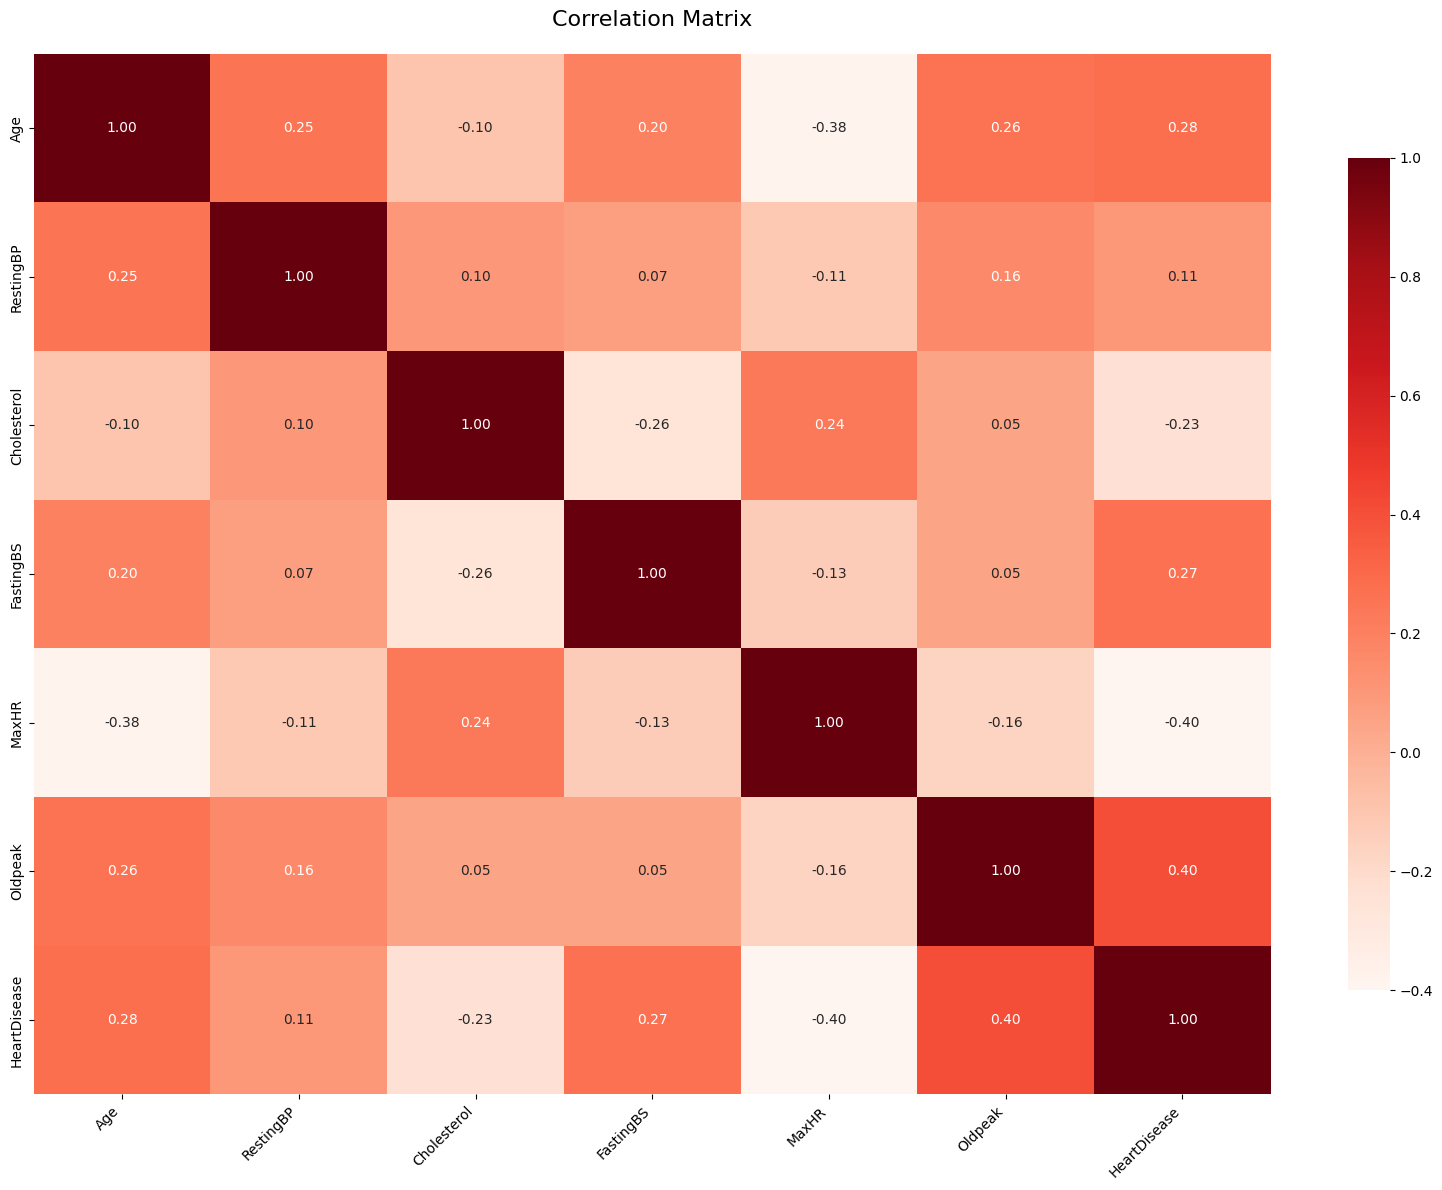

In [27]:
plot_correlation_heatmap(correlation_matrix)

The correlation matrix indicates that none of the features have a very high correlation (>0.8 or < -0.8), suggesting that multicollinearity is not a major concern.

- `Age`: Positively correlated with `RestingBP` (0.25) and `HeartDisease` (0.28); negatively with `MaxHR` (-0.38).
- `RestingBP`: Weak correlations with other features.
- `Cholesterol`: Weakly Negatively correlated with `HeartDisease` (-0.23).
- `FastingBS`: Moderately Positively correlated with `HeartDisease` (0.27).
- `MaxHR`: Moderately negatively correlated with `HeartDisease` (-0.40).
- `Oldpeak`: Moderately positively correlated with `HeartDisease` (0.40).

### Conclusion:
- `Oldpeak`, `MaxHR`, `FastingBS`, and `Age` ,These features seem to have a direct impact on heart disease, making them valuable for prediction.

### 3. 8 ◆ Histograms of numerical features from a dataset plotted against the `HeartDisease` classification label

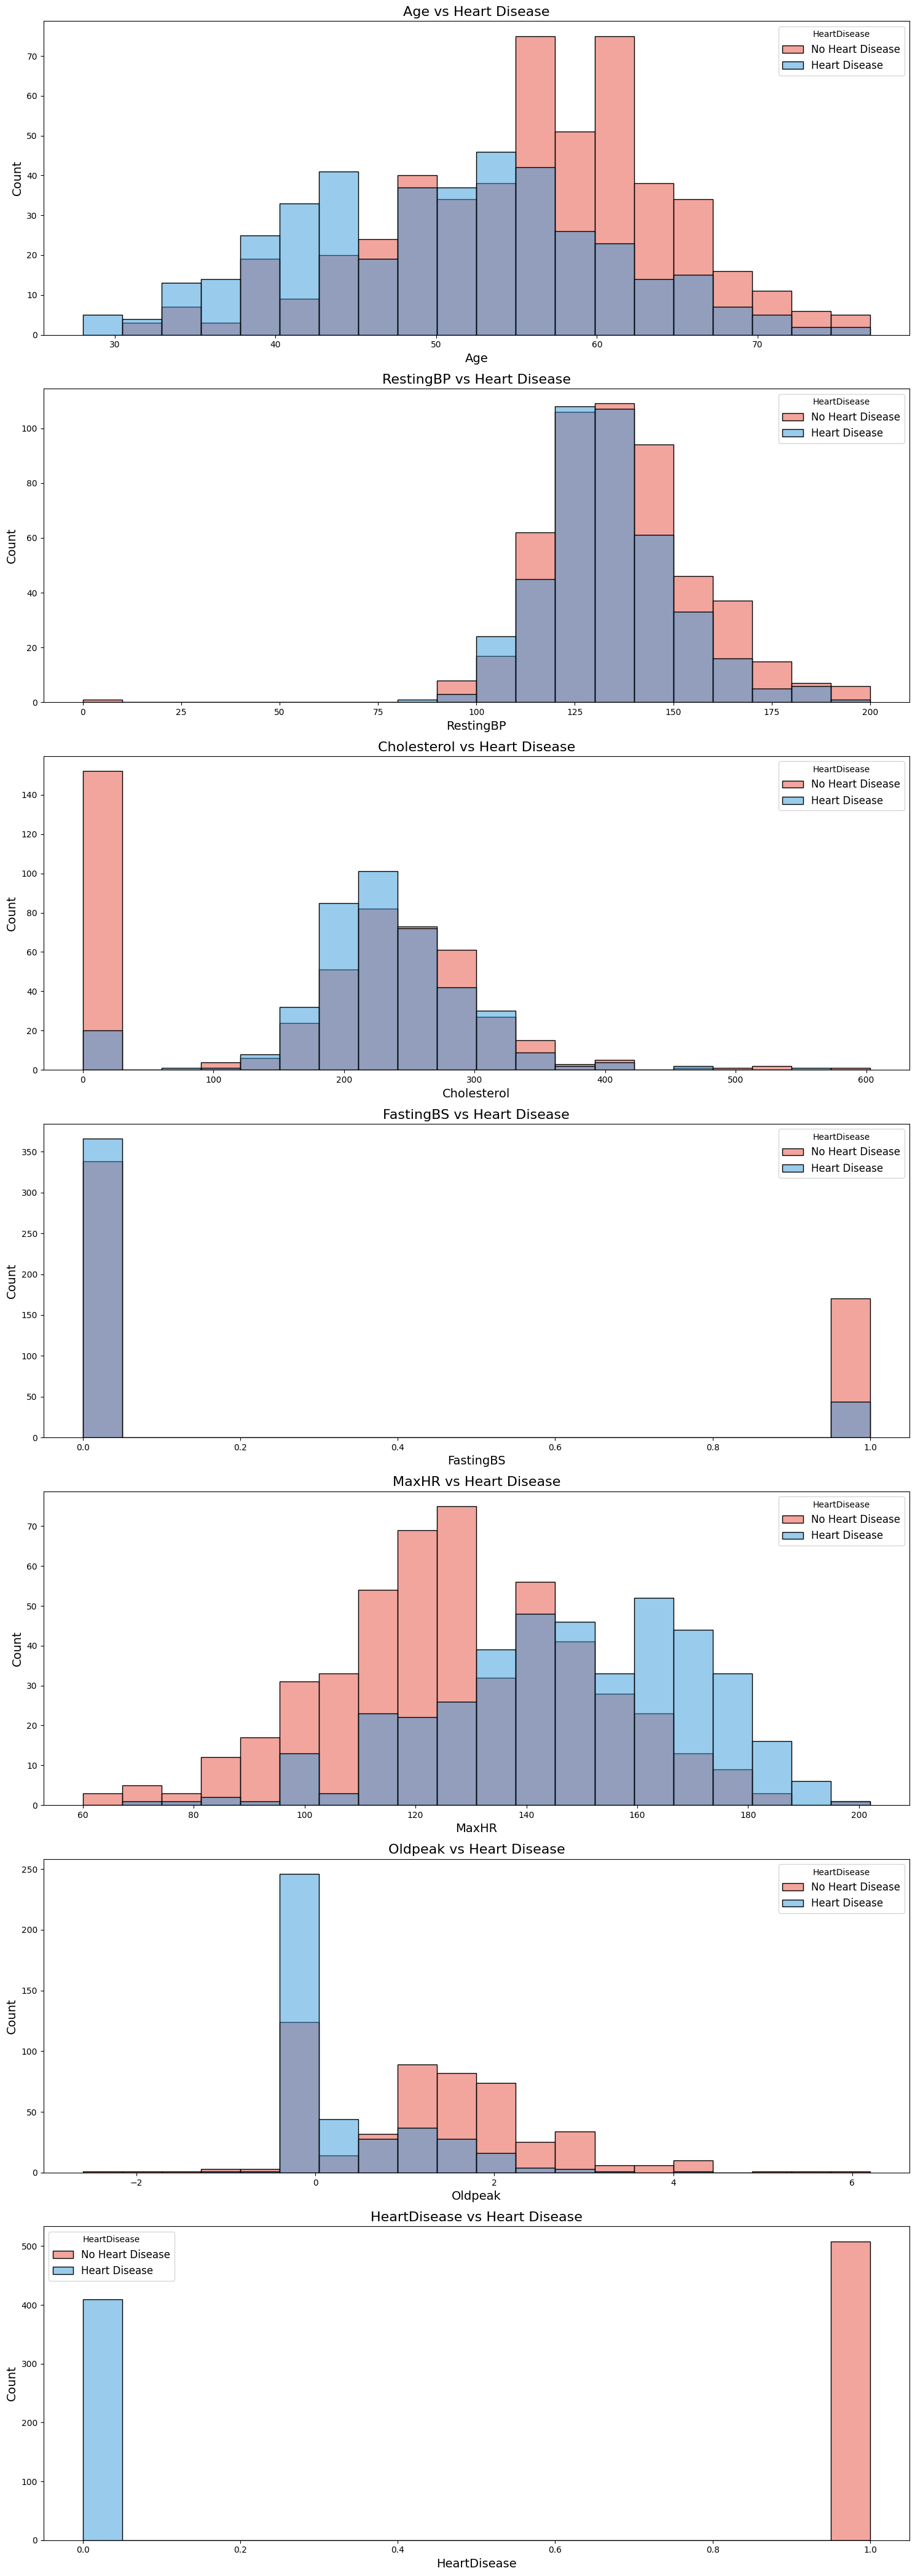

In [28]:

# Numeric and Categorical Feature Separation
numeric_features = heart_failure_df.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = heart_failure_df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
colors = ['#3498db', '#e74c3c']  # Define colors for the hue categories

fig, ax = plt.subplots(nrows=len(numerical_features), ncols=1, figsize=(15, 6 * len(numerical_features)))

# Loop through numerical features and create count plots
for i, feature in enumerate(numerical_features):
    sns.histplot(
        data=heart_failure_df,
        x=feature,
        hue='HeartDisease',
        kde=False,
        palette=colors,
        edgecolor='black',
        ax=ax[i],
        bins=20
    )
    ax[i].set_title(f'{feature} vs Heart Disease', fontsize=16)
    ax[i].set_xlabel(feature, fontsize=14)
    ax[i].set_ylabel('Count', fontsize=14)
    ax[i].legend(['No Heart Disease', 'Heart Disease'], title='HeartDisease', fontsize=12)

plt.tight_layout()
plt.show()

The histograms have overlapping bars, making it hard to interpret finer details for certain features.
So we need better visualization to see the relationships between the features

### 3. 9 ◆ Scatter plots for all variations of two numerical features, with points color-coded by the `HeartDisease` column

In [29]:

def scatter_plots_with_color_coding(data, numerical_features, target_column):
    num_features = len(numerical_features)
    combinations = [(numerical_features[i], numerical_features[j]) 
                    for i in range(num_features) for j in range(i + 1, num_features)]
    
    # Create subplots
    num_combinations = len(combinations)
    fig, axes = plt.subplots(nrows=(num_combinations + 2) // 3, ncols=3, figsize=(18, 6 * ((num_combinations + 2) // 3)))
    axes = axes.flatten() if num_combinations > 1 else [axes]
    for idx, (feature_x, feature_y) in enumerate(combinations):
        ax = axes[idx]
        sns.scatterplot( data=data,x=feature_x,y=feature_y,hue=target_column,palette={0: "blue", 1: "red"}, ax=ax, alpha=0.7, edgecolor=None )
        ax.set_title(f"{feature_x} vs {feature_y}", fontsize=14)
        ax.legend(title=target_column, loc="upper right")
    # Hide any unused subplots
    for ax in axes[num_combinations:]:
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()



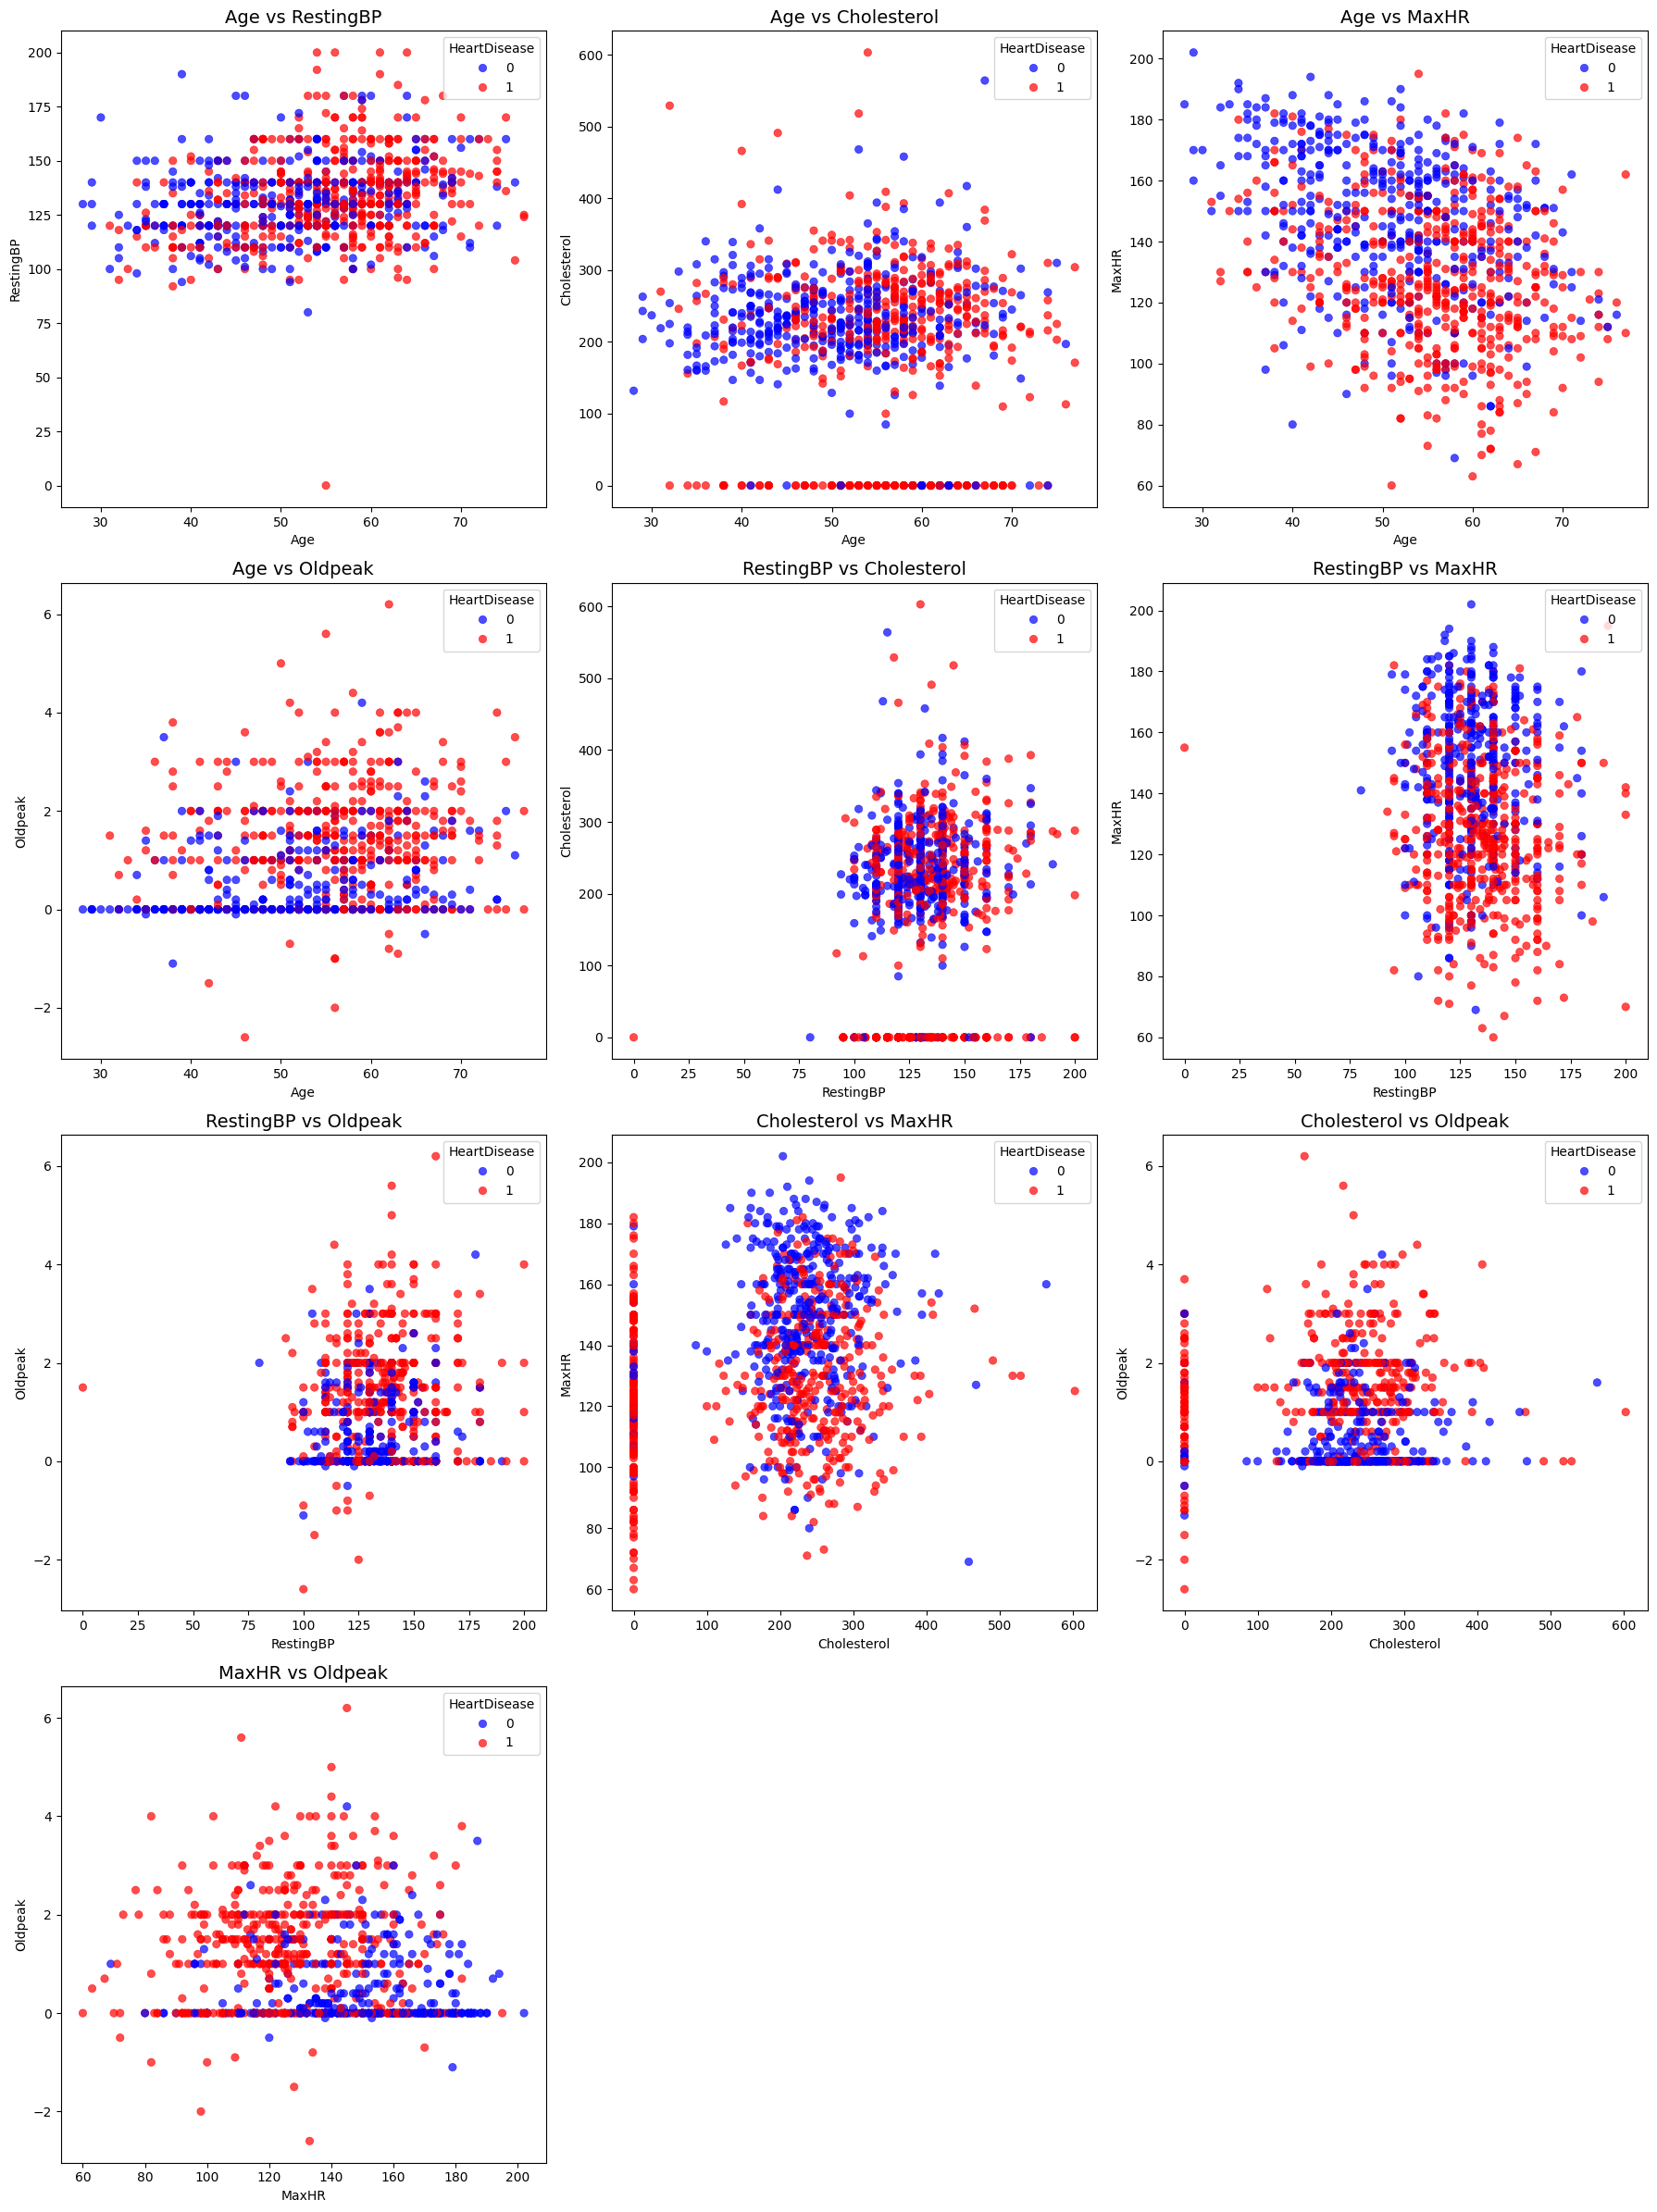

In [30]:
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
scatter_plots_with_color_coding(heart_failure_df, numerical_features, target_column="HeartDisease")

1. `MaxHR` and `Oldpeak`: Clear difference between people with and without heart disease.
2. `Cholesterol` and `Age`: Some separation, might help in predicting heart disease.
3. `RestingBP`: Looks similar for both groups, not very useful.
Distributions: Some features affect heart disease more than others.


### 3. 10 ◆ Pair plots for numerical feature with `HeartDisease` column

In [31]:

def plot_pairplot(data, numerical_features, target_feature):
    palette = {0: "blue", 1: "red"}
    
    # Create the pairplot
    pairplot = sns.pairplot(
        data=data,
        vars=numerical_features,
        hue=target_feature,
        palette=palette,
        diag_kind="kde",
        plot_kws={'alpha': 0.7},
        height=3
    )
    
    # Set the plot title and customize layout
    pairplot.fig.suptitle('Pairplot of Numerical Features with Blue vs Red Color Coding', y=1.02, fontsize=16)
    pairplot.fig.tight_layout()
    plt.show()


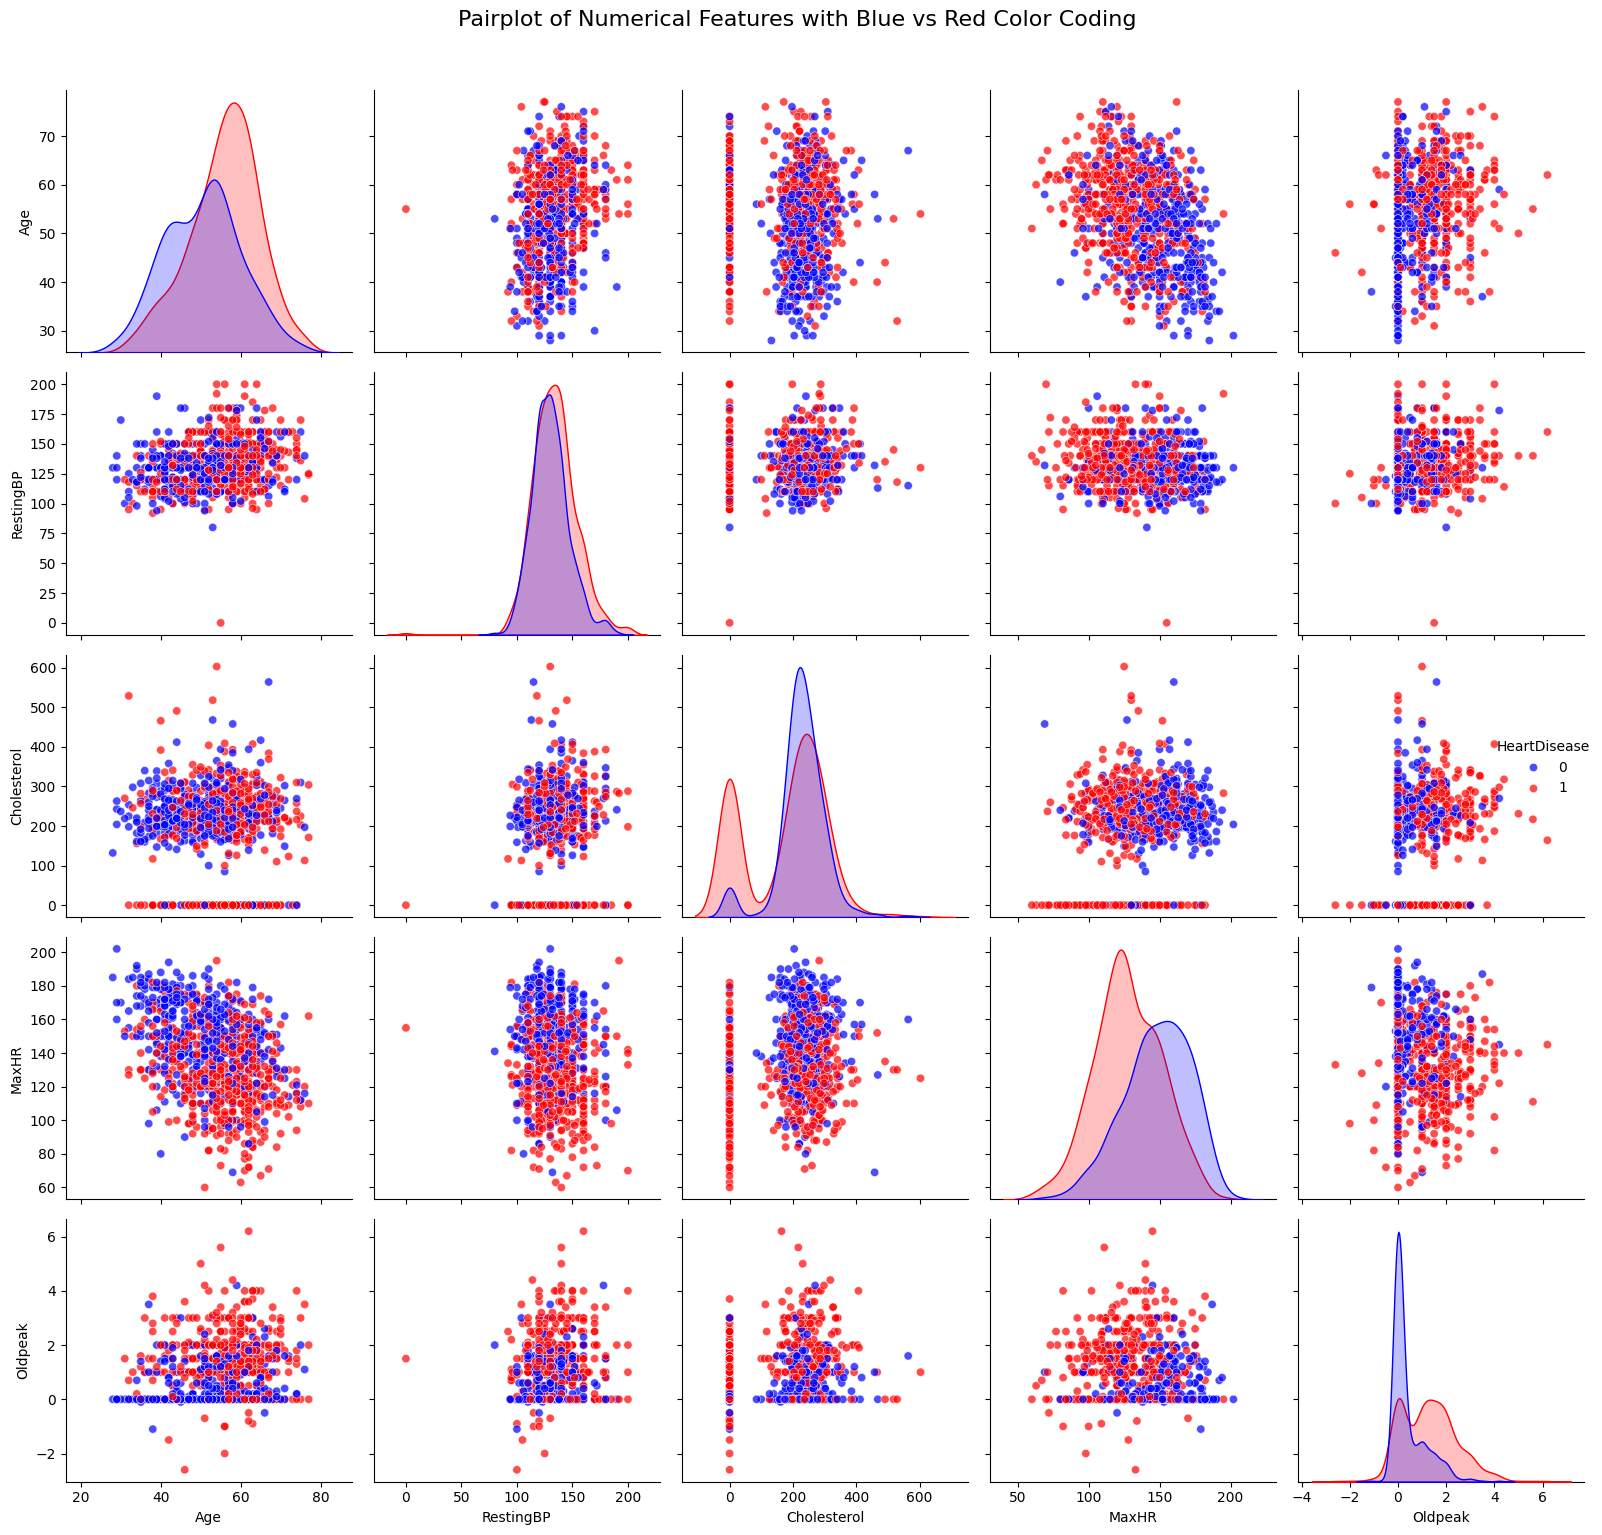

In [32]:

numerical_features = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]
target_feature = "HeartDisease"
plot_pairplot(heart_failure_df, numerical_features, target_feature)


1. `Age`and `MaxHR`: Strong patterns; older age and lower MaxHR linked to heart disease.
2. `Cholesterol`: Overlapping values, less separation between groups.
3. `RestingBP`: No clear difference for heart disease detection.
4. `Oldpeak`: Higher values common in heart disease cases.


### 3. 11 ◆ Bar plots for categorical data distribution  with `HeartDisease` column

In [33]:
def plot_categorical_distributions(data, target_col):
    # List of categorical features
    categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
    
    # Set up the subplot grid
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))
    axes = axes.flatten()
    
    for i, feature in enumerate(categorical_features):
        # Calculate percentages
        feature_counts = (data[data[target_col] == 1][feature].value_counts(normalize=True) * 100)
        
        # Bar plot
        sns.barplot(
            x=feature_counts.index,
            y=feature_counts.values,
            ax=axes[i],
            edgecolor='black'
        )
        axes[i].set_title(f'{feature} Distribution for {target_col} = 1', fontsize=14)
        axes[i].set_xlabel(feature, fontsize=12)
        axes[i].set_ylabel('Percentage (%)', fontsize=12)
        axes[i].set_ylim(0, 100)
        axes[i].bar_label(axes[i].containers[0], fmt='%.1f%%')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()



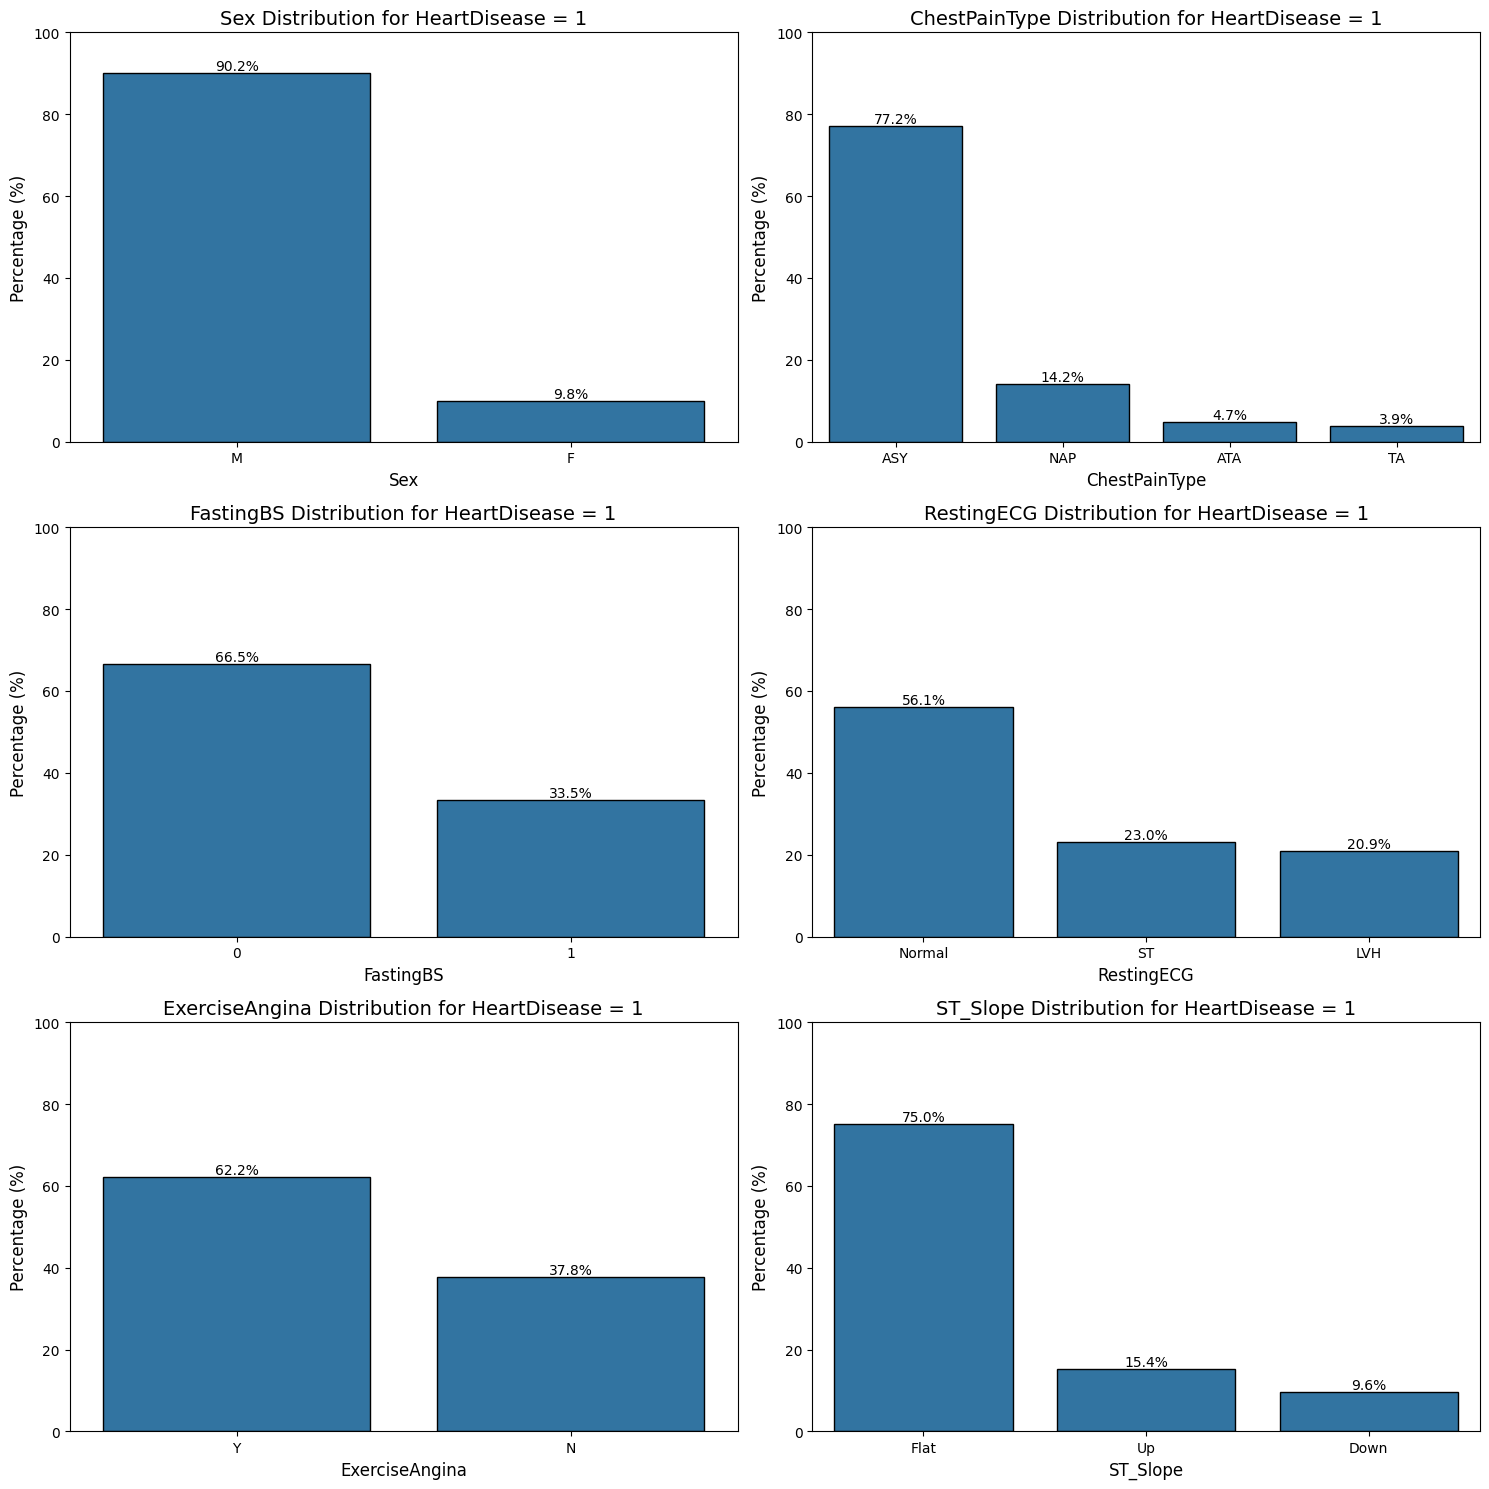

In [34]:
plot_categorical_distributions(heart_failure_df, target_col='HeartDisease')


The bar plots show the distribution of categorical features for heart disease cases:

1. `Sex`: Most cases are male (90.2%).
2. `ChestPainType`:ASY (77.2%).
3. `FastingBS`: Majority have FBS < 120 mg/dl (66.5%).
4. `RestingECG`: Normal ECG is most common (56.1%).
5. `ExerciseAngina`: 62.2% report angina during exercise.
6. `ST_Slope`: Flat slope is most frequent (75%).

### 3. 12◆ Summary of Data Visualization and EDA

### 1. Correlation Matrix Observations:

The correlation matrix indicates that none of the features have a very high correlation (>0.8 or < -0.8), suggesting that multicollinearity is not a major concern.

- `Age`: Positively correlated with `RestingBP` (0.25) and `HeartDisease` (0.28); negatively with `MaxHR` (-0.38).
- `RestingBP`: Weak correlations with other features.
- `Cholesterol`: Weakly Negatively correlated with `HeartDisease` (-0.23).
- `FastingBS`: Moderately Positively correlated with `HeartDisease` (0.27).
- `MaxHR`: Moderately negatively correlated with `HeartDisease` (-0.40).
- `Oldpeak`: Moderately positively correlated with `HeartDisease` (0.40).

### Conclusion:
- `Oldpeak`, `MaxHR`, `FastingBS`, and `Age` ,These features seem to have a direct impact on heart disease, making them valuable for prediction.

### 2. Pairplot Insights:

1. Clear separation observed in `MaxHR` and `Oldpeak` for heart disease cases.
2. Features like `Cholesterol` and `Age` show partial separation and may be predictive.
3. `RestingBP` shows little variation across heart disease categories, making it less impactful.

### 3. Distribution of Categorical Features:

1. `Sex`: 90.2% of heart disease cases are male.
2. `ChestPainType`: ASY type is dominant in heart disease cases (77.2%).
3. `FastingBS`: 66.5% of cases have FBS < 120 mg/dl.
4. `RestingECG`: Normal ECG is most common (56.1%).
5. `ExerciseAngina`: 62.2% of cases report angina during exercise.
6. `ST_Slope`: Flat slope is observed in 75% of heart disease cases.


### Key Takeaways for Prediction:

#### 1.Features to Consider:

1. Numerical Features: `Oldpeak` ,`Age` ,`FastingBS` and  `MaxHR` are highly significant and will be prioritized for prediction.
2. Categorical Features: `Sex`, `ChestPainType`, `ExerciseAngina`,`FastingBS` and  `ST_Slope` show distinct patterns in the distribution of values for patients with and without heart disease. These features likely contribute significantly to prediction.

#### 2.Features with weak relevance:

`RestingBP` and `Cholesterol` show weak relevance .



### 3. 13◆ Feature Selection (Before Data cleaning and processing)

In [35]:
# Method to visualize specific mask of the correlation matrix using heatmap
def visualize_mask_correlation_heatmap(correlation_matrix, mask):

    plt.figure(figsize=(12, 8))
    sns.heatmap(
        correlation_matrix,
        annot=True,
        cmap='coolwarm',
        fmt=".2f",
        linewidths=0.5,
        mask=mask.isnull()  # Mask out unwanted cells
    )
    plt.title('Heatmap of Highly Correlated Pairs (Threshold > 0.8)', fontsize=16)
    plt.show()


#### 3.13.1 For Strong Positive Correlations (>= 0.8 & < 1):



In [36]:
# Create a mask for strong positive correlations
positive_threshold = 0.8
mask = correlation_matrix.where((correlation_matrix >= positive_threshold) & (correlation_matrix < 1))

# Visualize the heatmap for strongly positive correlations
if mask.isnull().all().all():
    print("No correlations meet the specified threshold.")
else:
    visualize_mask_correlation_heatmap(correlation_matrix, mask)



No correlations meet the specified threshold.


#### 3.13.2 For Strong Negative Correlations (<= -0.8 & >= -1):


In [37]:
# Create a mask for strong negative correlations
negative_threshold = -0.8
mask = correlation_matrix.where((correlation_matrix <= negative_threshold) & (correlation_matrix >= -1))

# Visualize the heatmap for strongly positive correlations
if mask.isnull().all().all():
    print("No correlations meet the specified threshold.")
else:
    visualize_mask_correlation_heatmap(correlation_matrix, mask)


No correlations meet the specified threshold.


#### Conclusion for feature selection (Before Data cleaning and processing)
- No Strong Correlations:

1. There are no pairs of features with a strong positive correlation (>= 0.8) or strong negative correlation (<= -0.8).
2. This suggests that:
    1. The features in the dataset are relatively independent of each other.
    2. Multicollinearity is not a significant concern in this dataset.
3. Since there is no significant correlation between features, we can proceed with the original features without the need to drop or combine them due to redundancy , and check again later after Data Cleaning and Processing on the correlation of the features 

## 4. ◆ Data cleaning and processing:


### 4.1 ◆ Analyzing Features

In [38]:
def analyze_feature(df, feature_name):
    print(f"Values Counts of feautre {feature_name} :")
    print(df[feature_name].value_counts().sort_index())
    print(f"Unique Values of feautre{feature_name} :")
    print(df[feature_name].unique().tolist())
    null_entries = df[feature_name].isnull().sum()
    non_null_entries = df[feature_name].value_counts().sort_index().sum()
    print(f"Sum of the non-null entries for '{feature_name}': {non_null_entries}")
    print(f"Sum of the null entries for '{feature_name}': {null_entries}")
    print(f"Sum of the non-null entries and null entries for '{feature_name}': {non_null_entries + null_entries}") 
    print(f"Data type for '{feature_name}': {df[feature_name].dtype}")



In [39]:
analyze_feature(heart_failure_df,'Age')

Values Counts of feautre Age :
Age
28     1
29     3
30     1
31     2
32     5
33     2
34     7
35    11
36     6
37    11
38    16
39    15
40    13
41    24
42    18
43    24
44    19
45    18
46    24
47    19
48    31
49    21
50    25
51    35
52    36
53    33
54    51
55    41
56    38
57    38
58    42
59    35
60    32
61    31
62    35
63    30
64    22
65    21
66    13
67    15
68    10
69    13
70     7
71     5
72     4
73     1
74     7
75     3
76     2
77     2
Name: count, dtype: int64
Unique Values of feautreAge :
[40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 60, 36, 44, 53, 52, 51, 56, 41, 32, 65, 35, 59, 50, 47, 31, 46, 57, 55, 63, 66, 34, 33, 61, 29, 62, 28, 30, 74, 68, 72, 64, 69, 67, 73, 70, 77, 75, 76, 71]
Sum of the non-null entries for 'Age': 918
Sum of the null entries for 'Age': 0
Sum of the non-null entries and null entries for 'Age': 918
Data type for 'Age': int64


In [40]:
analyze_feature(heart_failure_df,'Sex')

Values Counts of feautre Sex :
Sex
F    193
M    725
Name: count, dtype: int64
Unique Values of feautreSex :
['M', 'F']
Sum of the non-null entries for 'Sex': 918
Sum of the null entries for 'Sex': 0
Sum of the non-null entries and null entries for 'Sex': 918
Data type for 'Sex': object


In [41]:
analyze_feature(heart_failure_df,'ChestPainType')

Values Counts of feautre ChestPainType :
ChestPainType
ASY    496
ATA    173
NAP    203
TA      46
Name: count, dtype: int64
Unique Values of feautreChestPainType :
['ATA', 'NAP', 'ASY', 'TA']
Sum of the non-null entries for 'ChestPainType': 918
Sum of the null entries for 'ChestPainType': 0
Sum of the non-null entries and null entries for 'ChestPainType': 918
Data type for 'ChestPainType': object


In [42]:
analyze_feature(heart_failure_df,'RestingBP')

Values Counts of feautre RestingBP :
RestingBP
0       1
80      1
92      1
94      2
95      6
       ..
180    12
185     1
190     2
192     1
200     4
Name: count, Length: 67, dtype: int64
Unique Values of feautreRestingBP :
[140, 160, 130, 138, 150, 120, 110, 136, 115, 100, 124, 113, 125, 145, 112, 132, 118, 170, 142, 190, 135, 180, 108, 155, 128, 106, 92, 200, 122, 98, 105, 133, 95, 80, 137, 185, 165, 126, 152, 116, 0, 144, 154, 134, 104, 139, 131, 141, 178, 146, 158, 123, 102, 96, 143, 172, 156, 114, 127, 101, 174, 94, 148, 117, 192, 129, 164]
Sum of the non-null entries for 'RestingBP': 918
Sum of the null entries for 'RestingBP': 0
Sum of the non-null entries and null entries for 'RestingBP': 918
Data type for 'RestingBP': int64


In [43]:
zero_restingBP_count = heart_failure_df[heart_failure_df['RestingBP']== 0].shape[0]
print("Total number of Zero 'RestingBP' values:", zero_restingBP_count)


Total number of Zero 'RestingBP' values: 1


In [44]:
analyze_feature(heart_failure_df,'Cholesterol')

Values Counts of feautre Cholesterol :
Cholesterol
0      172
85       1
100      2
110      1
113      1
      ... 
491      1
518      1
529      1
564      1
603      1
Name: count, Length: 222, dtype: int64
Unique Values of feautreCholesterol :
[289, 180, 283, 214, 195, 339, 237, 208, 207, 284, 211, 164, 204, 234, 273, 196, 201, 248, 267, 223, 184, 288, 215, 209, 260, 468, 188, 518, 167, 224, 172, 186, 254, 306, 250, 177, 227, 230, 294, 264, 259, 175, 318, 216, 340, 233, 205, 245, 194, 270, 213, 365, 342, 253, 277, 202, 297, 225, 246, 412, 265, 182, 218, 268, 163, 529, 100, 206, 238, 139, 263, 291, 229, 307, 210, 329, 147, 85, 269, 275, 179, 392, 466, 129, 241, 255, 276, 282, 338, 160, 156, 272, 240, 393, 161, 228, 292, 388, 166, 247, 331, 341, 243, 279, 198, 249, 168, 603, 159, 190, 185, 290, 212, 231, 222, 235, 320, 187, 266, 287, 404, 312, 251, 328, 285, 280, 192, 193, 308, 219, 257, 132, 226, 217, 303, 298, 256, 117, 295, 173, 315, 281, 309, 200, 336, 355, 326, 171, 491, 271, 2

In [45]:
zero_cholesterol_count = heart_failure_df[heart_failure_df['Cholesterol']== 0].shape[0]
print("Total number of Zero 'Cholesterol' values:", zero_cholesterol_count)


Total number of Zero 'Cholesterol' values: 172


In [46]:
analyze_feature(heart_failure_df,'FastingBS')

Values Counts of feautre FastingBS :
FastingBS
0    704
1    214
Name: count, dtype: int64
Unique Values of feautreFastingBS :
[0, 1]
Sum of the non-null entries for 'FastingBS': 918
Sum of the null entries for 'FastingBS': 0
Sum of the non-null entries and null entries for 'FastingBS': 918
Data type for 'FastingBS': int64


In [47]:
analyze_feature(heart_failure_df,'RestingECG')

Values Counts of feautre RestingECG :
RestingECG
LVH       188
Normal    552
ST        178
Name: count, dtype: int64
Unique Values of feautreRestingECG :
['Normal', 'ST', 'LVH']
Sum of the non-null entries for 'RestingECG': 918
Sum of the null entries for 'RestingECG': 0
Sum of the non-null entries and null entries for 'RestingECG': 918
Data type for 'RestingECG': object


In [48]:
analyze_feature(heart_failure_df,'MaxHR')

Values Counts of feautre MaxHR :
MaxHR
60     1
63     1
67     1
69     1
70     1
      ..
190    2
192    1
194    1
195    1
202    1
Name: count, Length: 119, dtype: int64
Unique Values of feautreMaxHR :
[172, 156, 98, 108, 122, 170, 142, 130, 120, 99, 145, 140, 137, 150, 166, 165, 125, 160, 164, 138, 178, 112, 118, 127, 114, 154, 155, 87, 148, 100, 168, 184, 121, 153, 134, 96, 174, 175, 144, 82, 135, 115, 128, 116, 94, 110, 92, 180, 152, 124, 106, 185, 139, 190, 146, 158, 132, 176, 119, 188, 162, 105, 90, 136, 167, 129, 102, 143, 103, 91, 126, 93, 131, 149, 123, 182, 141, 77, 109, 133, 179, 113, 104, 95, 72, 97, 117, 86, 63, 157, 83, 60, 70, 163, 67, 78, 84, 111, 80, 107, 161, 69, 88, 73, 159, 151, 181, 186, 177, 173, 169, 171, 147, 71, 192, 195, 194, 187, 202]
Sum of the non-null entries for 'MaxHR': 918
Sum of the null entries for 'MaxHR': 0
Sum of the non-null entries and null entries for 'MaxHR': 918
Data type for 'MaxHR': int64


In [49]:
analyze_feature(heart_failure_df,'ExerciseAngina')

Values Counts of feautre ExerciseAngina :
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
Unique Values of feautreExerciseAngina :
['N', 'Y']
Sum of the non-null entries for 'ExerciseAngina': 918
Sum of the null entries for 'ExerciseAngina': 0
Sum of the non-null entries and null entries for 'ExerciseAngina': 918
Data type for 'ExerciseAngina': object


In [50]:
analyze_feature(heart_failure_df,'Oldpeak')

Values Counts of feautre Oldpeak :
Oldpeak
-2.6      1
-2.0      1
-1.5      1
-1.1      1
-1.0      2
-0.9      1
-0.8      1
-0.7      1
-0.5      2
-0.1      2
 0.0    368
 0.1     14
 0.2     22
 0.3     11
 0.4     11
 0.5     19
 0.6     14
 0.7      7
 0.8     16
 0.9      4
 1.0     86
 1.1      7
 1.2     26
 1.3      7
 1.4     18
 1.5     53
 1.6     16
 1.7      6
 1.8     17
 1.9      7
 2.0     76
 2.1      2
 2.2      5
 2.3      2
 2.4      4
 2.5     16
 2.6      7
 2.8      7
 2.9      1
 3.0     28
 3.1      1
 3.2      2
 3.4      3
 3.5      2
 3.6      4
 3.7      1
 3.8      1
 4.0      8
 4.2      2
 4.4      1
 5.0      1
 5.6      1
 6.2      1
Name: count, dtype: int64
Unique Values of feautreOldpeak :
[0.0, 1.0, 1.5, 2.0, 3.0, 4.0, 0.5, 2.5, 5.0, 0.8, 0.7, 1.4, 2.1, 0.4, 0.2, 1.7, 2.2, 0.1, 1.6, 1.3, 0.3, 1.8, 2.6, -0.9, 2.8, -2.6, -1.5, -0.1, 0.9, 1.1, 2.4, -1.0, -1.1, -0.7, -0.8, 3.7, 1.2, -0.5, -2.0, 1.9, 3.5, 0.6, 3.1, 2.3, 3.4, 3.6, 4.2, 3.2, 5.6, 3.8, 

In [51]:
negative_oldpeak_count = heart_failure_df[heart_failure_df['Oldpeak'] < 0].shape[0]
print("Total number of negative 'Oldpeak' values:", negative_oldpeak_count)


Total number of negative 'Oldpeak' values: 13


In [52]:
analyze_feature(heart_failure_df,'ST_Slope')

Values Counts of feautre ST_Slope :
ST_Slope
Down     63
Flat    460
Up      395
Name: count, dtype: int64
Unique Values of feautreST_Slope :
['Up', 'Flat', 'Down']
Sum of the non-null entries for 'ST_Slope': 918
Sum of the null entries for 'ST_Slope': 0
Sum of the non-null entries and null entries for 'ST_Slope': 918
Data type for 'ST_Slope': object


In [53]:
analyze_feature(heart_failure_df,'HeartDisease')

Values Counts of feautre HeartDisease :
HeartDisease
0    410
1    508
Name: count, dtype: int64
Unique Values of feautreHeartDisease :
[0, 1]
Sum of the non-null entries for 'HeartDisease': 918
Sum of the null entries for 'HeartDisease': 0
Sum of the non-null entries and null entries for 'HeartDisease': 918
Data type for 'HeartDisease': int64


### 4.2 ◆ Handling missing values


#### 4.2.1 Observe number of null entries and percentage - isunll()

In [54]:
heart_failure_df.isnull().mean()*100


Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

##### Here we can see that all features do not have any missing values , No need for imputations

##### But for `Cholesterol` , `Oldpeak` and `RestingBP`
- after analyzing the features , we have found that :
1.  `Cholesterol` has 172 records with `0` values .
2.  `Oldpeak` has 13 records with negative values .
3.  `RestingBP` has 1 record with `0` value .

##### Medical Context for `Cholesterol` `Oldpeak` and `RestingBP` Values:
1. `Cholesterol` records values of `0`:
- Medically, cholesterol cannot be zero in a living person. Total cholesterol levels typically range from 125 to 200 mg/dL. A value of 0 likely indicates missing or incorrectly recorded data.
- Action Needed: These should be treated as missing values and imputed using `Median` of the feature, as it is robust to outliers , and Suitable for skewed data like `cholesterol`.

2. `Oldpeak` records with negative values :

- Negative Oldpeak values are rare but not impossible , a negative value could indicate elevated ST segments during exercise (an anomaly, but sometimes associated with conditions like pericarditis). 
- No action needed for imputation as we couldn't reach the medical background of the dataset enviroment which the records are collected.


3. `RestingBP` record value of `0` :
- Resting blood pressure (RestingBP) cannot be 0 for a living person—it’s a physiological impossibility. This is clearly a data entry error.
-Action Needed : Impute with `Median` of the feature , as it is robust against the outliers .


#### 4.2.2 Handling Zero Values for `Cholesterol` 

In [55]:
# Replace Cholesterol = 0 with median of non-zero Cholesterol
heart_failure_df['Cholesterol'] = heart_failure_df['Cholesterol'].replace(0, heart_failure_df[heart_failure_df['Cholesterol'] > 0]['Cholesterol'].median())


In [56]:
zero_cholesterol_count = heart_failure_df[heart_failure_df['Cholesterol']== 0].shape[0]
print("Total number of Zero 'Cholesterol' values:", zero_cholesterol_count)


Total number of Zero 'Cholesterol' values: 0


#### 4.2.3 Handling Zero Values for `RestingBP` 

In [57]:
# Replace RestingBP = 0 with median of non-zero RestingBP

heart_failure_df['RestingBP'] = heart_failure_df['RestingBP'].replace(0, heart_failure_df[heart_failure_df['RestingBP'] > 0]['RestingBP'].median())


In [58]:
zero_restingBP_count = heart_failure_df[heart_failure_df['RestingBP']== 0].shape[0]
print("Total number of Zero 'RestingBP' values:", zero_restingBP_count)


Total number of Zero 'RestingBP' values: 0


### 4.3 ◆ Handling Duplicates



#### 4.3.1 Detecting Duplicates

In [59]:
duplicates_df = heart_failure_df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates_df}")

Number of duplicate rows: 0


We can see that there are no duplicated rows in the dataset ,
No need to Handle the Duplicates

### 4.4 ◆ Deal with Outliers




#### 4.4.1 Detecting Outliers

Plotting Histograms and KDE for Numeric Features 

In [60]:
numeric_columns = heart_failure_df.loc[:,['Age','RestingBP','Cholesterol', 'MaxHR', 'Oldpeak']]



In [61]:

def plot_histogram_kde_distirbution(df, numeric_features, figsize=(24, 24), bins=30, title="Histograms and KDE for Numeric Features"):

    sns.set_style('whitegrid') 
    plt.figure(figsize=figsize)  
    for i, col in enumerate(numeric_features.columns, 1):
        plt.subplot(4, 3, i)  
        sns.histplot(df[col], kde=True, color='blue', edgecolor='black', bins=bins)
        plt.title(f'Distribution of {col}', fontsize=14)
        plt.xlabel(col, fontsize=12)
        plt.ylabel('Frequency', fontsize=12)
        plt.xticks(fontsize=10)
        plt.yticks(fontsize=10)
    plt.tight_layout(pad=3.0)
    plt.suptitle(title, fontsize=20, y=1.02)
    plt.show()


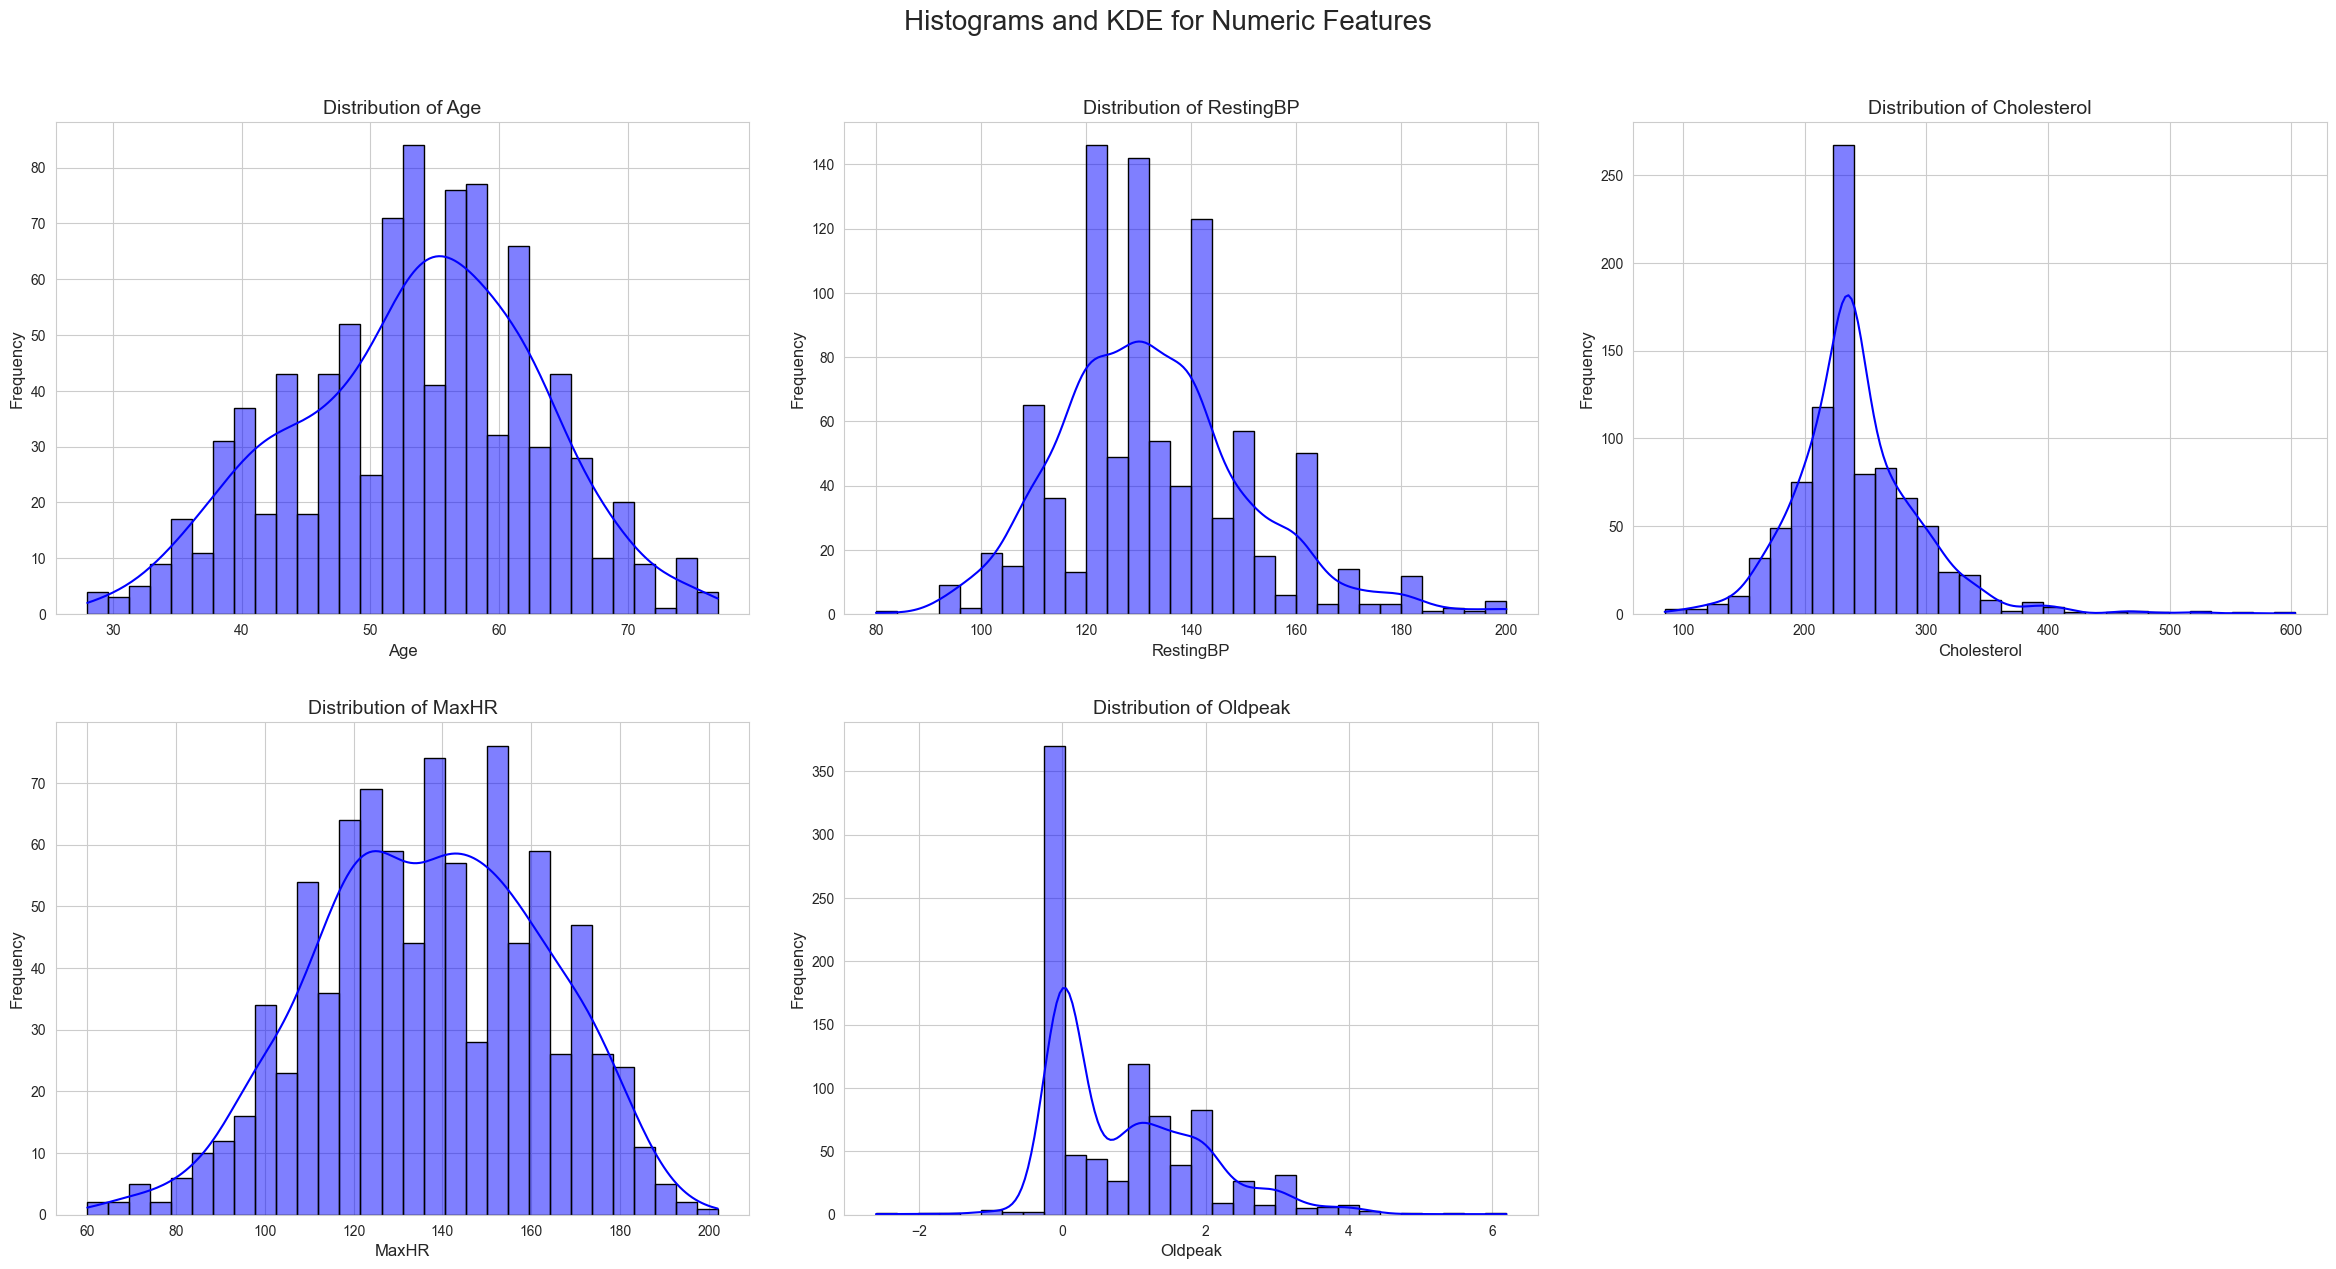

In [62]:
plot_histogram_kde_distirbution(heart_failure_df,numeric_columns)

In [63]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 -1.5*IQR
    upper_bound = Q3 + 1.5 *IQR
    outlier_mask = (df[column] <lower_bound)|(df[column]>upper_bound)
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[column])
    plt.axvline(lower_bound, color='r', linestyle='--', label=f'Lower Bound:{lower_bound:.2f}')
    plt.axvline(upper_bound, color='g', linestyle='--', label=f'Upper Bound:{upper_bound:.2f}')
    plt.title(f'Box Plot for {column} with Outlier Bounds')
    plt.legend()
    plt.show()
    print(f'Outlier detection for {column}:')
    print(f'Lower bound: {lower_bound}, Upper bound: {upper_bound}')
    print(f'Number of outliers detected: {len(outlier_mask[outlier_mask])} ({len(outlier_mask[outlier_mask]) / len(df) * 100:.3f}%)')

    return lower_bound, upper_bound, outlier_mask

Outlier detection depends on the distribution and characteristics of each feature. 
### 1. `Age`:
   - Method: Z-Score or IQR (Interquartile Range) Method
   - Reason: The distribution is approximately normal. Z-Score is effective for identifying values beyond a specific standard deviation, while IQR works well for robust detection.

### 2. `RestingBP`:
   - Method: IQR Method
   - Reason: Slightly skewed but not heavily; the IQR method will effectively detect values outside the typical range.

### 3. `Cholesterol`:
   - Method: IQR Method
   - Reason: Positively skewed with some extreme outliers. IQR can handle skewness better than Z-Score.


### 4. `MaxHR` :
   - Method: Z-Score or IQR Method
   - Reason: Approximately normal distribution. Both Z-Score and IQR are suitable for detecting outliers in heart rate.

### 5. `Oldpeak`:
   - Method: IQR Method
   - Reason: Positively skewed with clear outliers. IQR is more robust to skewness and is effective here.



### Detecting Outliers using IQR Method

In [64]:
outlier_numeric_features  = heart_failure_df.loc[:,['Age','RestingBP','Cholesterol', 'MaxHR', 'Oldpeak']]


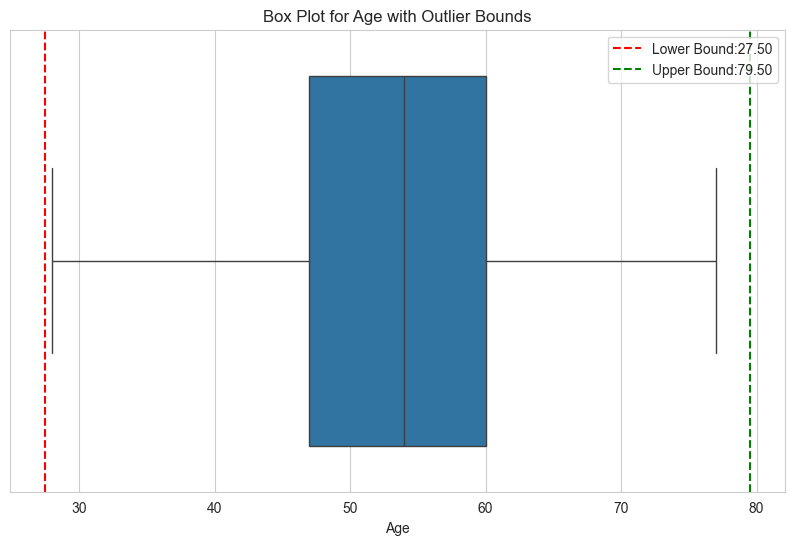

Outlier detection for Age:
Lower bound: 27.5, Upper bound: 79.5
Number of outliers detected: 0 (0.000%)


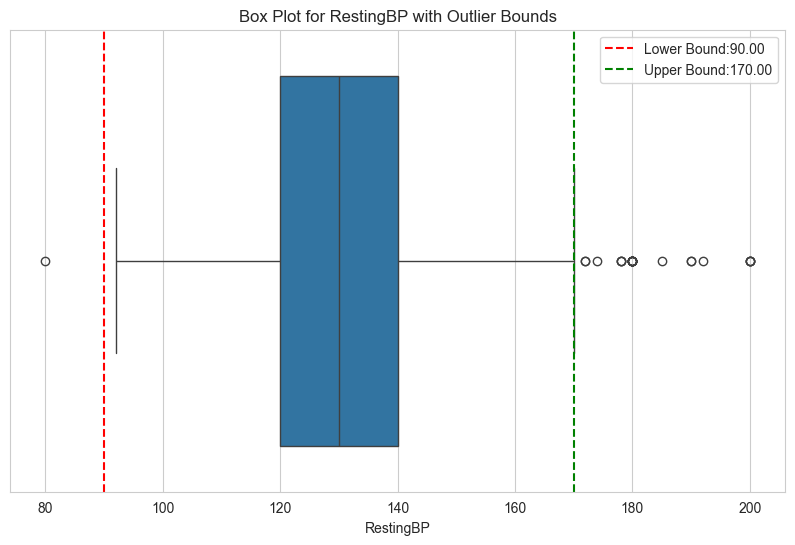

Outlier detection for RestingBP:
Lower bound: 90.0, Upper bound: 170.0
Number of outliers detected: 27 (2.941%)


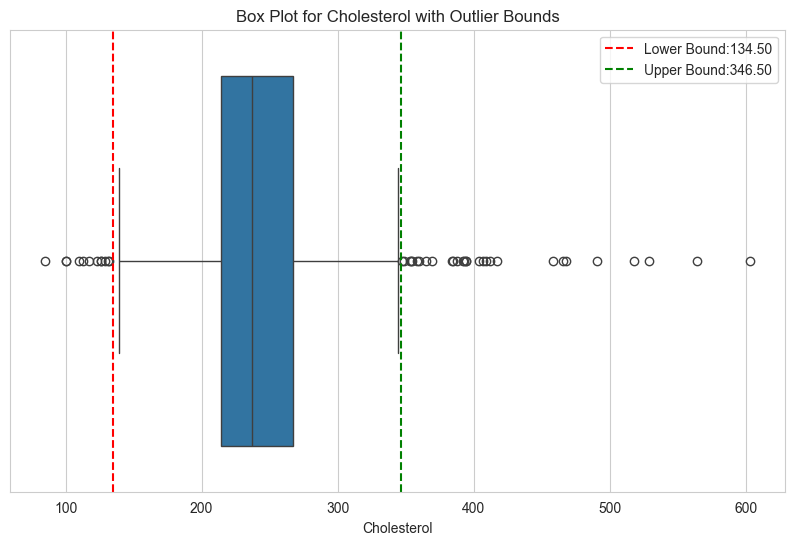

Outlier detection for Cholesterol:
Lower bound: 134.5, Upper bound: 346.5
Number of outliers detected: 41 (4.466%)


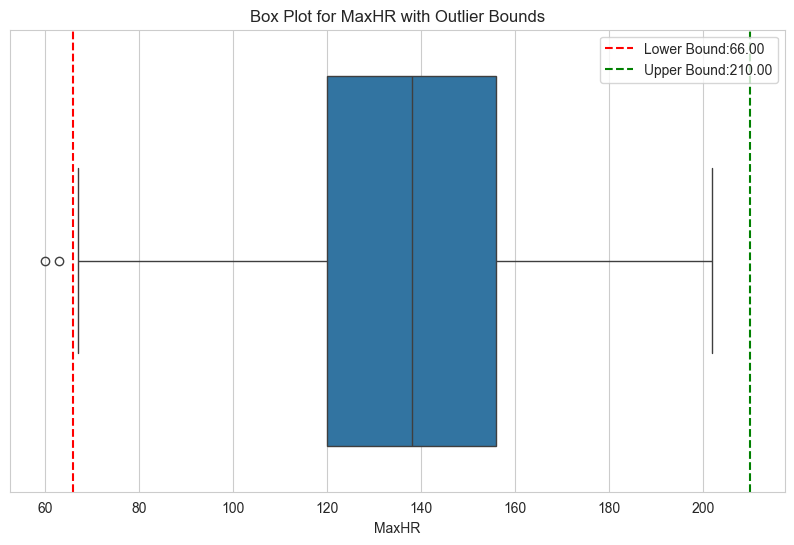

Outlier detection for MaxHR:
Lower bound: 66.0, Upper bound: 210.0
Number of outliers detected: 2 (0.218%)


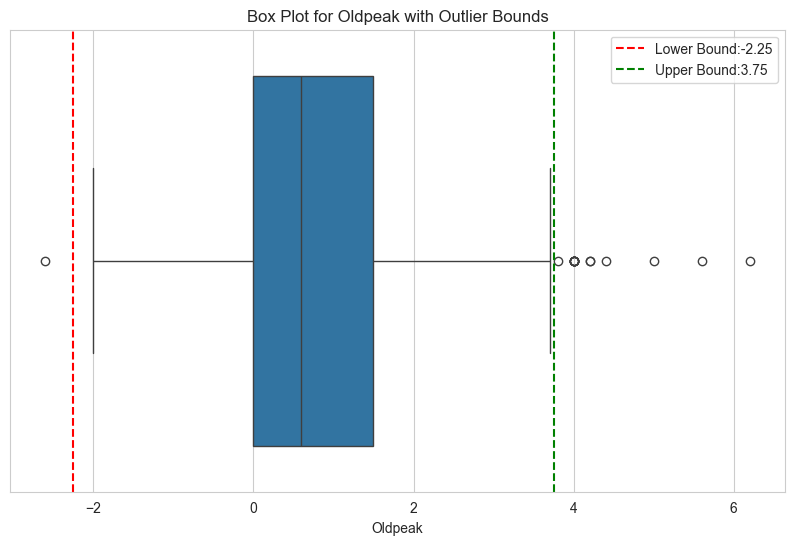

Outlier detection for Oldpeak:
Lower bound: -2.25, Upper bound: 3.75
Number of outliers detected: 16 (1.743%)


In [65]:
for col in outlier_numeric_features :
    detect_outliers_iqr(heart_failure_df,col)

Age               Axes(0.125,0.747241;0.227941x0.132759)
RestingBP      Axes(0.398529,0.747241;0.227941x0.132759)
Cholesterol    Axes(0.672059,0.747241;0.227941x0.132759)
MaxHR             Axes(0.125,0.587931;0.227941x0.132759)
Oldpeak        Axes(0.398529,0.587931;0.227941x0.132759)
dtype: object

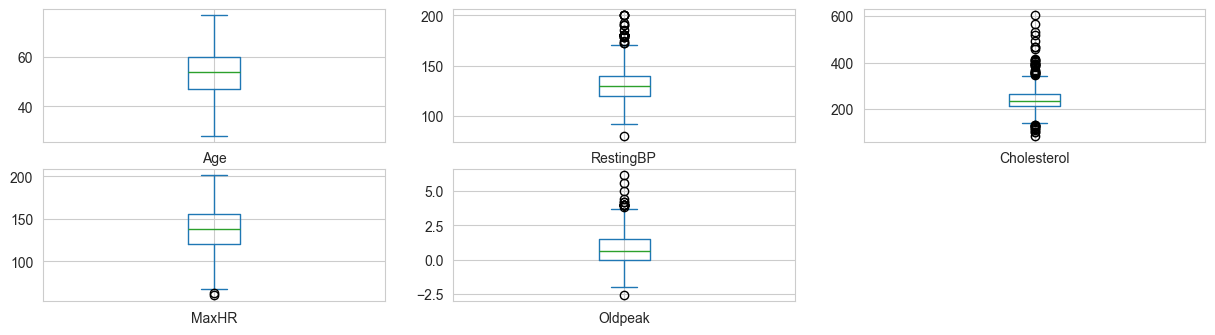

In [66]:
outlier_numeric_features.plot(kind='box', subplots=True, sharex=False, sharey=False, layout=(5,3), figsize=(15,10)) 

Detecting Outliers for `Age` and `MaxHR` using z-score

In [67]:
def detect_outliers_zscore(df, column, threshold=3):
    z_scores = (df[column] - df[column].mean()) / df[column].std()
    outlier_mask = np.abs(z_scores) > threshold
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True)
    plt.title(f'Z-Score Distribution for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()
    print(f'Outlier detection for {column}:')
    print(f'Number of outliers detected: {outlier_mask.sum()} ({outlier_mask.sum() / len(df) * 100:.3f}%)')

    return outlier_mask

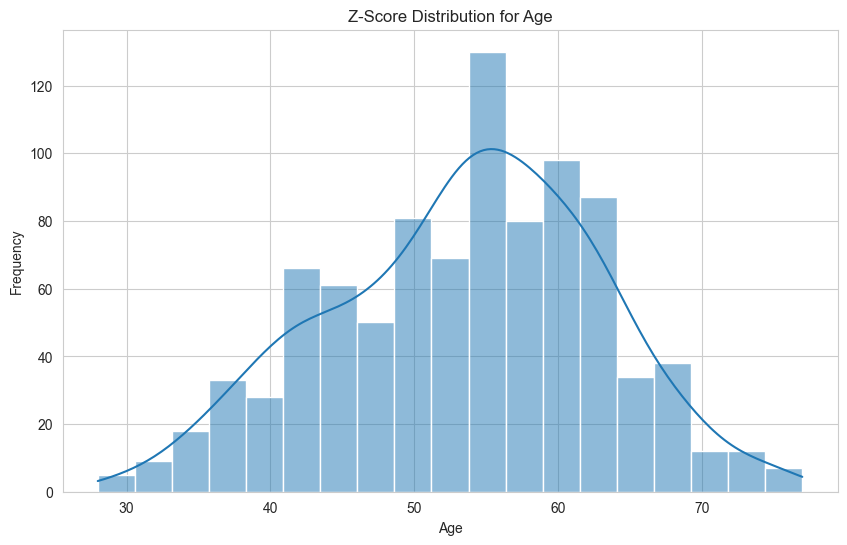

Outlier detection for Age:
Number of outliers detected: 0 (0.000%)


In [68]:
outlier_mask_age = detect_outliers_zscore(heart_failure_df, 'Age')

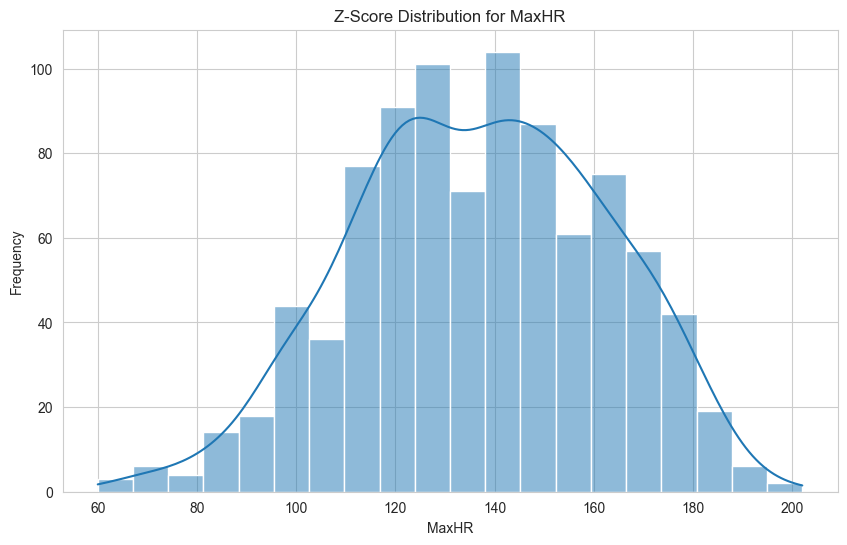

Outlier detection for MaxHR:
Number of outliers detected: 1 (0.109%)


In [69]:
zscore_outlier_mask_maxHR = detect_outliers_zscore(heart_failure_df, 'MaxHR')

### After Detecting the Outliers :
1. `Age` : Has no outliers .
2. `MaxHR` : Has two outliers detected using IQR method but only one outlier using z-score method 
3. Outlier detection for `RestingBP `:
Lower bound: 90.0, Upper bound: 170.0
Number of outliers detected: 28 (3.050%)
4. Outlier detection for `Cholesterol`:
Lower bound: 134.5, Upper bound: 346.5
Number of outliers detected: 41 (4.466%)
5. Outlier detection for `Oldpeak`:
Lower bound: -2.25, Upper bound: 3.75
Number of outliers detected: 16 (1.743%)



#### 4.4.2 Handling Outliers

Function for plotting IQR :

In [70]:
def plot_iqr_boxplot(df, original_column, capped_column):
    Q1 = df[original_column].quantile(0.25)
    Q3 = df[original_column].quantile(0.75)
    IQR = Q3 - Q1
    upper_threshold = Q3 + 1.5 * IQR
    lower_threshold = Q1 - 1.5 * IQR
    original_outliers = ((df[original_column] > upper_threshold) | (df[original_column] < lower_threshold)).sum()
    original_outlier_percent = (original_outliers / len(df)) * 100

    capped_outliers = ((df[capped_column] > upper_threshold) | (df[capped_column] < lower_threshold)).sum()
    capped_outlier_percent = (capped_outliers / len(df)) * 100

    print(f'Original outliers in {original_column}: {original_outliers} ({original_outlier_percent:.2f}%)')
    print(f'Outliers after capping in {capped_column}: {capped_outliers} ({capped_outlier_percent:.2f}%)')
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    sns.boxplot(y=df[original_column], ax=ax[0])
    ax[0].set_title(f'IQR Box Plot for {original_column} Before Capping')
    ax[0].set_ylabel(original_column)

    sns.boxplot(y=df[capped_column], ax=ax[1])
    ax[1].set_title(f'IQR Box Plot for {capped_column} After Capping')
    ax[1].set_ylabel(capped_column)

    plt.tight_layout()
    plt.show()


Function to detect the outliers after using Log Transformation :

In [71]:
def detect_outliers_with_log(df, original_column):
    # Apply log transformation to the column
    transformed_column = f"{original_column}_log_transformation"
    df[transformed_column] = np.log(df[original_column] + 1)  # Adding 1 to avoid log(0)
    
    Q1_orig = df[original_column].quantile(0.25)
    Q3_orig = df[original_column].quantile(0.75)
    IQR_orig = Q3_orig - Q1_orig
    upper_orig = Q3_orig + 1.5 * IQR_orig
    lower_orig = Q1_orig - 1.5 * IQR_orig
    orig_outliers = ((df[original_column] > upper_orig) | (df[original_column] < lower_orig)).sum()
    
    Q1_trans = df[transformed_column].quantile(0.25)
    Q3_trans = df[transformed_column].quantile(0.75)
    IQR_trans = Q3_trans - Q1_trans
    upper_trans = Q3_trans + 1.5 * IQR_trans
    lower_trans = Q1_trans - 1.5 * IQR_trans
    trans_outliers = ((df[transformed_column] > upper_trans) | (df[transformed_column] < lower_trans)).sum()
    
    print(f"Original outliers in '{original_column}': {orig_outliers} ({orig_outliers / len(df) * 100:.2f}%)")
    print(f"Outliers in '{transformed_column}' after log transformation: {trans_outliers} ({trans_outliers / len(df) * 100:.2f}%)")
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    sns.boxplot(y=df[original_column], ax=axes[0])
    axes[0].set_title(f"Box Plot for {original_column} Before Log Transformation")
    axes[0].set_ylabel(original_column)
    
    sns.boxplot(y=df[transformed_column], ax=axes[1])
    axes[1].set_title(f"Box Plot for {original_column} After Log Transformation")
    axes[1].set_ylabel(transformed_column)
    
    plt.tight_layout()
    plt.show()




Function to Plot the outliers before and after perfroming power transformation

In [72]:


def detect_outliers_with_power_transform(df, original_column):
    # Apply Power Transformation (Yeo-Johnson)
    transformer = PowerTransformer(method='yeo-johnson')
    transformed_column = f"{original_column}_Transformed"
    df[transformed_column] = transformer.fit_transform(df[[original_column]])
    
    # Calculate IQR for original data
    Q1_orig = df[original_column].quantile(0.25)
    Q3_orig = df[original_column].quantile(0.75)
    IQR_orig = Q3_orig - Q1_orig
    upper_orig = Q3_orig + 1.5 * IQR_orig
    lower_orig = Q1_orig - 1.5 * IQR_orig
    orig_outliers = ((df[original_column] > upper_orig) | (df[original_column] < lower_orig)).sum()
    
    # Calculate IQR for power-transformed data
    Q1_trans = df[transformed_column].quantile(0.25)
    Q3_trans = df[transformed_column].quantile(0.75)
    IQR_trans = Q3_trans - Q1_trans
    upper_trans = Q3_trans + 1.5 * IQR_trans
    lower_trans = Q1_trans - 1.5 * IQR_trans
    trans_outliers = ((df[transformed_column] > upper_trans) | (df[transformed_column] < lower_trans)).sum()
    
    # Print summary
    print(f"Original outliers in '{original_column}': {orig_outliers} ({orig_outliers / len(df) * 100:.2f}%)")
    print(f"Outliers in '{transformed_column}' after Power Transformation: {trans_outliers} ({trans_outliers / len(df) * 100:.2f}%)")
    
    # Plot boxplots to visualize
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    sns.boxplot(y=df[original_column], ax=axes[0])
    axes[0].set_title(f"Box Plot for {original_column} Before Power Transformation")
    axes[0].set_ylabel(original_column)
    
    sns.boxplot(y=df[transformed_column], ax=axes[1])
    axes[1].set_title(f"Box Plot for {original_column} After Power Transformation")
    axes[1].set_ylabel(transformed_column)
    
    plt.tight_layout()
    plt.show()


Function for Plotting Original Vs Transformed KDE Histogram for each feature :

In [73]:
def plot_original_vs_transformed_kde_hist(df, column_name, transformed_column_name):

    fig, ax = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

    sns.histplot(df[column_name], ax=ax[0], kde=True, color='skyblue', bins=30, edgecolor='black', alpha=0.7)
    ax[0].set_title(f'Original {column_name} Distribution', fontsize=14, weight='bold')
    ax[0].set_xlabel(column_name, fontsize=12)
    ax[0].set_ylabel('Frequency', fontsize=12)
    ax[0].tick_params(axis='both', which='major', labelsize=10)
    ax[0].grid(axis='y', linestyle='--', alpha=0.7)

    sns.histplot(df[transformed_column_name], ax=ax[1], kde=True, color='coral', bins=30, edgecolor='black', alpha=0.7)
    ax[1].set_title(f'Transformed {column_name} Distribution', fontsize=14, weight='bold')
    ax[1].set_xlabel(transformed_column_name, fontsize=12)
    ax[1].set_ylabel('Frequency', fontsize=12)
    ax[1].tick_params(axis='both', which='major', labelsize=10)
    ax[1].grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()



Function for applying SQRT Transformation :

In [74]:

def handling_outliers_sqrt_transformation(df, column_name):
    new_column_name = f"{column_name}_sqrt_transformation"
    df[new_column_name] = np.sqrt(df[column_name])
    return df

Function for applying Log Transformation :

In [75]:
def handling_outliers_log_transformation(df, column_name):
    new_column_name = f"{column_name}_log_transformation"
    df[new_column_name] = np.log1p(df[column_name])

    return df

Function for Capping Outliers IQR :

In [76]:
def cap_outliers_iqr(df, column, new_column_name, iqr_factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    upper_threshold = Q3 + iqr_factor * IQR
    lower_threshold = Q1 - iqr_factor * IQR
    df[new_column_name] = np.where(df[column] > upper_threshold, upper_threshold, df[column])
    df[new_column_name] = np.where(df[new_column_name] < lower_threshold, lower_threshold, df[new_column_name])
    return df

1. `MaxHR` Capping

In [77]:
heart_failure_df = cap_outliers_iqr(heart_failure_df, 'MaxHR', 'MaxHR_Capped')

Original outliers in MaxHR: 2 (0.22%)
Outliers after capping in MaxHR_Capped: 0 (0.00%)


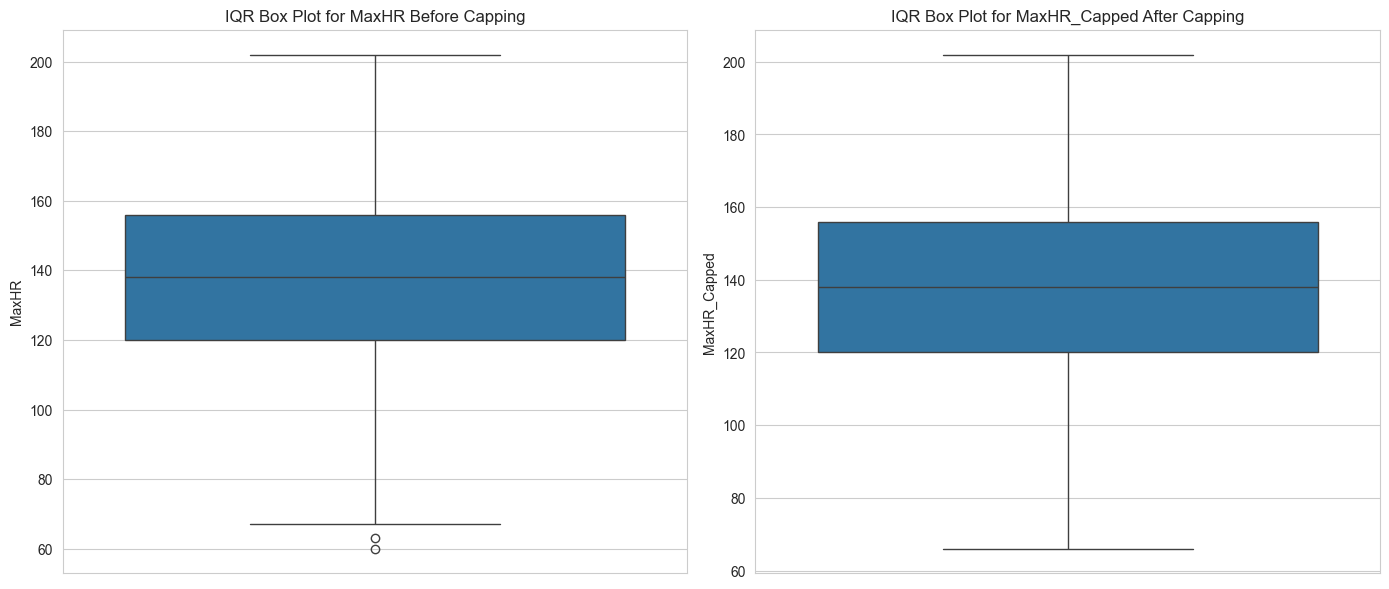

In [78]:
plot_iqr_boxplot(heart_failure_df,'MaxHR','MaxHR_Capped')

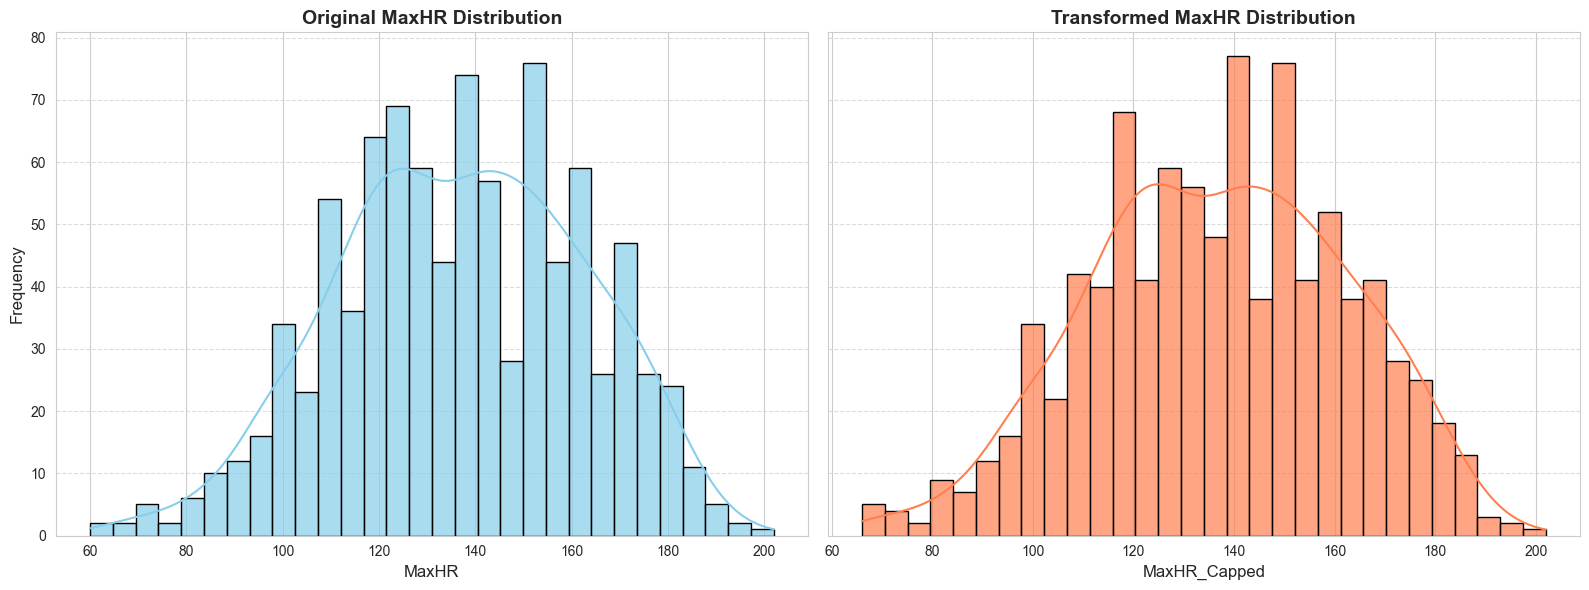

In [79]:
plot_original_vs_transformed_kde_hist(heart_failure_df,'MaxHR', 'MaxHR_Capped')

2. `RestingBP` Capping

In [80]:
heart_failure_df = cap_outliers_iqr(heart_failure_df, 'RestingBP', 'RestingBP_Capped')

Original outliers in RestingBP: 27 (2.94%)
Outliers after capping in RestingBP_Capped: 0 (0.00%)


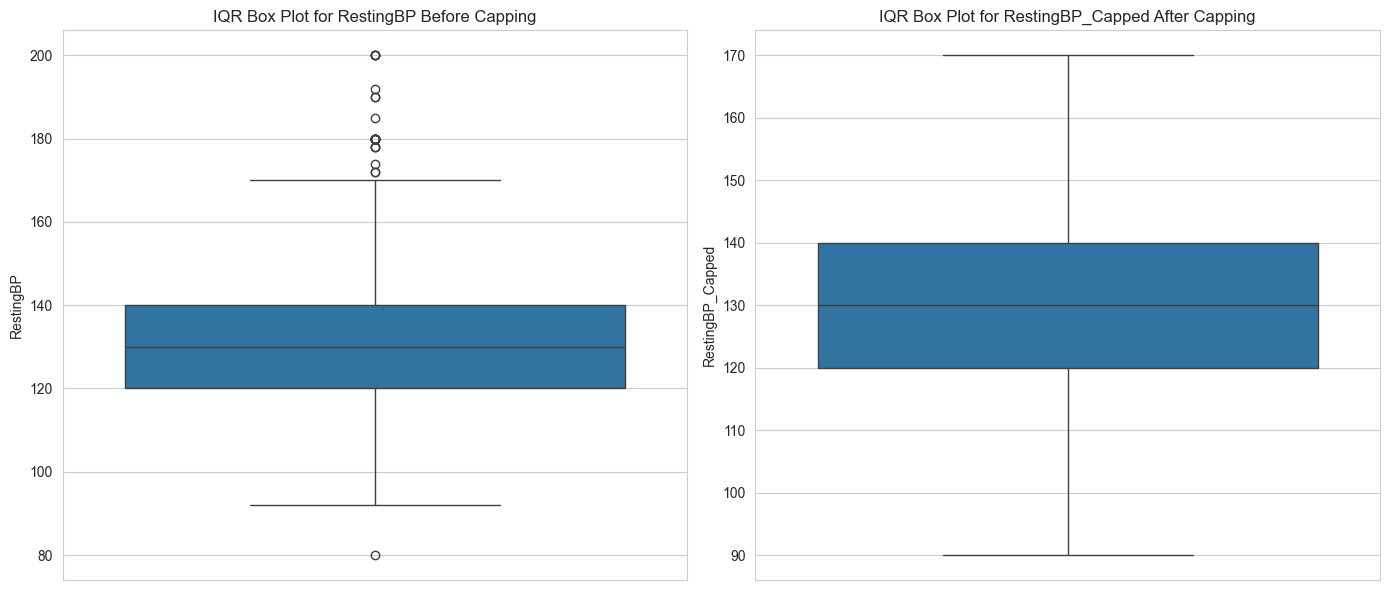

In [81]:
plot_iqr_boxplot(heart_failure_df,'RestingBP', 'RestingBP_Capped')

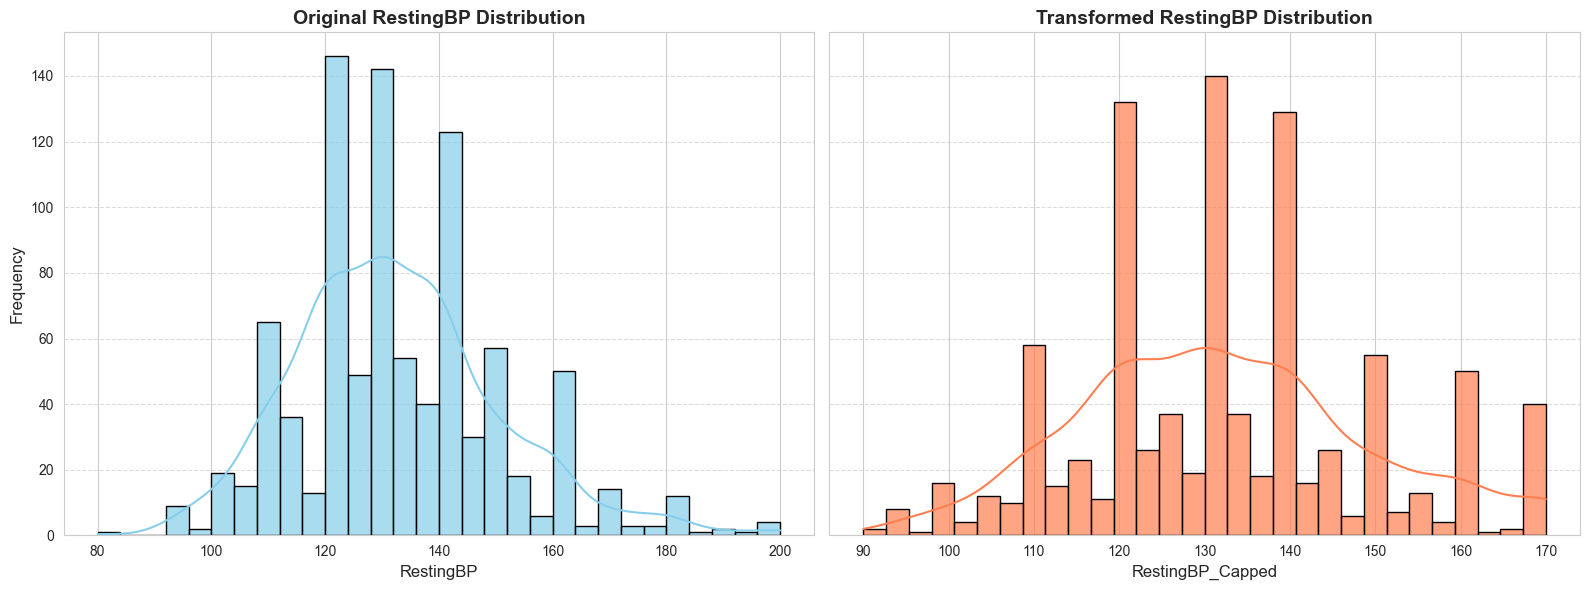

In [82]:
plot_original_vs_transformed_kde_hist(heart_failure_df,'RestingBP', 'RestingBP_Capped')

2. `RestingBP` Log Transformation

In [83]:
heart_failure_df = handling_outliers_log_transformation(heart_failure_df,'RestingBP')

Original outliers in 'RestingBP': 27 (2.94%)
Outliers in 'RestingBP_log_transformation' after log transformation: 33 (3.59%)


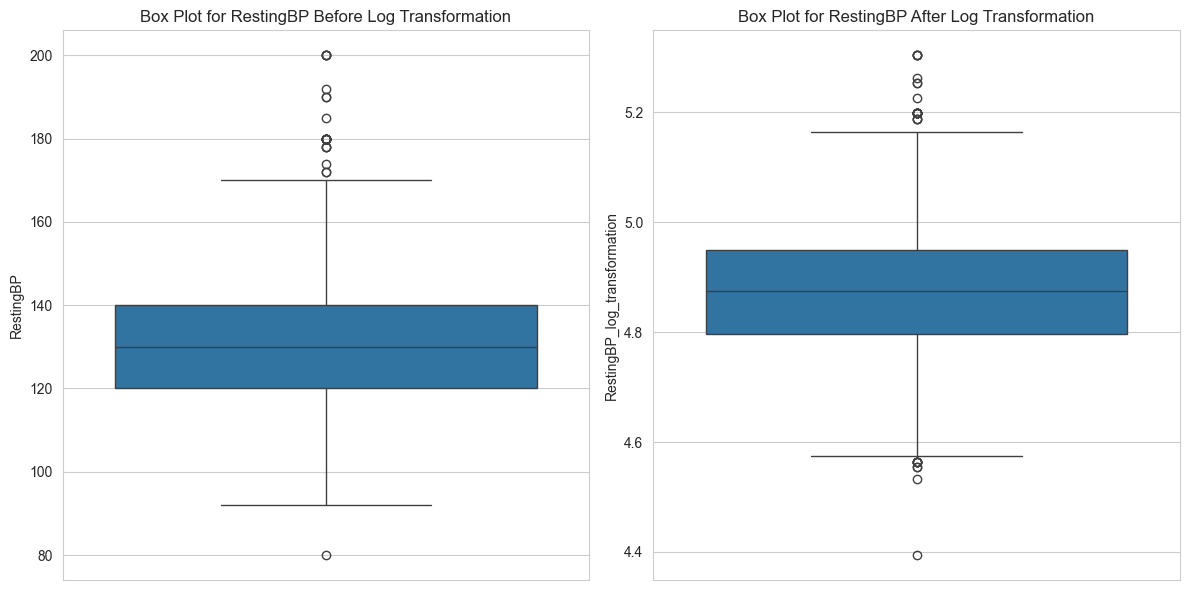

In [84]:
detect_outliers_with_log(heart_failure_df,'RestingBP')

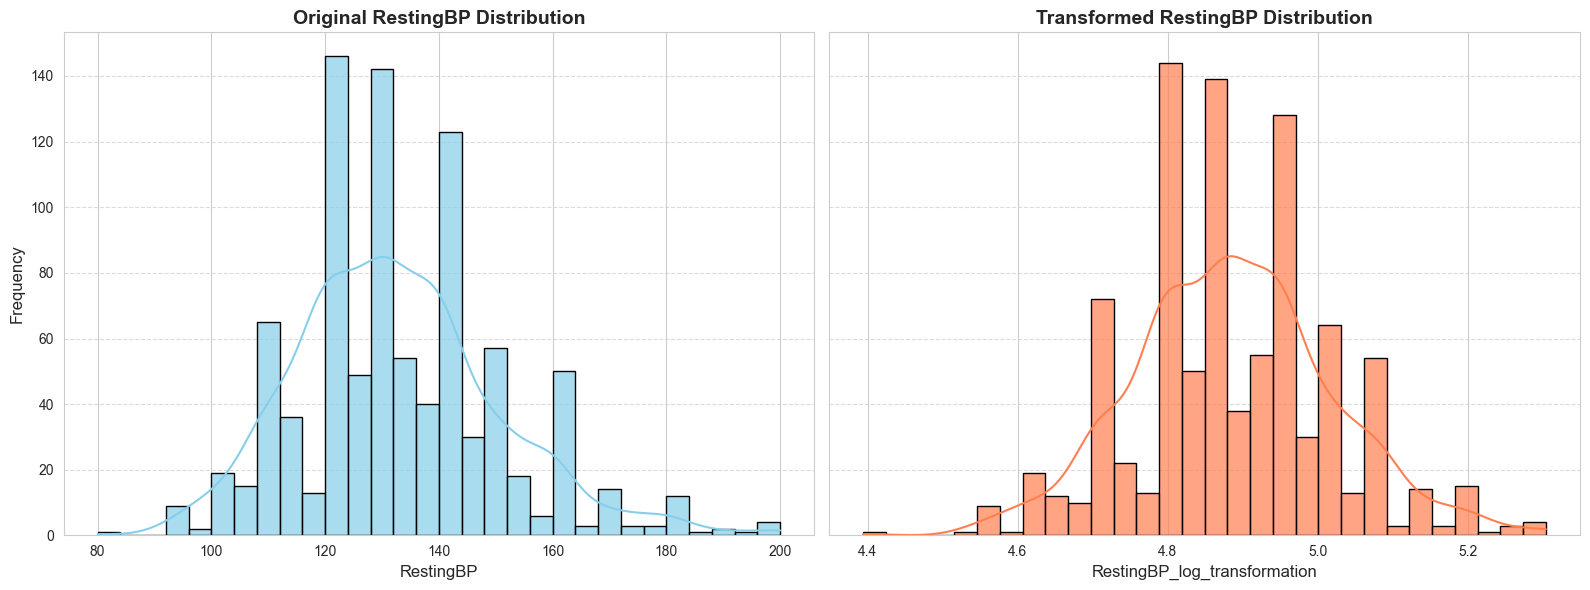

In [85]:
plot_original_vs_transformed_kde_hist(heart_failure_df,'RestingBP', 'RestingBP_log_transformation')

3. `Oldpeak` Capping

In [86]:
heart_failure_df = cap_outliers_iqr(heart_failure_df, 'Oldpeak', 'Oldpeak_Capped')

Original outliers in Oldpeak: 16 (1.74%)
Outliers after capping in Oldpeak_Capped: 0 (0.00%)


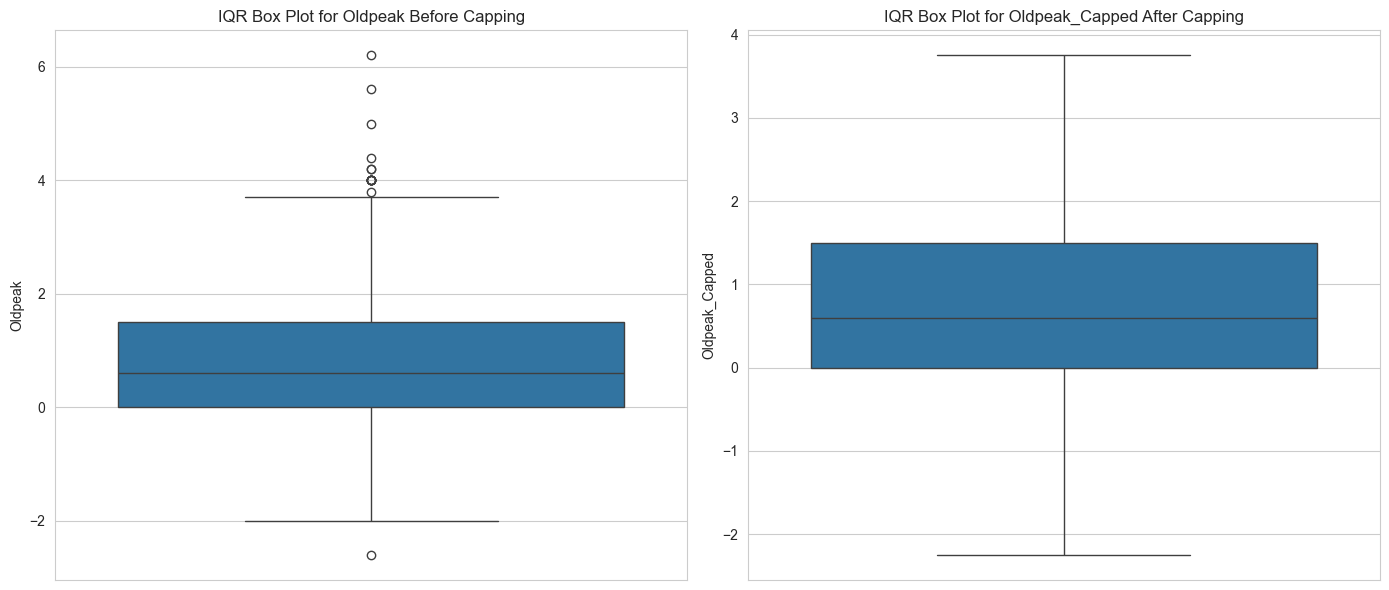

In [87]:
plot_iqr_boxplot(heart_failure_df,'Oldpeak', 'Oldpeak_Capped')

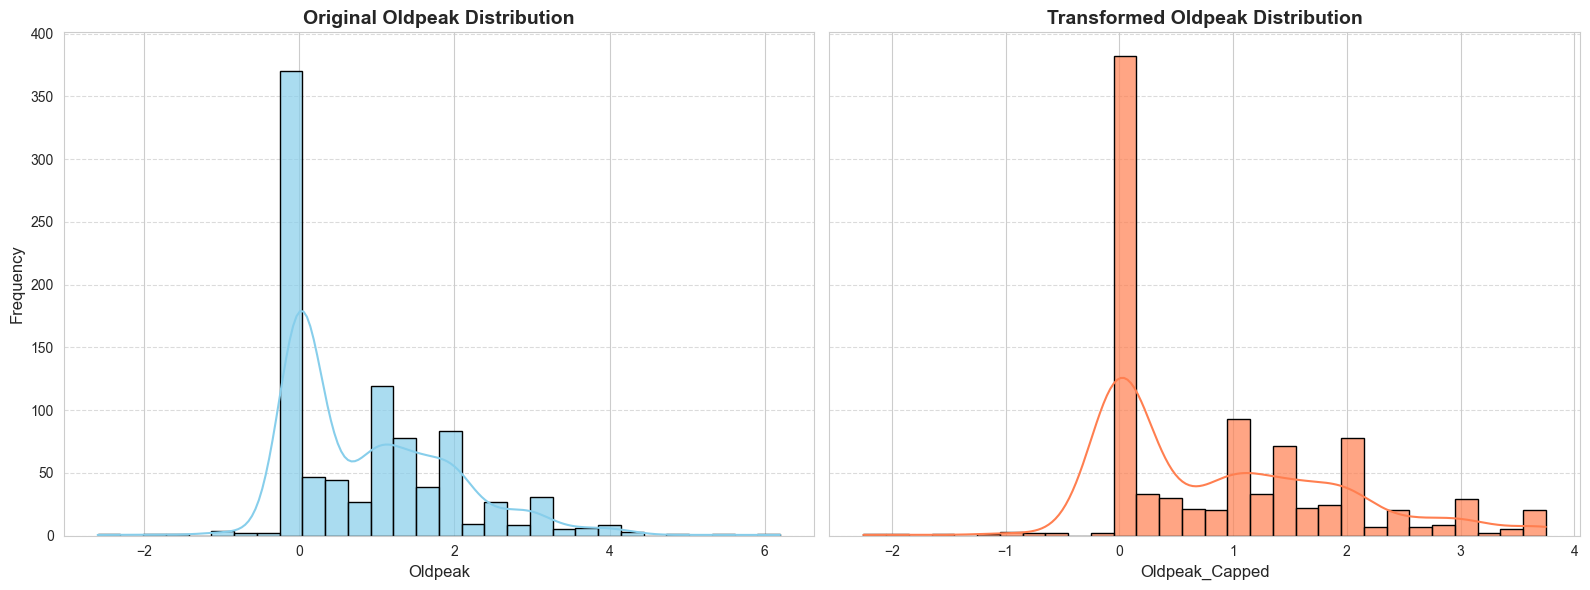

In [88]:
plot_original_vs_transformed_kde_hist(heart_failure_df,'Oldpeak', 'Oldpeak_Capped')

3. `Oldpeak` using power Transformation

In [89]:
transformer = PowerTransformer(method='yeo-johnson')
heart_failure_df['Oldpeak_Transformed'] = transformer.fit_transform(heart_failure_df[['Oldpeak']])

Original outliers in 'Oldpeak': 16 (1.74%)
Outliers in 'Oldpeak_Transformed' after Power Transformation: 4 (0.44%)


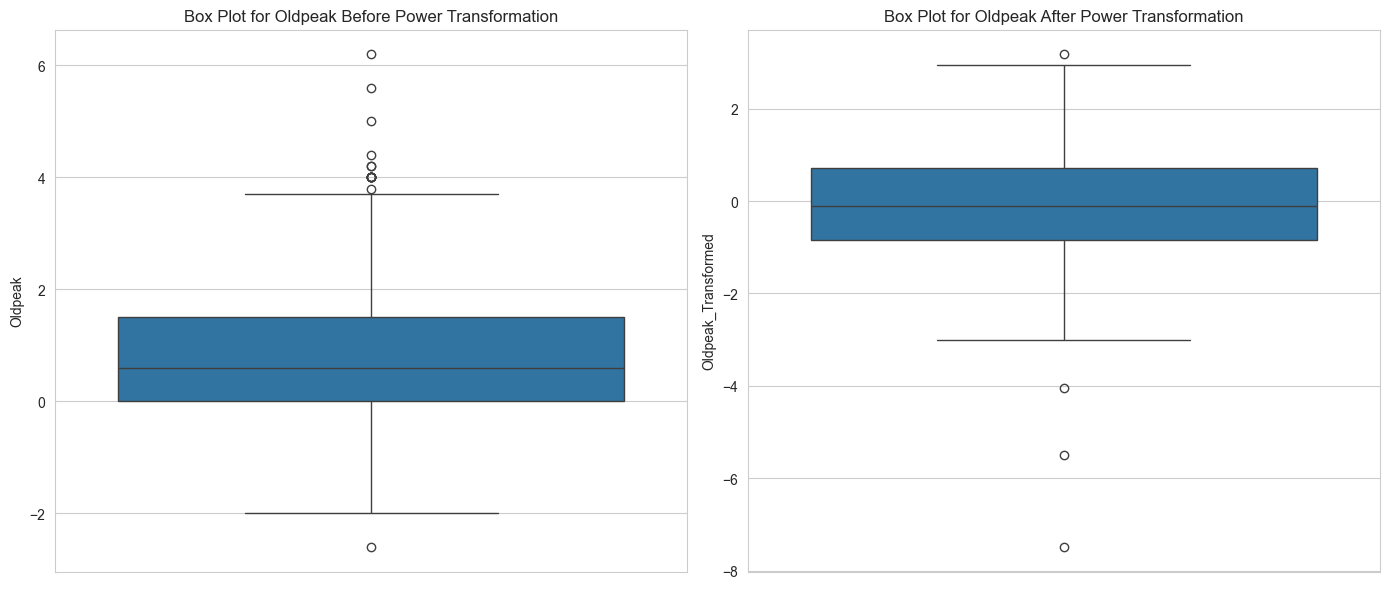

In [90]:
detect_outliers_with_power_transform(heart_failure_df,'Oldpeak')

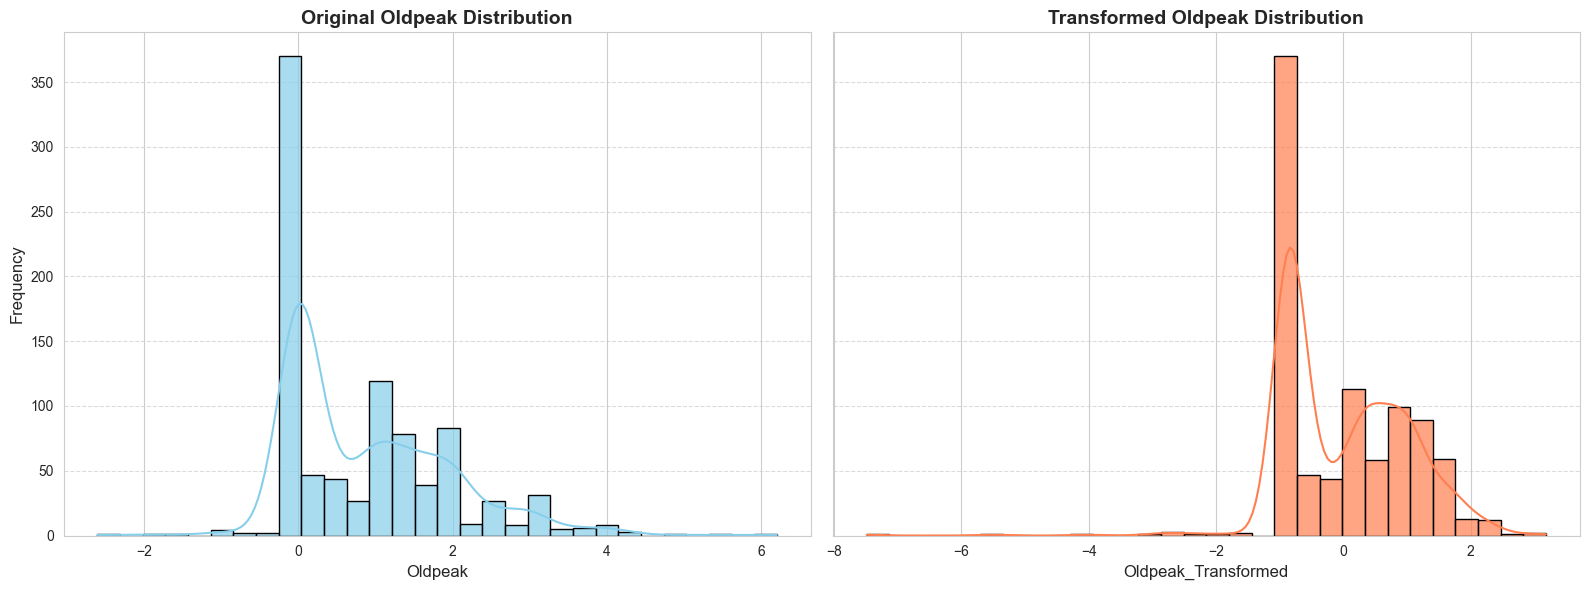

In [91]:
plot_original_vs_transformed_kde_hist(heart_failure_df,'Oldpeak','Oldpeak_Transformed')

4.`Cholesterol`:
Since Number of outliers detected: 183 (19.935%) ,so using capping direclty will effect on the feature values disturbution , so need for standardization or transformation in order to adjust the values

In [92]:
heart_failure_df = cap_outliers_iqr(heart_failure_df, 'Cholesterol', 'Cholesterol_Capped')

Original outliers in Cholesterol: 41 (4.47%)
Outliers after capping in Cholesterol_Capped: 0 (0.00%)


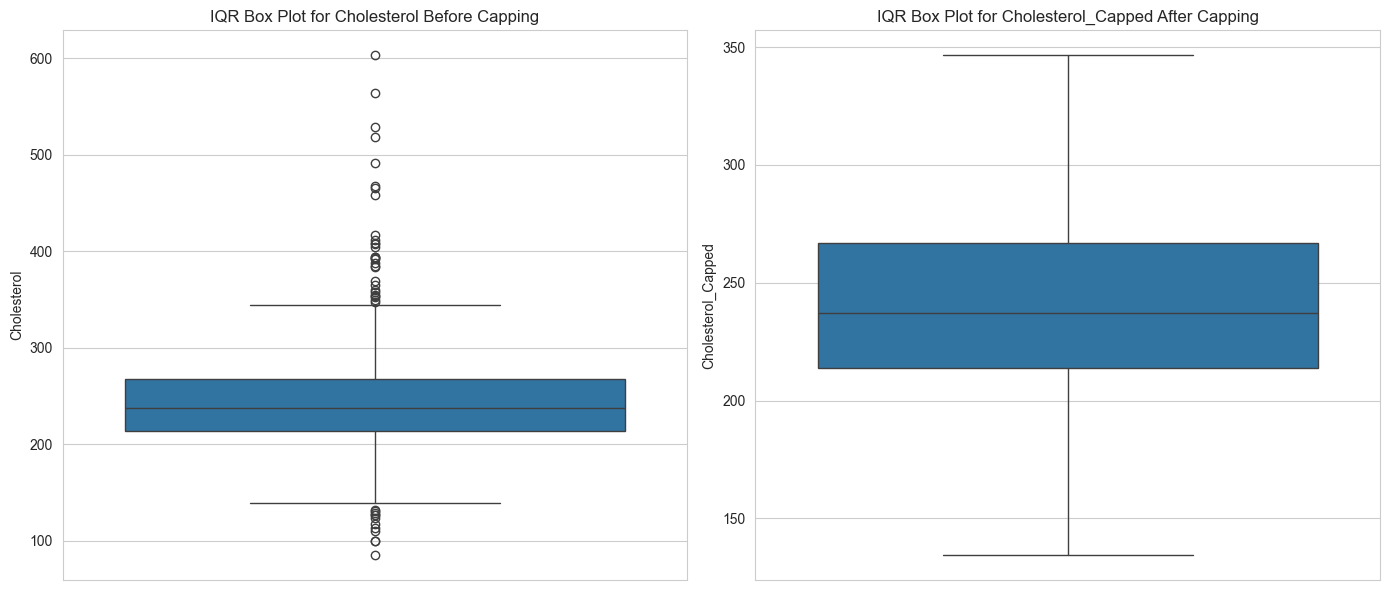

In [93]:
plot_iqr_boxplot(heart_failure_df,'Cholesterol', 'Cholesterol_Capped')

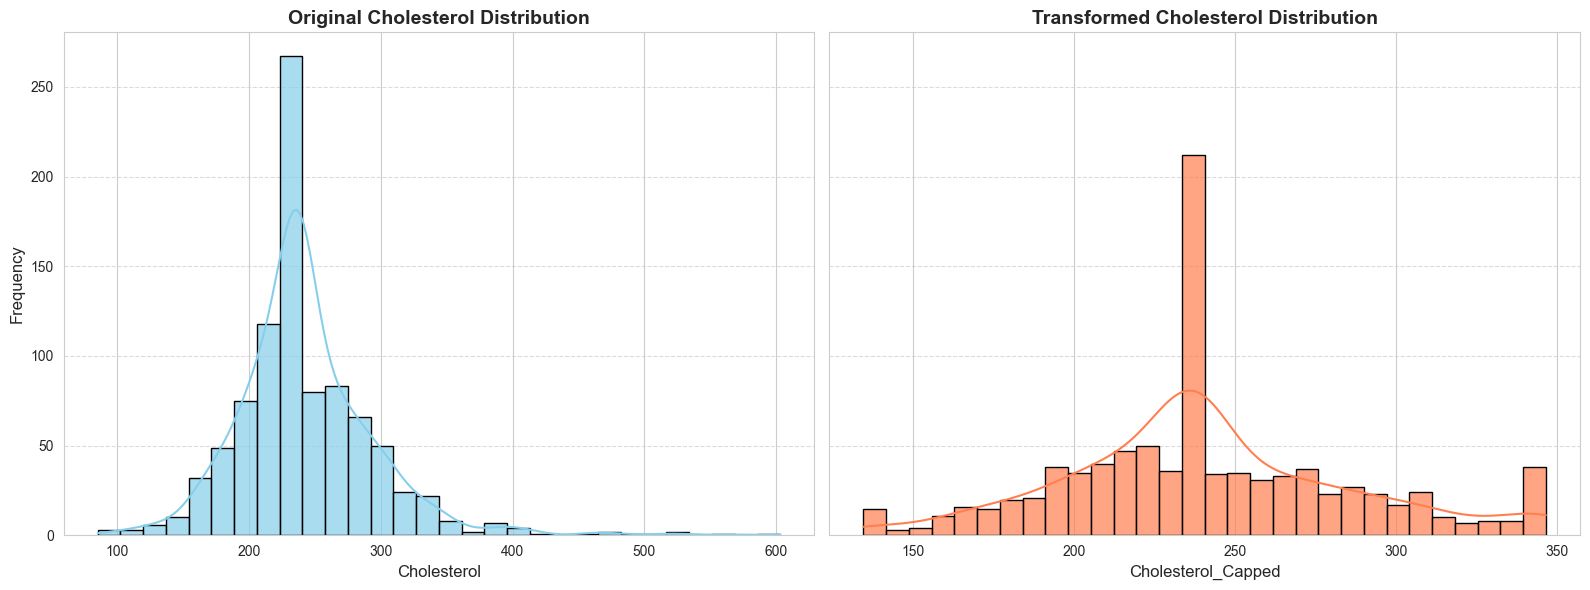

In [94]:
plot_original_vs_transformed_kde_hist(heart_failure_df,'Cholesterol', 'Cholesterol_Capped')

In [95]:
heart_failure_df = handling_outliers_log_transformation(heart_failure_df,'Cholesterol')

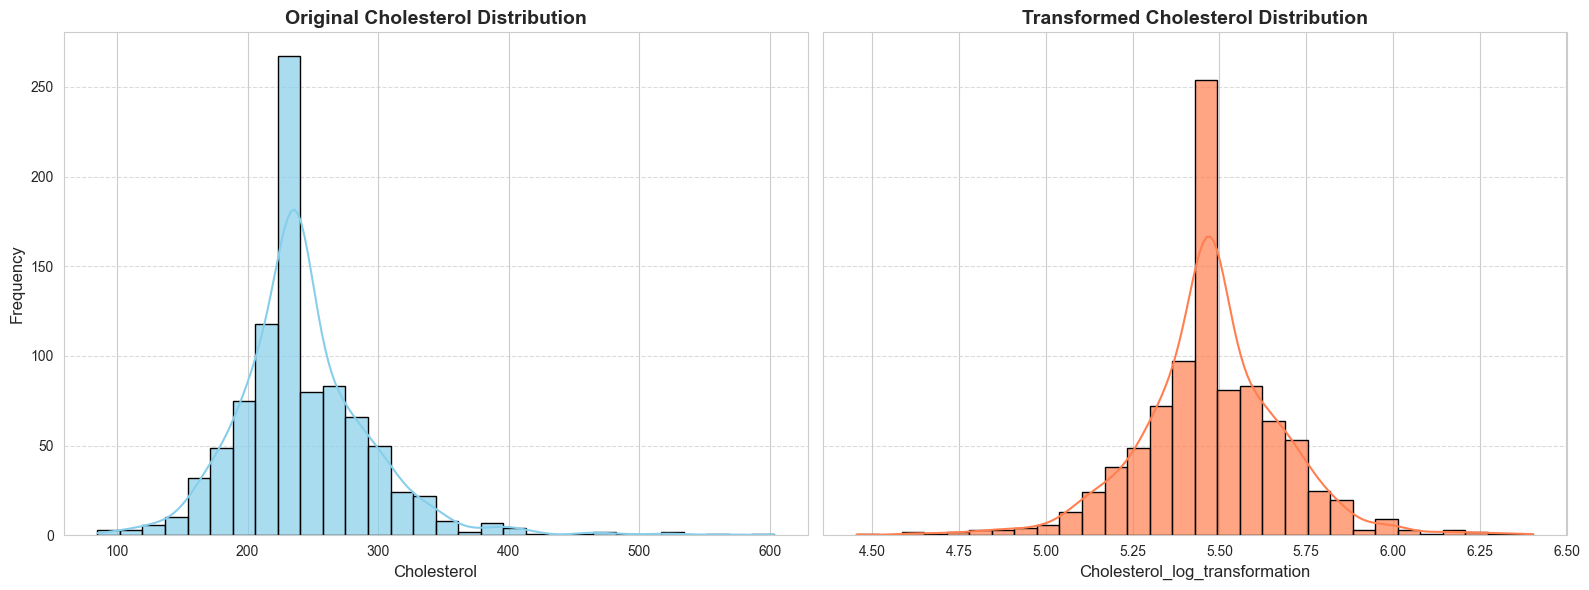

In [96]:
plot_original_vs_transformed_kde_hist(heart_failure_df,'Cholesterol','Cholesterol_log_transformation')

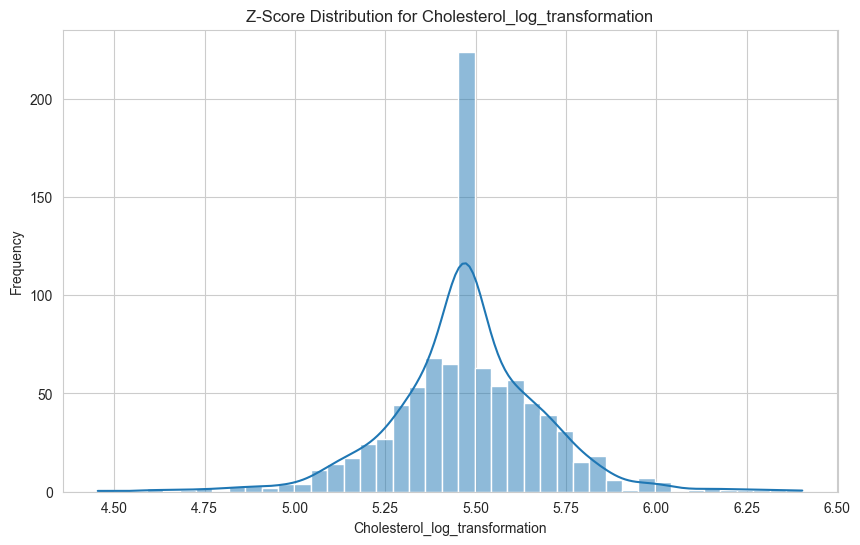

Outlier detection for Cholesterol_log_transformation:
Number of outliers detected: 15 (1.634%)


0      False
1      False
2      False
3      False
4      False
       ...  
913    False
914    False
915    False
916    False
917    False
Name: Cholesterol_log_transformation, Length: 918, dtype: bool

In [97]:
detect_outliers_zscore(heart_failure_df,'Cholesterol_log_transformation')

In [98]:
heart_failure_df

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  MaxHR_Capped  \
0      172              N      0.0       Up             0         172.0   
1      156              N      1.0     Flat             1         156.0   
2       98              N      0.0       Up             0          98.0   
3      108              Y      1.5     Flat             1         108.0   
4      122              N      0.0       Up             0         122.0   
..     ...            ...      ...      ...           ...           ...   
913    132              N      1.2     Flat             1         132.0   
914    141              N      3.4     Flat             1         141.0   
915    115              Y      1.2     Flat             1         115.0   
916    174              N      0.0     Flat             1         174.0   
917    173              N      0.0       Up             0         173.0   

     RestingBP_Capped  RestingBP_log_transformation  Oldpeak_Capped  \
0               140.0                      4.948760             0.0   
1               160.0                      5.081404             1.0   
2               130.0                      4.875197             0.0   
3               138.0                      4.934474             1.5   
4               150.0                      5.017280             0.0   
..                ...                           ...             ...   
913             110.0                      4.709530             1.2   
914             144.0                      4.976734             3.4   
915             130.0                      4.875197             1.2   
916             130.0                      4.875197             0.0   
917             138.0                      4.934474             0.0   

     Oldpeak_Transformed  Cholesterol_Capped  Cholesterol_log_transformation  
0              -0.851394               289.0                        5.669881  
1               0.286444               180.0                        5.198497  
2              -0.851394               283.0                        5.648974  
3               0.709738               214.0                        5.370638  
4              -0.851394               195.0                        5.278115  
..                   ...                 ...                             ...  
913             0.463557               264.0                        5.579730  
914             1.927524               193.0                        5.267858  
915             0.463557               134.5                        4.882802  
916            -0.851394               236.0                        5.468060  
917            -0.851394               175.0                        5.170484  

[918 rows x 19 columns]

##### Replacing the Capped Columns with each feature and Dropping the Capped

In [99]:
def drop_columns(df, columns_to_drop):
    df = df.drop(columns=columns_to_drop, errors='ignore') 
    return df

In [100]:
heart_failure_df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'MaxHR_Capped', 'RestingBP_Capped',
       'RestingBP_log_transformation', 'Oldpeak_Capped', 'Oldpeak_Transformed',
       'Cholesterol_Capped', 'Cholesterol_log_transformation'],
      dtype='object')

In [101]:
heart_failure_df['MaxHR'] = heart_failure_df['MaxHR_Capped']
heart_failure_df['Oldpeak'] = heart_failure_df['Oldpeak_Capped']
heart_failure_df['RestingBP'] = heart_failure_df['RestingBP_Capped']
# heart_failure_df['Cholesterol'] = heart_failure_df['Cholesterol_Capped']
heart_failure_df['Cholesterol'] = heart_failure_df['Cholesterol_log_transformation']

columns_to_drop = [
    'MaxHR_Capped', 'Oldpeak_Capped', 'RestingBP_Capped',
    'Cholesterol_Capped', 'Cholesterol_log_transformation',
    'RestingBP_log_transformation', 'Oldpeak_Transformed'
]
heart_failure_df = drop_columns(heart_failure_df, columns_to_drop)

In [102]:
handled_outlier_feature = heart_failure_df.loc[:,['Age','RestingBP','Cholesterol', 'MaxHR', 'Oldpeak']]


#### 4.4.3 Show Histogram KDE Distirbution after Handling Outliers for `MaxHR` , `RestingBP` & `Oldpeak`

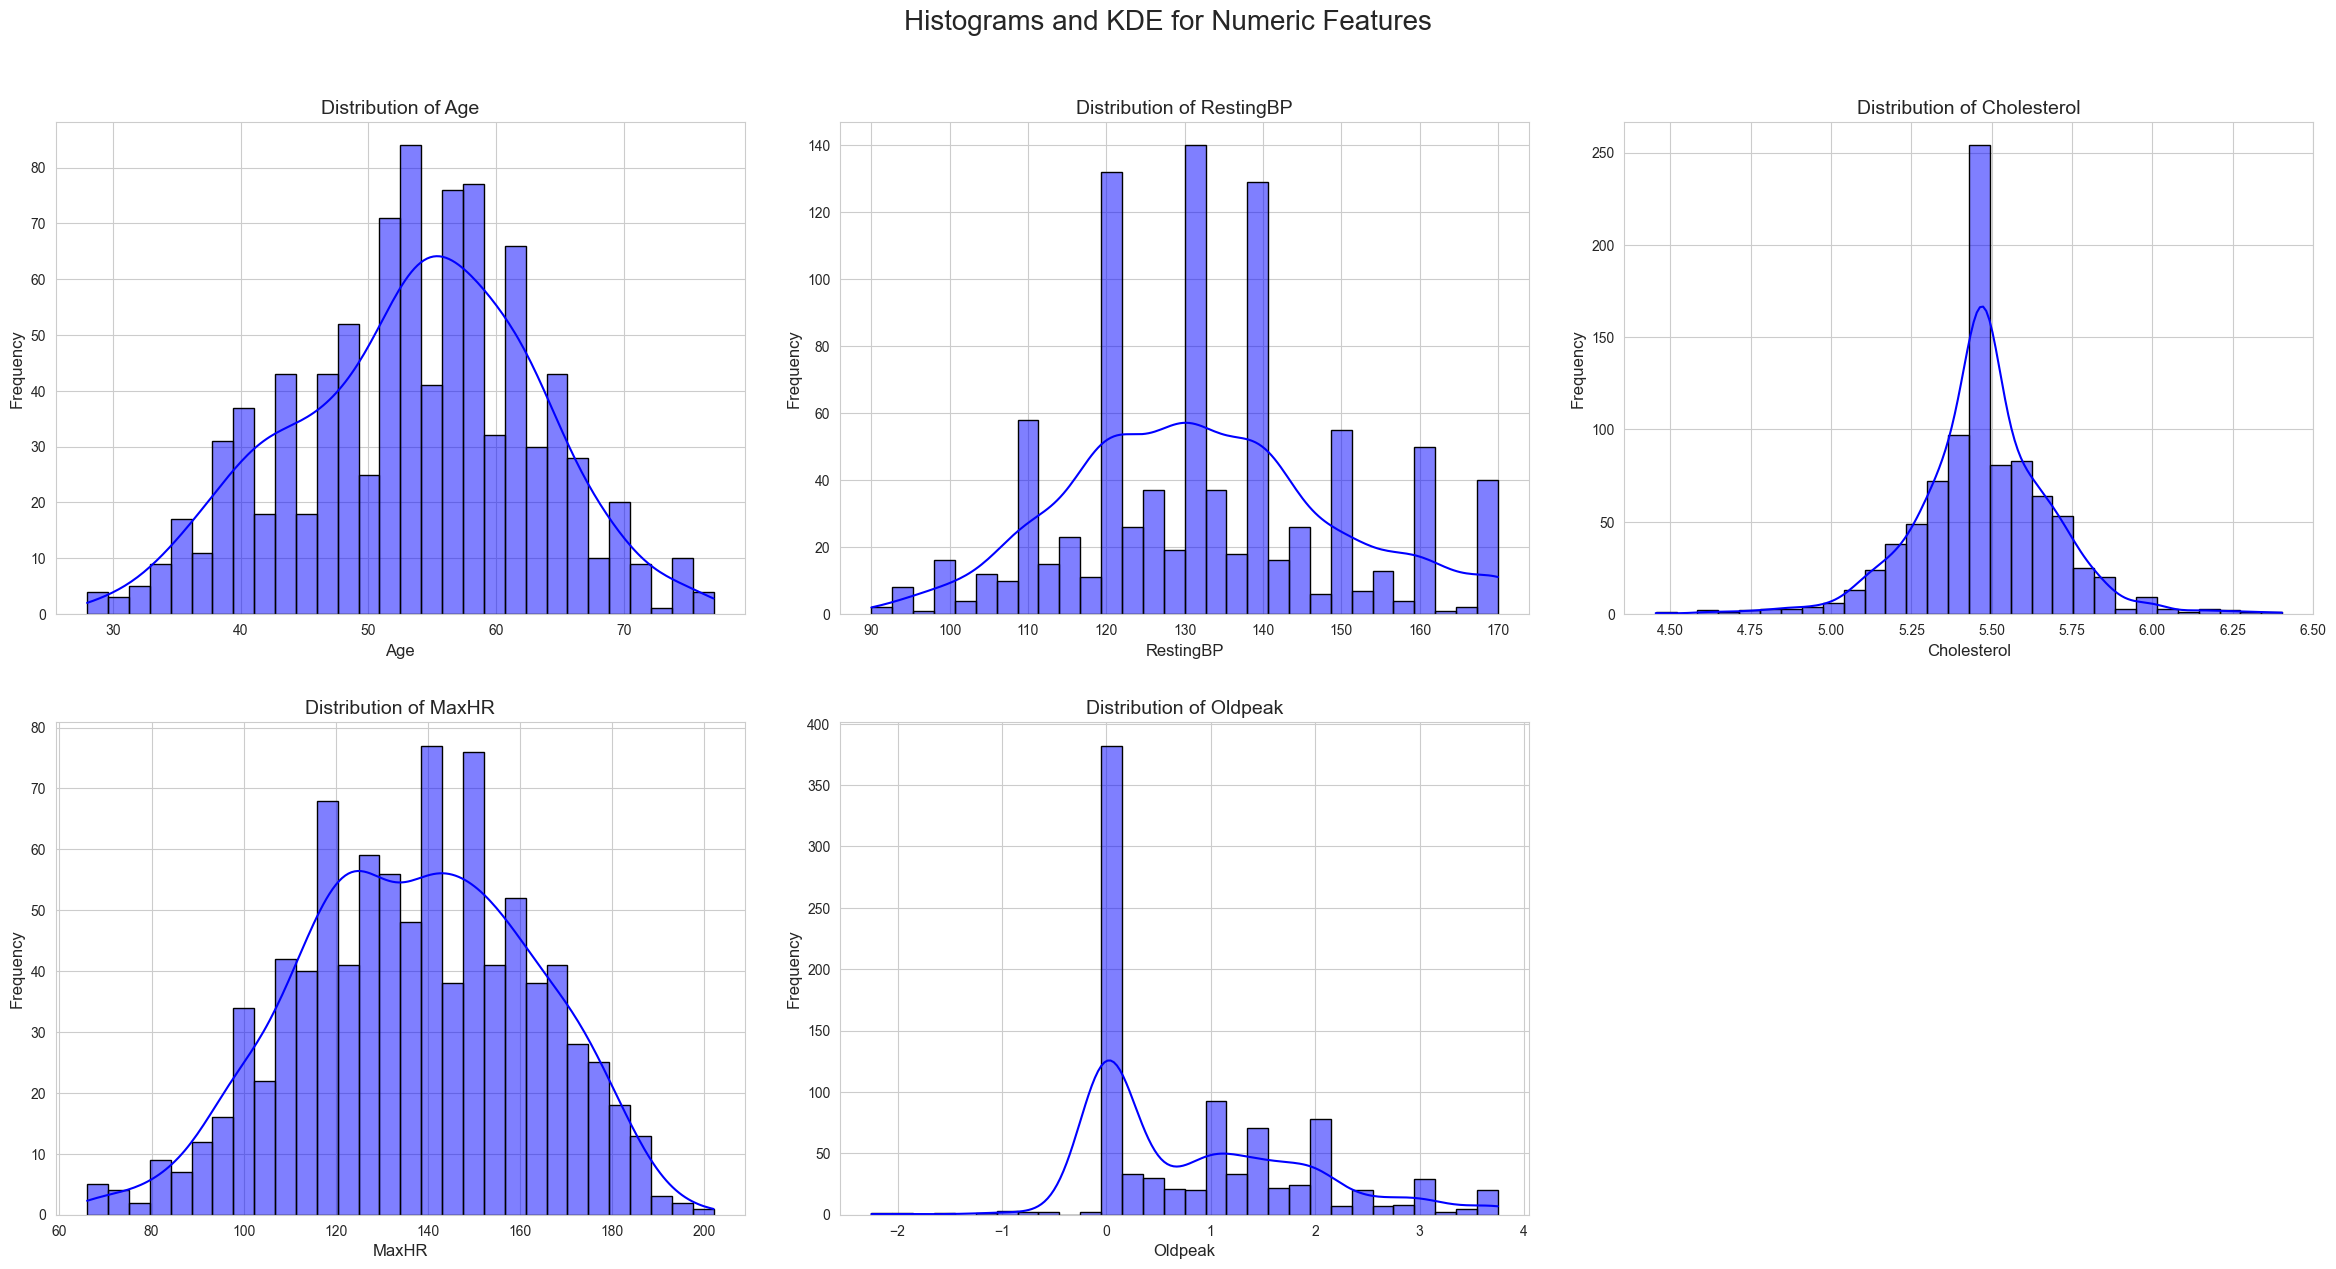

In [103]:
plot_histogram_kde_distirbution(heart_failure_df,handled_outlier_feature)

### 4.5 ◆ Binning & Smoothing




In [104]:
heart_failure_df_binning = heart_failure_df.copy()

In [105]:
def plot_binned_distribution(df, column, title, xlabel, ylabel, color='skyblue'):

    plt.figure(figsize=(10, 6))
    sns.barplot(
        x=df[column].value_counts().index, 
        y=df[column].value_counts().values, 
        palette='coolwarm', 
        edgecolor='black'
    )
    plt.title(title, fontsize=16, weight='bold')
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)
    plt.xticks(rotation=45, fontsize=12, weight='bold', ha='right')
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()




### 4.5.1 Apply Binning for `Oldpeak`

Binning: Based on Medical domain knowledge base:

1. `ST Elevation`: For Oldpeak values < 0.
2. `Normal`: For Oldpeak = 0. (no depression, healthy heart)
3. `Mild Depression`: For Oldpeak values >0 and <=1.0. (slight depression, possible risk).
4. `Moderate Depression`: For Oldpeak values  >1.0 and <=2.0. (moderate depression, likely risk).
5. `Severe Depression`: For Oldpeak values greater than 2.0. (high depression, severe heart condition risk).


In [106]:
print(heart_failure_df_binning['Oldpeak'].describe())


count    918.000000
mean       0.877778
std        1.031693
min       -2.250000
25%        0.000000
50%        0.600000
75%        1.500000
max        3.750000
Name: Oldpeak, dtype: float64


In [107]:
heart_failure_df_binning.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [108]:
bins = [-float('inf'), -0.01, 0.0, 1.0, 2.0, float('inf')]  
labels = ['ST Elevation','Normal','Mild Depression','Moderate Depression','Severe Depression'  ]

heart_failure_df_binning['Oldpeak_Bin'] = pd.cut(heart_failure_df_binning['Oldpeak'], bins=bins, labels=labels, right=True)

bin_means = heart_failure_df_binning.groupby('Oldpeak_Bin')['Oldpeak'].mean()

bin_to_mean_map = bin_means.to_dict()

heart_failure_df_binning['Oldpeak_Binned_Numeric'] = heart_failure_df_binning['Oldpeak_Bin'].map(bin_to_mean_map)




C:\Users\omar1\AppData\Local\Temp\ipykernel_3156\424908813.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_means = heart_failure_df_binning.groupby('Oldpeak_Bin')['Oldpeak'].mean()


In [109]:
print(heart_failure_df_binning['Oldpeak'].value_counts())


Oldpeak
 0.00    368
 1.00     86
 2.00     76
 1.50     53
 3.00     28
 1.20     26
 0.20     22
 0.50     19
 1.40     18
 1.80     17
 0.80     16
 2.50     16
 1.60     16
 3.75     15
 0.60     14
 0.10     14
 0.40     11
 0.30     11
 2.60      7
 1.90      7
 1.10      7
 2.80      7
 1.30      7
 0.70      7
 1.70      6
 2.20      5
 3.60      4
 0.90      4
 2.40      4
 3.40      3
-1.00      2
-0.50      2
 2.10      2
 2.30      2
 3.50      2
-0.10      2
 3.20      2
 3.10      1
-0.90      1
 3.70      1
-2.00      1
-0.80      1
-0.70      1
-1.10      1
-1.50      1
-2.25      1
 2.90      1
Name: count, dtype: int64


C:\Users\omar1\AppData\Local\Temp\ipykernel_3156\3561397813.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


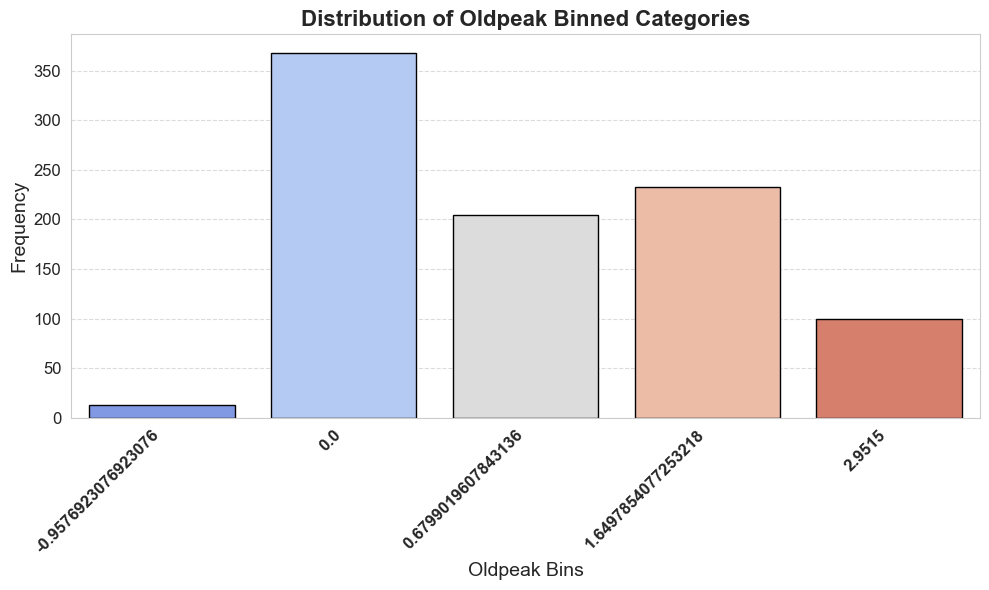

In [110]:
plot_binned_distribution(df=heart_failure_df_binning, column='Oldpeak_Binned_Numeric', title='Distribution of Oldpeak Binned Categories', 
                         xlabel='Oldpeak Bins', 
                         ylabel='Frequency')


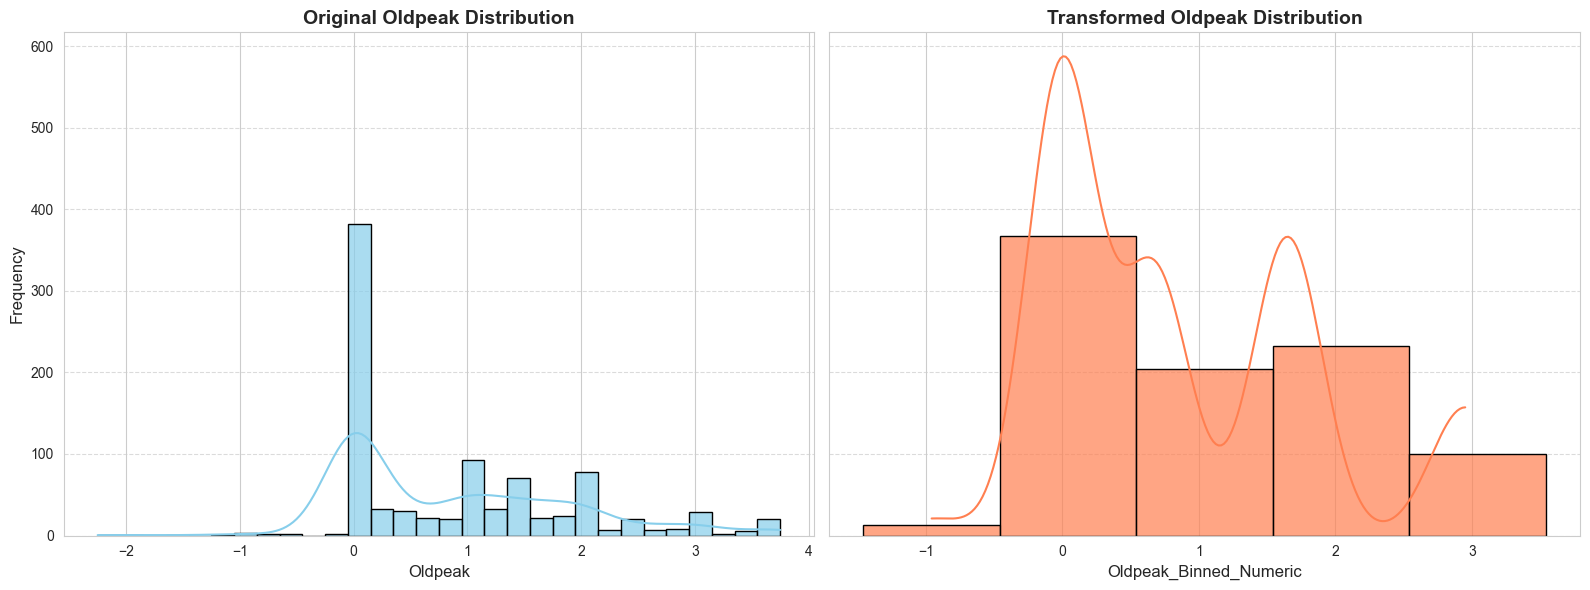

In [111]:
plot_original_vs_transformed_kde_hist(heart_failure_df_binning,'Oldpeak','Oldpeak_Binned_Numeric')

In [112]:
heart_failure_df_binning['Oldpeak'] = heart_failure_df_binning['Oldpeak_Binned_Numeric']


columns_to_drop = ['Oldpeak_Bin', 'Oldpeak_Binned_Numeric']

### 4.5.2 Apply Binning for `Cholesterol`

Binning Based on cholesterol levels and medical guidelines:

1. Normal: Cholesterol levels < 200 mg/dL.
2. Borderline : Cholesterol levels 200–239 mg/dL.
3. High: Cholesterol levels ≥ 240 mg/dL

In [113]:
print(heart_failure_df['Cholesterol'].describe())


count    918.000000
mean       5.475700
std        0.210961
min        4.454347
25%        5.370638
50%        5.472271
75%        5.590987
max        6.403574
Name: Cholesterol, dtype: float64


In [114]:
# heart_failure_df['Cholesterol'] = pd.cut(heart_failure_df['Cholesterol'], bins=[-np.inf, 200, 240, np.inf], labels=['Normal', 'Borderline', 'High']
# )


In [115]:
# print(heart_failure_df['Cholesterol'].value_counts())


In [116]:
# plot_binned_distribution(df=heart_failure_df, column='Cholesterol', title='Distribution of Cholesterol Binned Categories', xlabel='Cholesterol Bins', ylabel='Frequency')

### 4.6 ◆ Normalization and Standardization




#### 4.6.1 Plotting QQ plot for numeric features 

In [117]:
features_to_be_normalized = heart_failure_df.loc[:,['Age','RestingBP', 'MaxHR','Oldpeak']]


In [118]:
# Function to plot QQ plot to determine the distirbution of the data if it normally distirbuted or skewed 
def QQ_plotting(df, feature_names, figsize=(8, 6)):
    
    for col in feature_names:
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(111)
        sm.qqplot(df[col], line='s', ax=ax)
        ax.set_title(f'QQ Plot for {col}', fontsize=14, fontweight='bold')
        ax.set_xlabel('Theoretical Quantiles', fontsize=12)
        ax.set_ylabel('Sample Quantiles', fontsize=12)
        ax.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
        ax.tick_params(axis='both', which='major', labelsize=10)
        plt.tight_layout()
        plt.show()



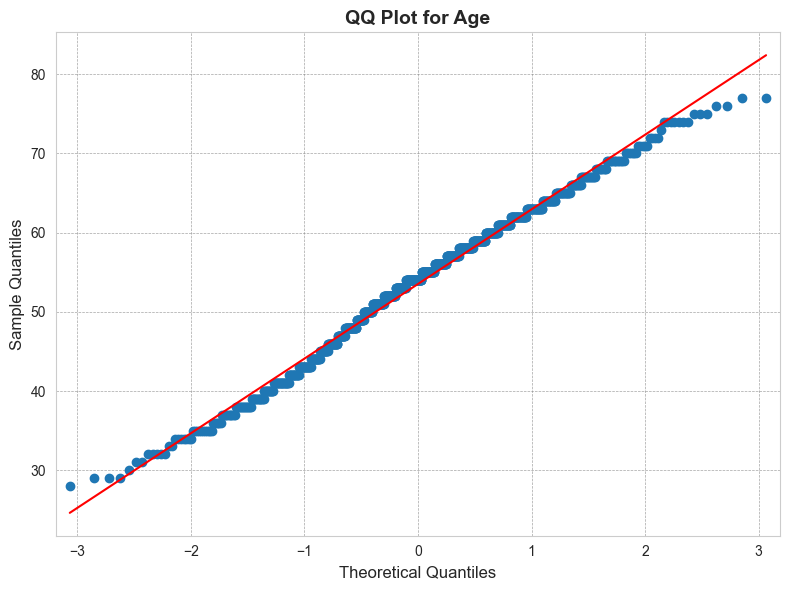

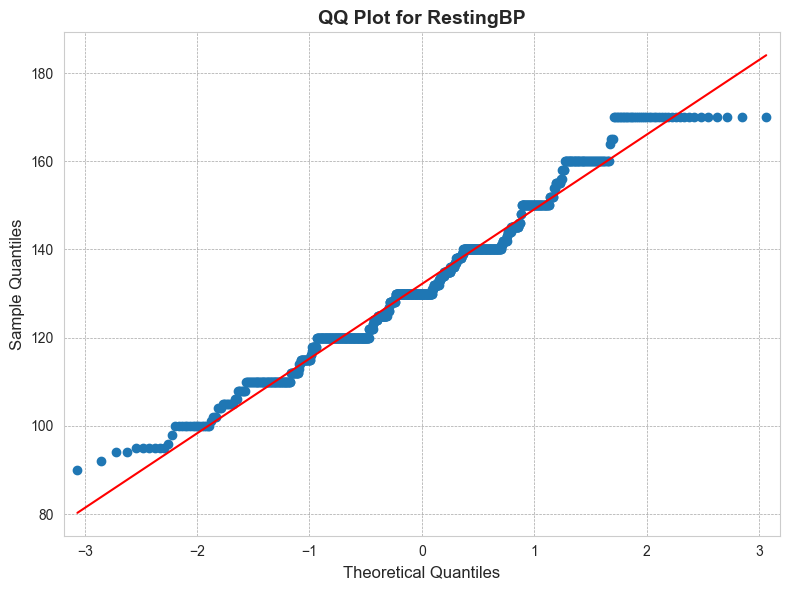

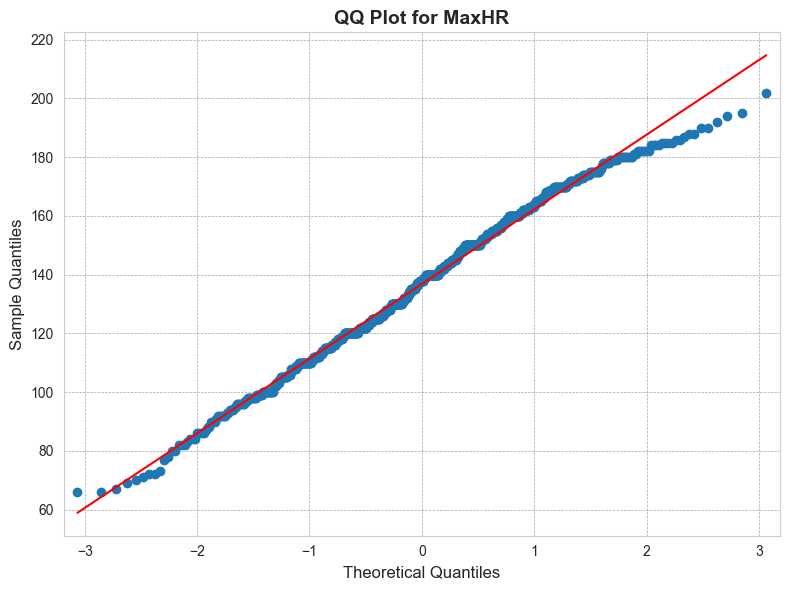

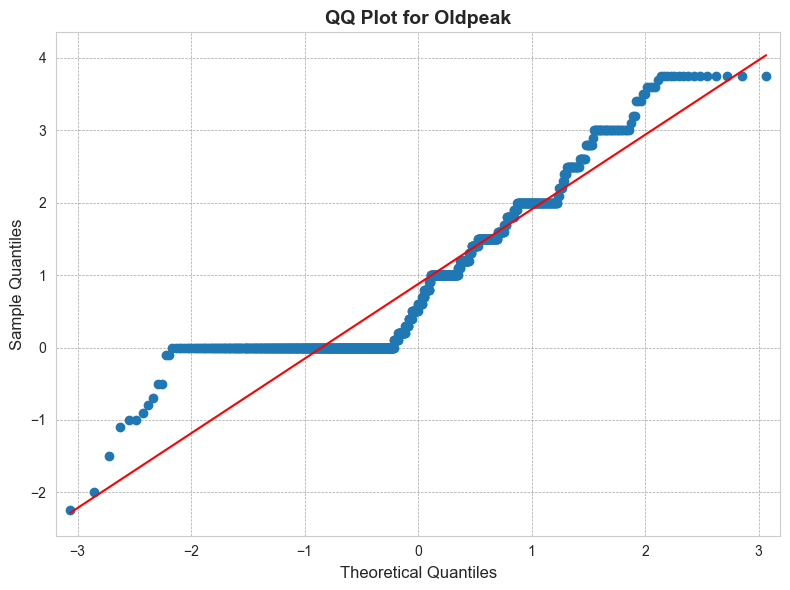

In [119]:
QQ_plotting(heart_failure_df,features_to_be_normalized)

### Choosing StandardScaler or MinMaxScaler for Each Feature

1. `Age` (QQ Plot 1):
   -  StandardScaler: Age is approximately normally distributed, as shown by the linear alignment with the QQ plot line. StandardScaler is ideal for features with normal or near-normal distributions.

2. `RestingBP` (QQ Plot 2):
   - StandardScaler: RestingBP shows a normal-like distribution with some deviations, making StandardScaler suitable to maintain its mean-centered properties.


3. `MaxHR` (QQ Plot 4):
   - StandardScaler: MaxHR has a nearly normal distribution. StandardScaler will effectively normalize it, centering it around zero with unit variance.


### Summary:
- StandardScaler: `Age`, `RestingBP`, `MaxHR` (approximately normal distributions).

#### 4.6.2 Using StandardScaler for `Age` , `RestingBP` and `MaxHR` 

In [120]:
# standard_scaler_features = ['Age','RestingBP','MaxHR']
standard_scaler_features = ['Age','RestingBP','MaxHR']

sc = StandardScaler()
heart_failure_df[standard_scaler_features] = sc.fit_transform(heart_failure_df[standard_scaler_features])

#### 4.6.3 Using MinMaxScaler for `Oldpeak` 

In [121]:
minmax_scaler_features = ['Oldpeak']

MinMaxSC = MinMaxScaler()
heart_failure_df[minmax_scaler_features] = MinMaxSC.fit_transform(heart_failure_df[minmax_scaler_features])

In [122]:
heart_failure_df.describe()

Age     RestingBP  Cholesterol   FastingBS         MaxHR  \
count  9.180000e+02  9.180000e+02   918.000000  918.000000  9.180000e+02   
mean  -1.083616e-16 -6.346896e-16     5.475700    0.233115 -2.322035e-16   
std    1.000545e+00  1.000545e+00     0.210961    0.423046  1.000545e+00   
min   -2.706015e+00 -2.491197e+00     4.454347    0.000000 -2.786160e+00   
25%   -6.906294e-01 -7.188954e-01     5.370638    0.000000 -6.616980e-01   
50%    5.188098e-02 -1.281283e-01     5.472271    0.000000  4.645600e-02   
75%    6.883185e-01  4.626389e-01     5.590987    0.000000  7.546100e-01   
max    2.491558e+00  2.234940e+00     6.403574    1.000000  2.564337e+00   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.521296      0.553377  
std      0.171949      0.497414  
min      0.000000      0.000000  
25%      0.375000      0.000000  
50%      0.475000      1.000000  
75%      0.625000      1.000000  
max      1.000000      1.000000

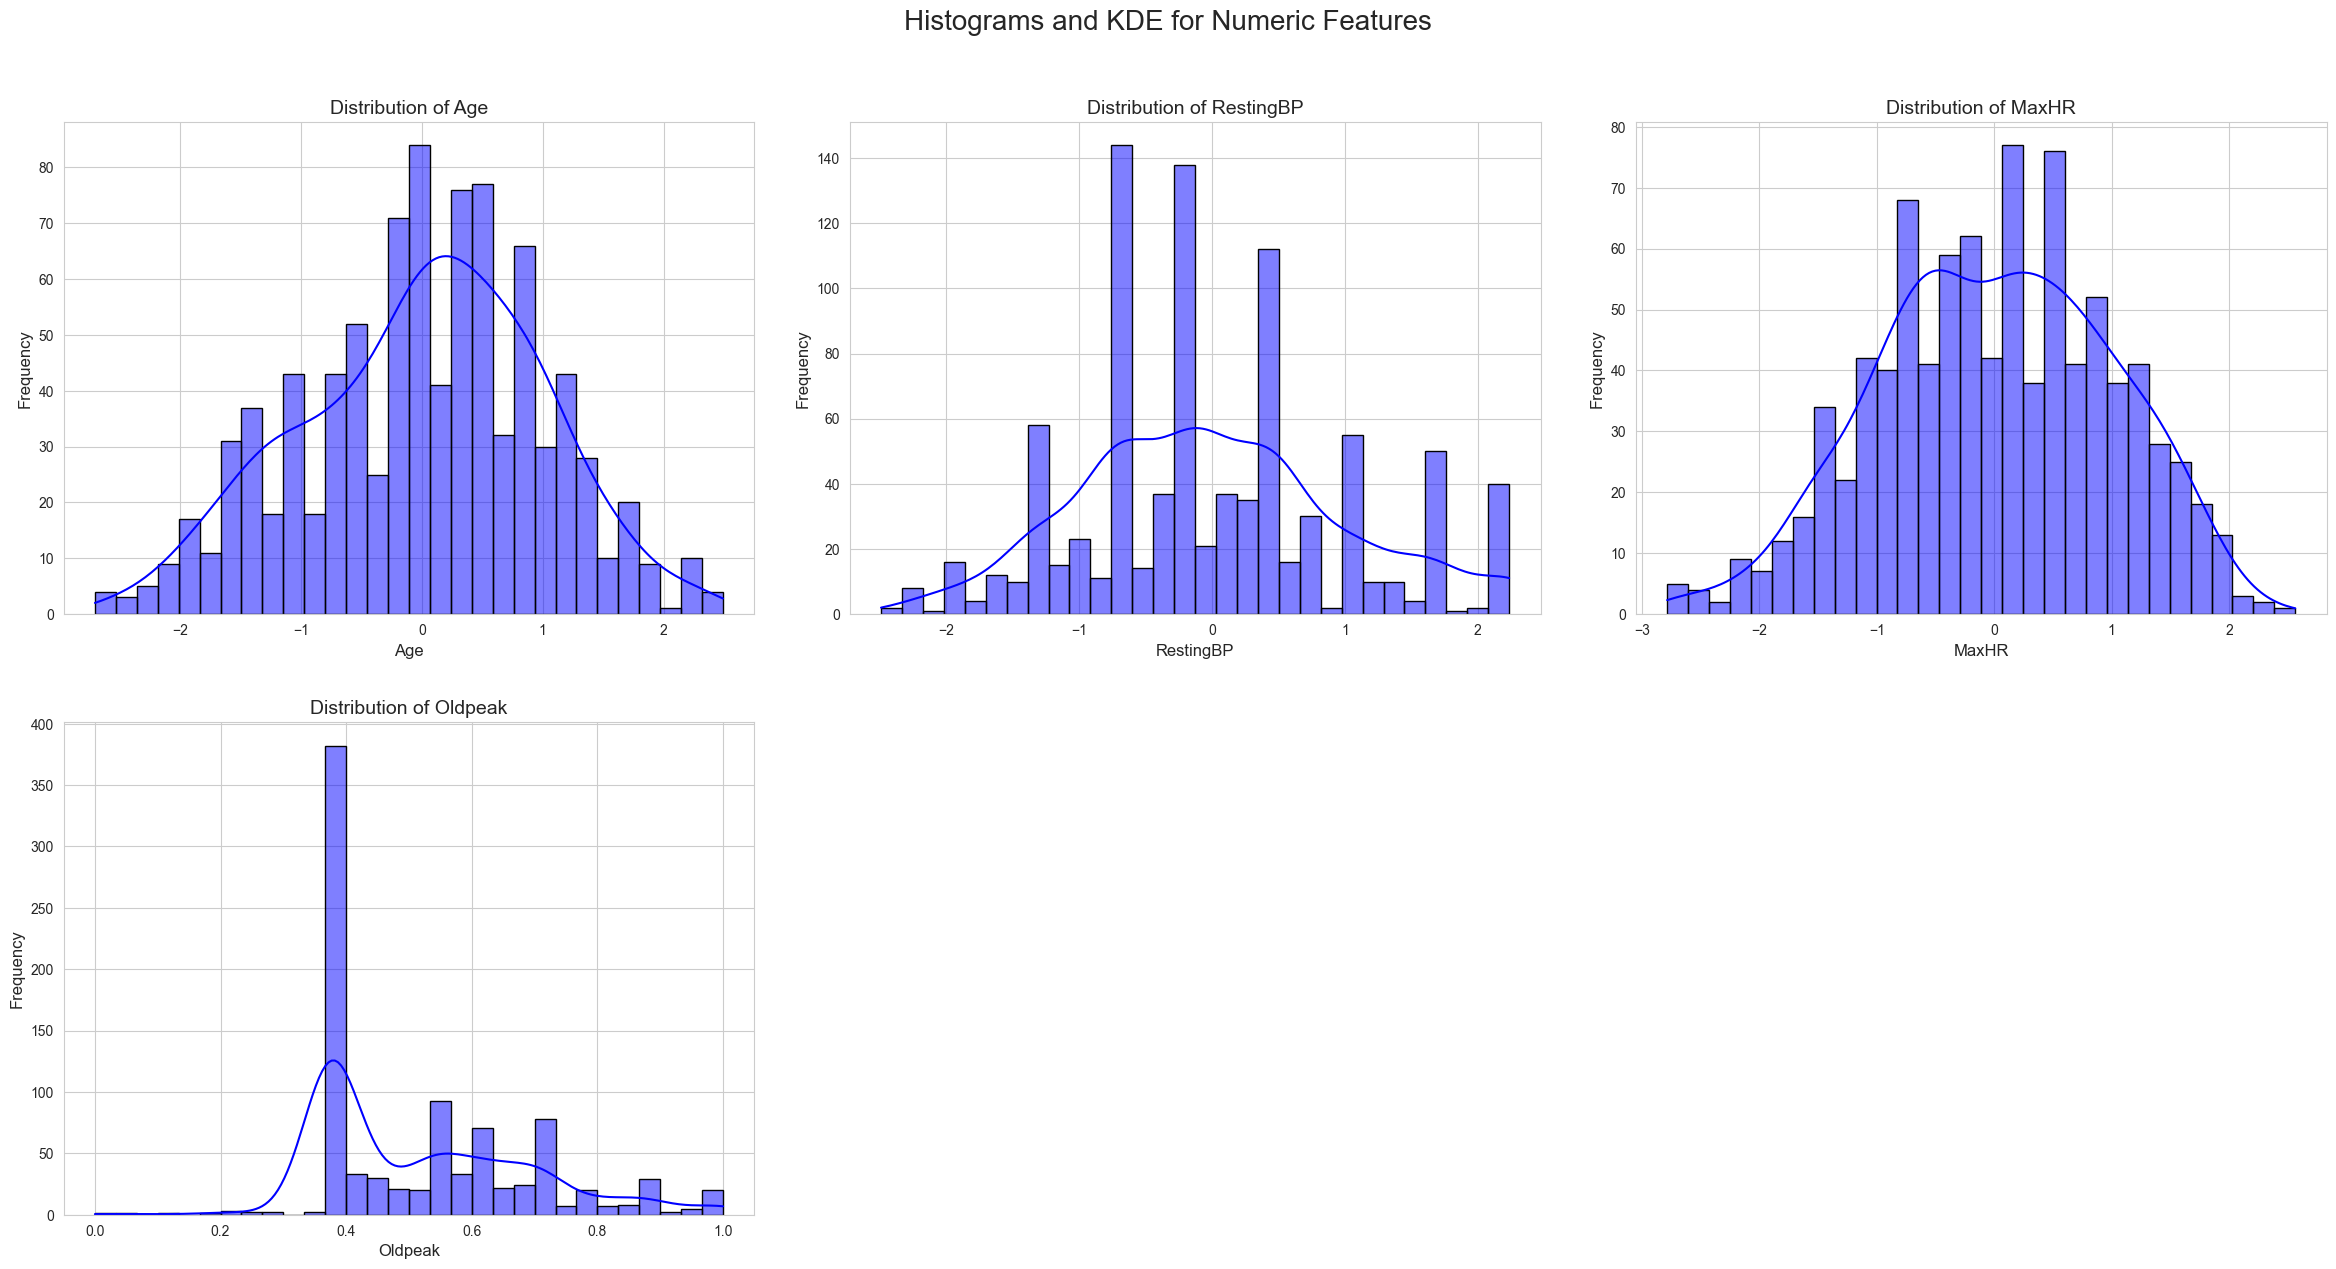

In [123]:
features_scaled = heart_failure_df.loc[:,['Age','RestingBP', 'MaxHR','Oldpeak']]

plot_histogram_kde_distirbution(heart_failure_df,features_scaled)

In [124]:
heart_failure_df

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0   -1.433140   M           ATA   0.462639     5.669881          0     Normal   
1   -0.478484   F           NAP   1.644173     5.198497          0     Normal   
2   -1.751359   M           ATA  -0.128128     5.648974          0         ST   
3   -0.584556   F           ASY   0.344485     5.370638          0     Normal   
4    0.051881   M           NAP   1.053406     5.278115          0     Normal   
..        ...  ..           ...        ...          ...        ...        ...   
913 -0.902775   M            TA  -1.309663     5.579730          0     Normal   
914  1.536902   M           ASY   0.698946     5.267858          1     Normal   
915  0.370100   M           ASY  -0.128128     4.882802          0     Normal   
916  0.370100   F           ATA  -0.128128     5.468060          0        LVH   
917 -1.645286   M           NAP   0.344485     5.170484          0     Normal   

        MaxHR ExerciseAngina   Oldpeak ST_Slope  HeartDisease  
0    1.384080              N  0.375000       Up             0  
1    0.754610              N  0.541667     Flat             1  
2   -1.527219              N  0.375000       Up             0  
3   -1.133801              Y  0.625000     Flat             1  
4   -0.583014              N  0.375000       Up             0  
..        ...            ...       ...      ...           ...  
913 -0.189595              N  0.575000     Flat             1  
914  0.164482              N  0.941667     Flat             1  
915 -0.858407              Y  0.575000     Flat             1  
916  1.462764              N  0.375000     Flat             1  
917  1.423422              N  0.375000       Up             0  

[918 rows x 12 columns]

### 4.7 ◆ Feature Encoding 


In [125]:
heart_failure_df.describe(include=['object'])

Sex ChestPainType RestingECG ExerciseAngina ST_Slope
count   918           918        918            918      918
unique    2             4          3              2        3
top       M           ASY     Normal              N     Flat
freq    725           496        552            547      460

#### 4.7.1 Apply One Hot Encoding for Categrical Features 

In [126]:
def apply_one_hot_encoding(df, feature_name):
    one_hot_encoded = pd.get_dummies(df[feature_name], prefix=feature_name, drop_first=False).astype(int)
    df = pd.concat([df, one_hot_encoded], axis=1)
    df = df.drop(columns=[feature_name])
    
    return df

In [127]:
heart_failure_df = apply_one_hot_encoding(heart_failure_df,'Sex')

In [128]:
heart_failure_df = apply_one_hot_encoding(heart_failure_df,'ChestPainType')

In [129]:
heart_failure_df = apply_one_hot_encoding(heart_failure_df,'ExerciseAngina')

In [130]:
heart_failure_df = apply_one_hot_encoding(heart_failure_df,'ST_Slope')

In [131]:
heart_failure_df = apply_one_hot_encoding(heart_failure_df,'RestingECG')

#### 4.7.2 Apply One Hot Encoding for Binned Categorical Features `Oldpeak` & `Cholesterol`

In [132]:
# heart_failure_df = apply_one_hot_encoding(heart_failure_df,'Oldpeak')

In [133]:
# heart_failure_df = apply_one_hot_encoding(heart_failure_df,'Cholesterol')

In [134]:
heart_failure_df

Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
0   -1.433140   0.462639     5.669881          0  1.384080  0.375000   
1   -0.478484   1.644173     5.198497          0  0.754610  0.541667   
2   -1.751359  -0.128128     5.648974          0 -1.527219  0.375000   
3   -0.584556   0.344485     5.370638          0 -1.133801  0.625000   
4    0.051881   1.053406     5.278115          0 -0.583014  0.375000   
..        ...        ...          ...        ...       ...       ...   
913 -0.902775  -1.309663     5.579730          0 -0.189595  0.575000   
914  1.536902   0.698946     5.267858          1  0.164482  0.941667   
915  0.370100  -0.128128     4.882802          0 -0.858407  0.575000   
916  0.370100  -0.128128     5.468060          0  1.462764  0.375000   
917 -1.645286   0.344485     5.170484          0  1.423422  0.375000   

     HeartDisease  Sex_F  Sex_M  ChestPainType_ASY  ...  ChestPainType_NAP  \
0               0      0      1                  0  ...                  0   
1               1      1      0                  0  ...                  1   
2               0      0      1                  0  ...                  0   
3               1      1      0                  1  ...                  0   
4               0      0      1                  0  ...                  1   
..            ...    ...    ...                ...  ...                ...   
913             1      0      1                  0  ...                  0   
914             1      0      1                  1  ...                  0   
915             1      0      1                  1  ...                  0   
916             1      1      0                  0  ...                  0   
917             0      0      1                  0  ...                  1   

     ChestPainType_TA  ExerciseAngina_N  ExerciseAngina_Y  ST_Slope_Down  \
0                   0                 1                 0              0   
1                   0                 1                 0              0   
2                   0                 1                 0              0   
3                   0                 0                 1              0   
4                   0                 1                 0              0   
..                ...               ...               ...            ...   
913                 1                 1                 0              0   
914                 0                 1                 0              0   
915                 0                 0                 1              0   
916                 0                 1                 0              0   
917                 0                 1                 0              0   

     ST_Slope_Flat  ST_Slope_Up  RestingECG_LVH  RestingECG_Normal  \
0                0            1               0                  1   
1                1            0               0                  1   
2                0            1               0                  0   
3                1            0               0                  1   
4                0            1               0                  1   
..             ...          ...             ...                ...   
913              1            0               0                  1   
914              1            0               0                  1   
915              1            0               0                  1   
916              1            0               1                  0   
917              0            1               0                  1   

     RestingECG_ST  
0                0  
1                0  
2                1  
3                0  
4                0  
..             ...  
913              0  
914              0  
915              0  
916              0  
917              0  

[918 rows x 21 columns]

## 5. ◆Feature extraction and selection after cleaning 

#### 5.1 Identifying and selecting significant variables for the model 

In [135]:
correlation_cleaned_matrix = heart_failure_df.corr()


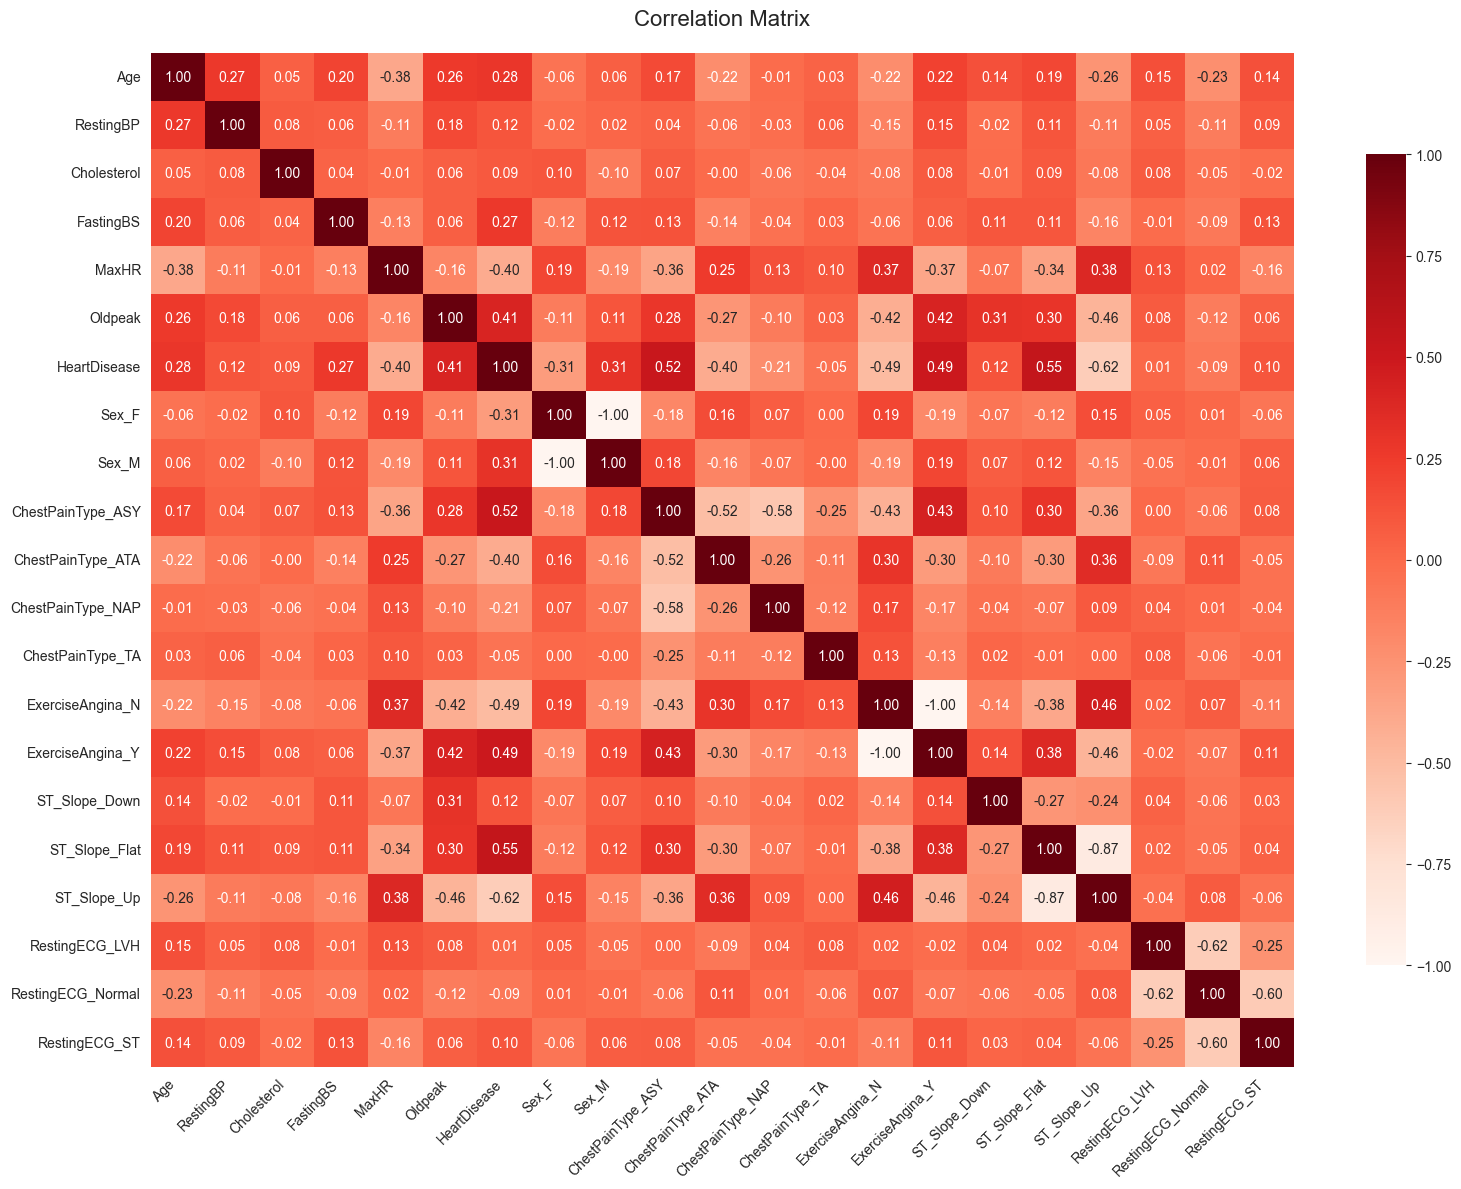

In [136]:
plot_correlation_heatmap(correlation_cleaned_matrix)

##### 5.1.1 Create a mask for strong positive correlations

In [137]:
# Create a mask for strong positive correlations
positive_threshold = 0.8
positive_mask = correlation_cleaned_matrix.where((correlation_cleaned_matrix >= positive_threshold) & (correlation_cleaned_matrix < 1))

# Visualize the heatmap for strongly positive correlations
if positive_mask.isnull().all().all():
    print("No Strong positive correlations above the threshold (>= 0.8).")
else:
    visualize_mask_correlation_heatmap(correlation_cleaned_matrix, positive_mask)

No Strong positive correlations above the threshold (>= 0.8).


##### 5.1.2 Create a mask for strong negative correlations

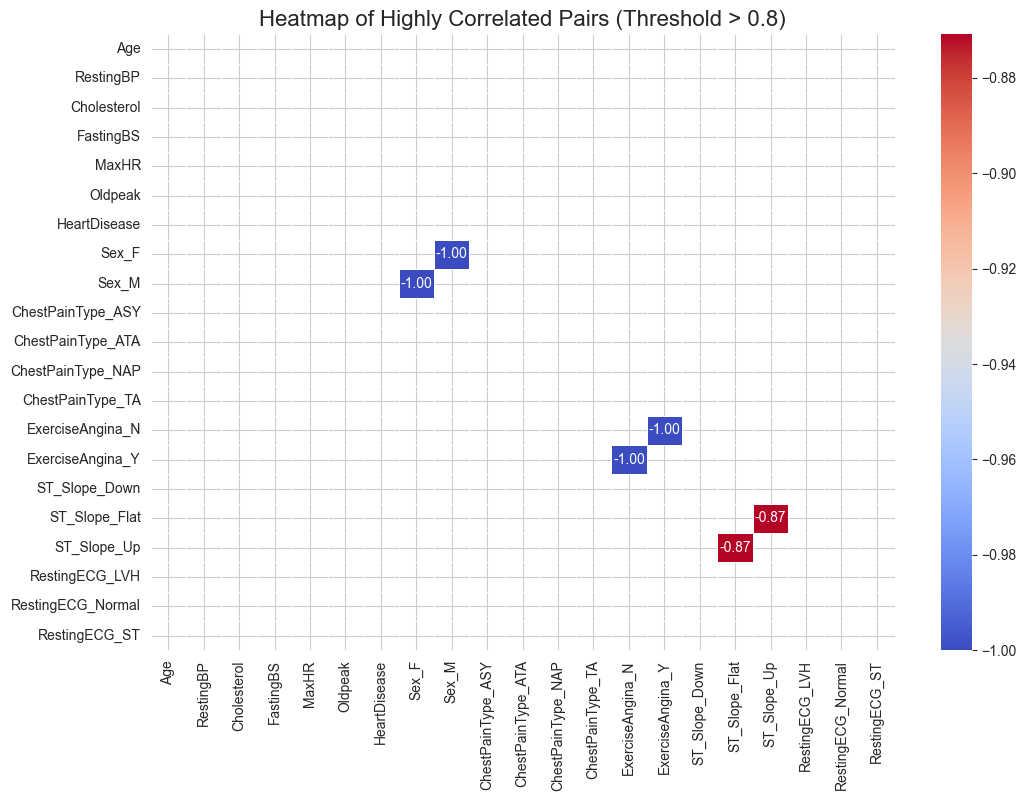

In [138]:
# Create a mask for strong positive correlations
negative_threshold = -0.8
negative_mask = correlation_cleaned_matrix.where((correlation_cleaned_matrix <= negative_threshold) )

# Visualize the heatmap for strongly positive correlations
if negative_mask.isnull().all().all():
    print("No correlations meet the specified threshold.")
else:
    visualize_mask_correlation_heatmap(correlation_cleaned_matrix, negative_mask)

- Features like `ST_Slope_Up` and `ST_Slope_Flat` appear inversely correlated. These are one-hot encoded categories, this behavior is expected.
- For binary features with perfect negative correlation (`Sex_F` and `Sex_M`) and (`ExerciseAngina_Y` and `ExerciseAngina_F`), this behavior is expected.

<!-- ### Moderate Positive Correlation with  HeartDisease :
1. `ST_Slope_Flat` (0.554): A flat slope is strongly associated with heart disease,Indicates that ST_Slope is a key predictor.
2. `ChestPainType_ASY` (0.517):Asymptomatic chest pain is Moderately linked to heart disease.
3. `ExerciseAngina_Y` (0.494):Experiencing angina during exercise is a Moderate indicator of heart disease.
4. `Sex_M`(0.305): Male patients are more likely to have heart disease.
5. `Age`(0.282):Older age is moderately correlated with heart disease.
6. `FastingBS` (0.267): High fasting blood sugar is moderately correlated with heart disease.
7. `Oldpeak_Severe` (0.251) and `Oldpeak_Moderate` (0.247): Severe and moderate ST depression after exercise are linked to heart disease.

### Low Positive Correlation :
1. `Cholesterol_Normal` (0.151): Normal cholesterol levels have a weak positive correlation, possibly due to other confounding factors.
2. `RestingBP` (0.113): Resting blood pressure has a weak correlation with heart disease.
3. `RestingECG_ST` (0.103): ST elevation in ECG is weakly correlated.

### Negative Correlation with `HeartDisease` :  
1. `ST_Slope_Up` (-0.622):An upward ST slop`e is Moderately negatively correlated, indicating it's a strong indicator of no heart disease.
2. `ChestPainType_ATA`(-0.402): Typical angina (ATA) is Moderately negatively correlated, meaning it is less common in heart disease patients.
3. `MaxHR`(-0.401): Higher maximum heart rate achieved is negatively correlated, indicating that healthier individuals tend to reach higher heart rates.
4. `Oldpeak_Normal` (-0.346): Normal ST depression is Moderately negatively correlated, indicating no heart disease.
5. `ChestPainType_NAP` (-0.213): Non-anginal chest pain is weakly negatively correlated with heart disease.
6. `Cholesterol_Borderline` (-0.136): Borderline cholesterol levels are weakly negatively correlated.
7. `ExerciseAngina_N` (-0.494): Not experiencing angina during exercise is a Moderate indicator of no heart disease.
8. `Sex_F` (-0.305): Female patients are less likely to have heart disease.

### Key Deductions

- Moderate Predictors :
1. `ST_Slope_Flat`, `ChestPainType_ASY`, `ExerciseAngina_Y`, `Sex_M`, `Age`, and `FastingBS` are Moderate positive indicators of heart disease.
2. `ST_Slope_Up`, `ChestPainType_ATA`, `MaxHR`, and `ExerciseAngina_N` are Moderate negative indicators.

- Weak Predictors:

1. Features like `RestingBP`, `Cholesterol_Normal`, `RestingECG_ST`, and `Cholesterol_Borderline` have weak correlations .

- Redundant or Less Relevant Features:

1. Features with very low correlations (`RestingECG_LVH`, `Cholesterol_High`, `Oldpeak_Mild`) might not add much predictive power.
2. For binary features with perfect negative correlation (`Sex_F` and `Sex_M`) and (`ExerciseAngina_Y` and `ExerciseAngina_F`). -->


#### From the correlation matrix:

Strongly Positively Correlated Features with HeartDisease:

Oldpeak (r = 0.42): Represents ST depression induced by exercise relative to rest. Highly relevant for cardiac evaluations.
ExerciseAngina_Y (r = 0.49): Presence of exercise-induced angina is a critical indicator of heart disease.
ST_Slope_Down (r = 0.55): Downsloping ST segment is strongly associated with ischemia and heart disease.
ChestPainType_ASY (r = 0.52): Asymptomatic chest pain is a significant predictor of heart disease.
Strongly Negatively Correlated Features with HeartDisease:

MaxHR (r = -0.40): A lower maximum heart rate achieved during exercise is a potential indicator of poor heart health.
ST_Slope_Up (r = -0.36): Upsloping ST segment is typically associated with normal or less severe conditions.
Moderately Correlated Features:

Age (r = 0.28): Older age is a known risk factor for heart disease.
RestingBP (r = 0.18): Elevated resting blood pressure is a common cardiovascular risk factor.
Cholesterol (r = 0.27): Elevated cholesterol levels contribute to atherosclerosis and heart disease.
Less Relevant Features (Low Correlation with HeartDisease):

Sex (F/M): Low correlation (r = ~0.10). While male sex is a risk factor, its direct correlation here is minimal.
RestingECG_Normal/ST/LVH: Low correlation (~0.10 to -0.06).
ChestPainType_ATA/NAP/TA: Lower correlations compared to ASY.
FastingBS (r = 0.13): While elevated fasting blood sugar is relevant to diabetes, its direct correlation here is weaker.

In [139]:

# # Separate features and target variable
# X = heart_failure_df.drop(columns=['HeartDisease'])  # Features
# y = heart_failure_df['HeartDisease']  # Target

# # # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# # Initialize and train the Random Forest Classifier
# rf_model = RandomForestClassifier(random_state=42)
# rf_model.fit(X_train, y_train)

# # Evaluate the model
# y_pred = rf_model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)

# # Feature importance analysis
# feature_importances = pd.DataFrame({'Feature': X.columns,'Importance': rf_model.feature_importances_}).sort_values(by='Importance', ascending=False)

# # Display feature importance
# plt.figure(figsize=(10, 8))
# plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
# plt.xlabel('Importance', fontsize=12)
# plt.ylabel('Features', fontsize=12)
# plt.title('Feature Importance Analysis', fontsize=14)
# plt.gca().invert_yaxis()  # Invert y-axis for better readability
# plt.show()
# # Display model accuracy
# print(f"Model Accuracy: {accuracy:.2f}")

# # Suggest features to drop based on negligible importance (e.g., Importance < 0.01)
# features_to_drop = feature_importances[feature_importances['Importance'] < 0.01]['Feature'].tolist()
# print(f"Features to drop due to negligible importance: {features_to_drop}")

#### 5.3 Feature Selection based on Medical Context :

- Selected Features:

1. Oldpeak (ST depression): Highly indicative of ischemia.
2. ExerciseAngina_Y: A strong symptom of coronary artery disease.
3. ST_Slope_Down: Strongly linked to ischemic heart conditions.
ChestPainType_ASY: Asymptomatic presentations are critical in heart disease.
MaxHR: Inverse correlation highlights reduced exercise capacity in heart patients.
Age: A standard risk factor for heart disease.
Cholesterol: A critical risk factor for atherosclerosis.
RestingBP: Elevated resting BP is a well-established cardiovascular risk.
Excluded Features:

Low correlation or redundancy:
Sex (F/M): Low direct relevance; male sex can be a secondary demographic factor.
RestingECG_Normal/LVH/ST: Minimal correlation.
FastingBS: More related to diabetes than direct heart disease prediction.
ChestPainType_ATA/NAP/TA: Lower relevance compared to ASY.

In [140]:
selected_features= [
    "Oldpeak",            # ST depression
    "ExerciseAngina_Y",   # Presence of exercise-induced angina
    "ST_Slope_Up",      # Downsloping ST segment
    "ChestPainType_ASY",  # Asymptomatic chest pain
    "MaxHR",              # Maximum heart rate
    "Age",                # Age
    "Cholesterol",        # Cholesterol level
    "RestingBP" ,          # Resting blood pressure
    "ChestPainType_ATA",
    "ExerciseAngina_N",
    "ST_Slope_Flat",
    "Sex_M",
    "Sex_F"
]


In [141]:
heart_failure_df_all = heart_failure_df.copy()

feature_selected_df = heart_failure_df[selected_features + ["HeartDisease"]] 

feature_selected_df



Oldpeak  ExerciseAngina_Y  ST_Slope_Up  ChestPainType_ASY     MaxHR  \
0    0.375000                 0            1                  0  1.384080   
1    0.541667                 0            0                  0  0.754610   
2    0.375000                 0            1                  0 -1.527219   
3    0.625000                 1            0                  1 -1.133801   
4    0.375000                 0            1                  0 -0.583014   
..        ...               ...          ...                ...       ...   
913  0.575000                 0            0                  0 -0.189595   
914  0.941667                 0            0                  1  0.164482   
915  0.575000                 1            0                  1 -0.858407   
916  0.375000                 0            0                  0  1.462764   
917  0.375000                 0            1                  0  1.423422   

          Age  Cholesterol  RestingBP  ChestPainType_ATA  ExerciseAngina_N  \
0   -1.433140     5.669881   0.462639                  1                 1   
1   -0.478484     5.198497   1.644173                  0                 1   
2   -1.751359     5.648974  -0.128128                  1                 1   
3   -0.584556     5.370638   0.344485                  0                 0   
4    0.051881     5.278115   1.053406                  0                 1   
..        ...          ...        ...                ...               ...   
913 -0.902775     5.579730  -1.309663                  0                 1   
914  1.536902     5.267858   0.698946                  0                 1   
915  0.370100     4.882802  -0.128128                  0                 0   
916  0.370100     5.468060  -0.128128                  1                 1   
917 -1.645286     5.170484   0.344485                  0                 1   

     ST_Slope_Flat  Sex_M  Sex_F  HeartDisease  
0                0      1      0             0  
1                1      0      1             1  
2                0      1      0             0  
3                1      0      1             1  
4                0      1      0             0  
..             ...    ...    ...           ...  
913              1      1      0             1  
914              1      1      0             1  
915              1      1      0             1  
916              1      0      1             1  
917              0      1      0             0  

[918 rows x 14 columns]

In [142]:
# Check the distribution of the target variable
target_distribution = heart_failure_df['HeartDisease'].value_counts(normalize=True) * 100
print(target_distribution)


HeartDisease
1    55.337691
0    44.662309
Name: proportion, dtype: float64


### 5.2 Applying Dimensionality Reduction (PCA for Classification)

#### 5.2.1 Justification for using PCA in Dimensionality Reduction :
PCA is a dimensionality reduction technique that transforms high-dimensional data into a lower-dimensional space while retaining as much variance as possible. For classification tasks, PCA can:

1. Reduce Overfitting: By removing noise and redundant features.
2. Improve Model Performance: By focusing on the most informative components.
3. Enhance Computational Efficiency: By reducing the number of features for faster training.

#### 5.2.2 Steps for PCA Analysis:


##### We will have two Dataframes , one will apply the PCA on it before clustering and the other one without applying PCA to see the difference 

In [143]:
feature_selected_df_pca = feature_selected_df.copy() 

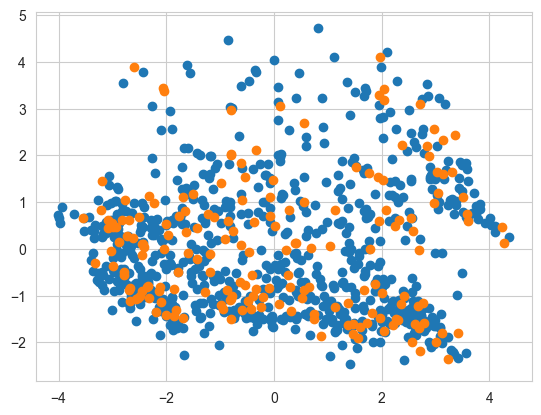

In [ ]:
X = feature_selected_df_pca.drop(columns=['HeartDisease'])  
y = feature_selected_df_pca['HeartDisease']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

pca_2 = PCA(n_components=2)

X_trainPCA = pca_2.fit_transform(X_train)
X_testPCA = pca_2.transform(X_test)

# # Visualize the 2-component PCA
# plt.figure(figsize=(10, 6))
# plt.scatter(X_pca_2[:, 0], X_pca_2[:, 1], c=y, cmap='viridis', s=50, alpha=0.7)
# plt.title('2-Component PCA Visualization', fontsize=14)
# plt.xlabel('Principal Component 1', fontsize=12)
# plt.ylabel('Principal Component 2', fontsize=12)
# plt.colorbar(label='HeartDisease')
# plt.grid()
# plt.show()

plt.scatter(x=X_trainPCA[:,0],y=X_trainPCA[:,1])
plt.scatter(x=X_testPCA[:,0],y=X_testPCA[:,1])

#### 5.2.3 Plot pairplot for all PCA components :

In [145]:
# # Create a DataFrame with the 17 PCA components and the target variable
# pca_all_components = pd.DataFrame(data=X_pca_reduced, columns=[f'PC{i+1}' for i in range(n_components)])
# pca_all_components['HeartDisease'] = y  # Add the target variable

# # Plot pairplot for all PCA components
# pairplot_data = pca_all_components.sample(500, random_state=42)  # Sample for better visualization
# pair_plot = sns.pairplot(pairplot_data, hue='HeartDisease', 
#                          diag_kind='kde', markers=["o", "s"], corner=True)

# # Add title
# pair_plot.fig.suptitle('PCA Components Pairplot', y=1.02, fontsize=16)
# plt.show()

## 6. ◆ Applying unsupervised learning (Clustering) .

### 6.1 Kmeans Clustering :

#### 6.1.1 Using the elbow method to find the optimal number of clusters

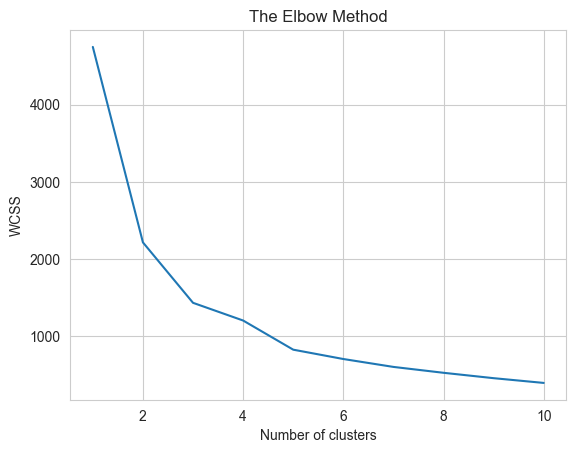

In [162]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_trainPCA)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### Looking for the "elbow" point on the graph where the line bends noticeably.
In this case, the elbow appears to be around k = 5, suggesting these are likely the optimal numbers of clusters.

#### 6.1.2 Another commonly used method to determine the optimal number of clusters is the Silhouette Score Analysis.
By selecting the number of clusters that give us the highest Silhouette score

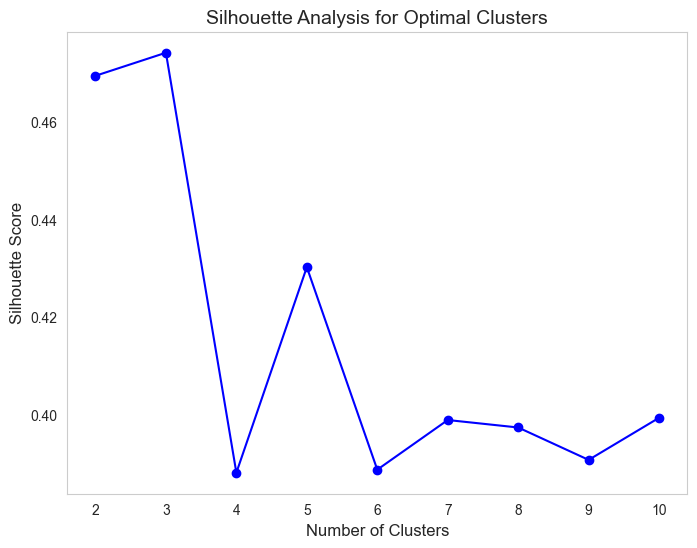

In [163]:
# Initialize range for the number of clusters to test
cluster_range = range(2, 11)  # Test from 2 to 10 clusters
silhouette_scores = []

# Compute silhouette scores for each k
for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_trainPCA)  
    labels = kmeans.labels_
    score = silhouette_score(X_trainPCA, labels)
    silhouette_scores.append(score)

# Plot the Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.xlabel('Number of Clusters', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Analysis for Optimal Clusters', fontsize=14)
plt.grid()
plt.show()

##### Key Observations for Silhouette Score:
The highest Silhouette Score is at 2 clusters, suggesting that the dataset may naturally group into two clusters.
But also at clusters equal to 8 has second highest score as the same score using the elbow method

#### 6.1.3 Using Davies-Bouldin Index or Calinski-Harabasz Scores methods  to determine the optimal number of clusters.
1. The Davies-Bouldin Index (DBI) measures the average similarity ratio of each cluster with respect to others. The lower the score, the better the separation between clusters.
2. The Calinski-Harabasz Score (also known as the Variance Ratio Criterion) measures the ratio of the sum of between-cluster dispersion to within-cluster dispersion. A higher score indicates better-defined clusters.

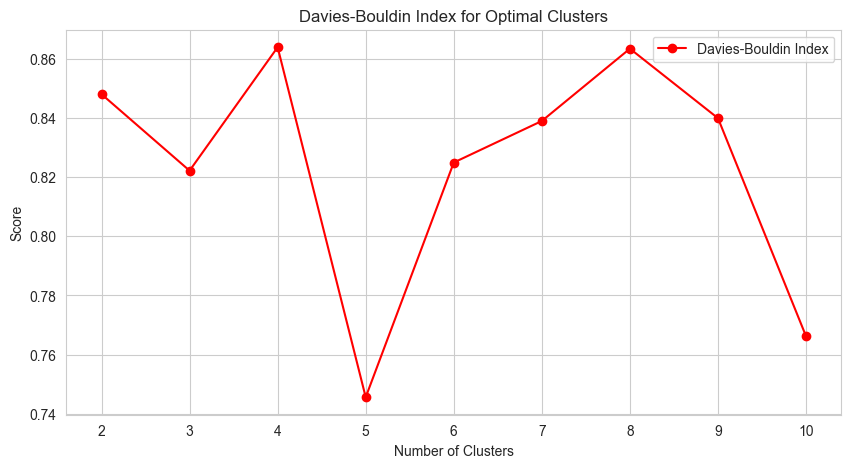

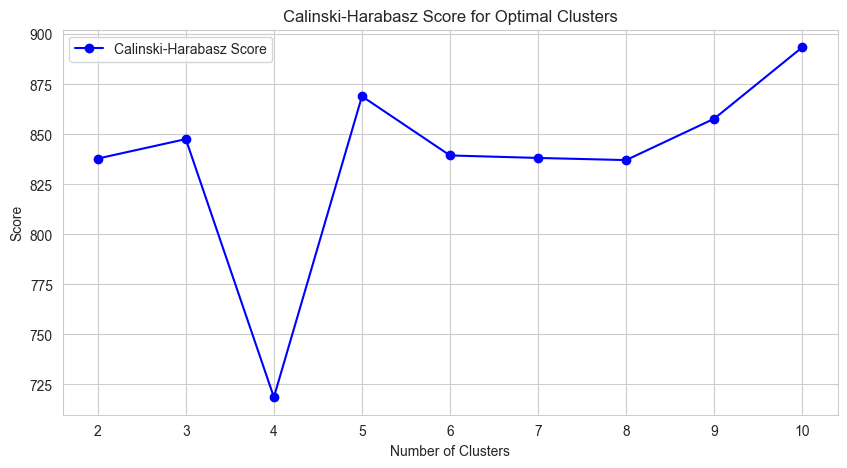

In [164]:
def evaluate_clustering(X, max_clusters=10):
    db_scores = []
    ch_scores = []
    cluster_range = range(2, max_clusters + 1)
    
    for k in cluster_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(X)
        
        # Calculate scores
        db_scores.append(davies_bouldin_score(X, labels))
        ch_scores.append(calinski_harabasz_score(X, labels))
    
    return cluster_range, db_scores, ch_scores

# Evaluate clustering with Davies-Bouldin Index and Calinski-Harabasz Score
cluster_range, db_scores, ch_scores = evaluate_clustering(X_trainPCA)

# Plot Davies-Bouldin Index
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, db_scores, marker='o', label='Davies-Bouldin Index', color='red')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Davies-Bouldin Index for Optimal Clusters')
plt.grid(True)
plt.legend()
plt.show()

# Plot Calinski-Harabasz Score
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, ch_scores, marker='o', label='Calinski-Harabasz Score', color='blue')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Calinski-Harabasz Score for Optimal Clusters')
plt.grid(True)
plt.legend()
plt.show()

### 6.2 Visualizing Clusters

In [165]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

InvalidIndexError: (array([False, False, False,  True, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False,  True, False, False,  True,
        True, False, False, False, False,  True,  True, False, False,
        True, False, False, False, False,  True, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False,  True, False, False,  True,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False,  True,  True, False, False,  True,
        True, False, False,  True, False, False, False,  True,  True,
       False, False, False, False, False, False, False,  True, False,
        True,  True, False, False, False, False,  True, False, False,
       False, False,  True,  True, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True, False,  True,
        True, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
        True,  True, False, False, False,  True,  True,  True,  True,
        True,  True,  True, False, False,  True, False, False,  True,
       False,  True, False,  True, False, False,  True, False,  True,
        True,  True, False,  True,  True,  True, False,  True, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
       False,  True,  True,  True, False,  True,  True,  True,  True,
       False, False, False,  True,  True, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
        True,  True, False,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False,  True,  True, False, False, False,  True,  True,
        True, False, False, False,  True, False,  True, False, False,
       False,  True, False, False, False,  True, False,  True,  True,
       False,  True,  True, False,  True,  True, False, False, False,
       False,  True,  True,  True, False,  True,  True, False, False,
        True, False, False,  True, False, False,  True, False, False,
        True, False, False,  True,  True,  True, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
        True,  True, False,  True, False, False,  True, False, False,
       False, False, False,  True,  True, False, False,  True, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False, False,  True, False,  True, False, False, False,
        True, False, False, False, False,  True,  True,  True,  True,
       False,  True, False, False, False, False,  True, False,  True,
       False,  True,  True,  True,  True, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False,  True,  True, False,  True,  True,  True, False,  True,
       False, False,  True, False, False, False,  True, False, False,
        True, False,  True,  True, False, False,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
        True,  True, False,  True, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False,  True, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False,  True, False, False,  True, False, False,
       False, False, False, False, False,  True,  True, False,  True,
       False, False, False, False, False,  True, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False,  True, False, False,  True,  True,  True,
       False,  True, False, False, False,  True, False, False, False,
       False, False,  True, False,  True, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
        True, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False,  True,  True, False, False, False, False,
        True, False, False, False, False, False, False,  True, False,
       False,  True, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False,  True,  True, False,  True, False, False,
        True, False, False, False, False, False, False,  True, False,
        True, False, False, False, False, False,  True, False, False]), 0)

### 6.3 Hierarchical Clustering

#### 6.3.1 Using the dendrogram to find the optimal number of clusters

In [ ]:
# plt.figure(figsize=(12, 6))  # Increase figure size
# dendrogram = sch.dendrogram(sch.linkage(X_pca_reduced, method='ward'))
# plt.title('Dendrogram', fontsize=14)
# plt.xlabel('Data Points (Cluster Indices)', fontsize=12)
# plt.ylabel('Euclidean Distance', fontsize=12)
# plt.xticks([])  # Suppress individual x-axis labels for clarity
# plt.grid(False)  # Optional: Disable grid for cleaner view
# plt.show()


NameError: name 'X_pca_reduced' is not defined

<Figure size 1200x600 with 0 Axes>

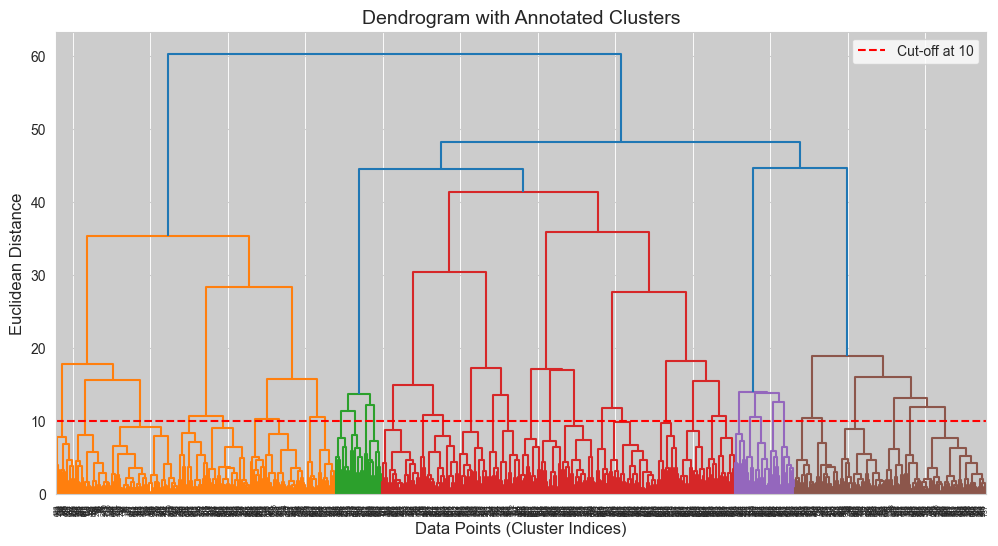

Number of clusters formed at cut-off height 10: 39


In [ ]:
# import scipy.cluster.hierarchy as sch
# from scipy.cluster.hierarchy import fcluster

# # Define the linkage matrix
# linkage_matrix = sch.linkage(X_pca_reduced, method='ward')

# # Plot the dendrogram with the cut-off line
# plt.figure(figsize=(12, 6))
# dendrogram = sch.dendrogram(linkage_matrix, truncate_mode=None)
# plt.title('Dendrogram with Annotated Clusters', fontsize=14)
# plt.xlabel('Data Points (Cluster Indices)', fontsize=12)
# plt.ylabel('Euclidean Distance', fontsize=12)

# # Define the height for the cut-off
# cutoff_height = 10  # Adjust this as needed for your specific dataset
# plt.axhline(y=cutoff_height, color='r', linestyle='--', label=f'Cut-off at {cutoff_height}')
# plt.legend()

# # Show the dendrogram
# plt.show()

# # Form clusters by cutting at the specified height
# num_clusters = len(set(fcluster(linkage_matrix, cutoff_height, criterion='distance')))
# print(f"Number of clusters formed at cut-off height {cutoff_height}: {num_clusters}")


# 7. Applying Classification:


## 7.1.Logistic Regression


### 7.1.1. Without PCA


In [154]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[58 19]
 [14 93]]


0.8206521739130435

### 7.1.2. With PCA


In [155]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_trainPCA, y_train)

y_pred = classifier.predict(X_testPCA)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[61 16]
 [16 91]]


0.8260869565217391

## 7.2. Random Forest Classifier


### 7.2.1 Without PCA


In [156]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[62 15]
 [17 90]]


0.8260869565217391

### 7.2.2 With PCA


In [157]:
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_trainPCA, y_train)

y_pred = classifier.predict(X_testPCA)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[61 16]
 [18 89]]


0.8152173913043478

## 7.3 Support Vector Machine


### 7.3.1 Without PCA


In [158]:

svc_model = SVC(kernel='linear', probability=True)
svc_model.fit(X_train, y_train)

y_pred = svc_model.predict(X_test)
svm_report = classification_report(y_test, y_pred)
print(svm_report)

              precision    recall  f1-score   support

           0       0.77      0.75      0.76        77
           1       0.83      0.84      0.83       107

    accuracy                           0.80       184
   macro avg       0.80      0.80      0.80       184
weighted avg       0.80      0.80      0.80       184



### 7.3.2 With PCA


In [159]:
svc_model = SVC(kernel='linear', probability=True)
svc_model.fit(X_trainPCA, y_train)

y_pred = svc_model.predict(X_testPCA)
svm_report = classification_report(y_test, y_pred)
print(svm_report)

              precision    recall  f1-score   support

           0       0.80      0.79      0.80        77
           1       0.85      0.86      0.86       107

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.83      0.83      0.83       184

